In [387]:
import pandas as pd
import seaborn as sns
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from bokeh.io import output_notebook, show
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv("/kaggle/input/crop-production/State_wise_rice_production_in_India.csv")

# **Data Preprocessing**

In [388]:
df.head()

State/Union Territory 2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  \
0        Andhra Pradesh  9601.0  11704.0  11872.0  13324.0  14241.0  10538.0   
1     Arunachal Pradesh   135.0    146.2    146.2    158.1    163.9    215.8   
2                 Assam  3470.7   3552.5   2916.0   3319.0   4008.5   4335.9   
3                 Bihar  2472.2   3495.5   4989.3   4418.1   5590.3   3599.3   
4          Chhattisgarh  4383.3   5011.6   5041.4   5426.6   4391.8   4110.4   

   2010-11  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  2017-18  \
0  7882.40  7746.20  6862.40  6969.70  7233.90  7488.70  7452.40  8166.20   
1   234.00   255.00   263.00   276.20   285.00   204.00   220.00   233.30   
2  4736.60  4516.30  5128.50  4927.10  5222.70  5125.10  4727.40  5283.70   
3  3102.10  7162.60  7529.30  5505.80  6356.70  6802.20  8239.30  8093.10   
4  6159.00  6028.40  6608.80  6716.40  6322.10  5789.40  8048.40  4930.80   

   2018-19  2019-20  2020-21  2021-22 2022-23*  
0  8234.70  8658.90  7882.90  7763.60   8542.3  
1   240.00   244.70   247.10   252.40        -  
2  5220.60  4984.60  5214.80  4382.10   4979.8  
3  6155.50  6298.00  6747.00  7717.00   6725.2  
4  6526.90  6774.80  7161.20  8021.70   8238.3

In [389]:
df.shape

(999, 20)

In [390]:
df.columns

Index(['State/Union Territory', '2004-05', '2005-06', '2006-07', '2007-08',
       '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14',
       '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20',
       '2020-21', '2021-22', '2022-23*'],
      dtype='object')

In [391]:
import pandas as pd

# Drop rows where all values are NaN across all columns
df_cleaned = df.dropna(how='all')

columns_to_check = ['State/Union Territory','2004-05', '2005-06', '2006-07', '2007-08',
       '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14',
       '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20',
       '2020-21', '2021-22', '2022-23*']
df_cleaned = df.dropna(subset=columns_to_check, how='all')

In [392]:
df_cleaned.shape

(32, 20)

In [395]:
df_cleaned.columns

Index(['State/Union Territory', '2004-05', '2005-06', '2006-07', '2007-08',
       '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14',
       '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20',
       '2020-21', '2021-22', '2022-23*'],
      dtype='object')

In [396]:
df_cleaned.head()

State/Union Territory 2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  \
0        Andhra Pradesh  9601.0  11704.0  11872.0  13324.0  14241.0  10538.0   
1     Arunachal Pradesh   135.0    146.2    146.2    158.1    163.9    215.8   
2                 Assam  3470.7   3552.5   2916.0   3319.0   4008.5   4335.9   
3                 Bihar  2472.2   3495.5   4989.3   4418.1   5590.3   3599.3   
4          Chhattisgarh  4383.3   5011.6   5041.4   5426.6   4391.8   4110.4   

   2010-11  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  2017-18  \
0  7882.40  7746.20  6862.40  6969.70  7233.90  7488.70  7452.40  8166.20   
1   234.00   255.00   263.00   276.20   285.00   204.00   220.00   233.30   
2  4736.60  4516.30  5128.50  4927.10  5222.70  5125.10  4727.40  5283.70   
3  3102.10  7162.60  7529.30  5505.80  6356.70  6802.20  8239.30  8093.10   
4  6159.00  6028.40  6608.80  6716.40  6322.10  5789.40  8048.40  4930.80   

   2018-19  2019-20  2020-21  2021-22 2022-23*  
0  8234.70  8658.90  7882.90  7763.60   8542.3  
1   240.00   244.70   247.10   252.40        -  
2  5220.60  4984.60  5214.80  4382.10   4979.8  
3  6155.50  6298.00  6747.00  7717.00   6725.2  
4  6526.90  6774.80  7161.20  8021.70   8238.3

In [397]:
import pandas as pd
import numpy as np

# Replace "-" with NaN to indicate missing values
df_cleaned.replace('-', np.nan, inplace=True)

# Convert all columns except 'State/Union Territory' to numeric
numeric_cols = df_cleaned.columns.drop('State/Union Territory')
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Calculate row-wise averages from 2004-05 to 2021-22
row_avg = df_cleaned.loc[:, '2004-05':'2021-22'].mean(axis=1)

# Fill missing values in '2022-23*' column with row-wise averages
df_cleaned['2022-23*'].fillna(row_avg, inplace=True)

print(df_cleaned)


   State/Union Territory  2004-05  2005-06  2006-07  2007-08  2008-09  \
0         Andhra Pradesh  9601.00 11704.00 11872.00 13324.00 14241.00   
1      Arunachal Pradesh   135.00   146.20   146.20   158.10   163.90   
2                  Assam  3470.70  3552.50  2916.00  3319.00  4008.50   
3                  Bihar  2472.20  3495.50  4989.30  4418.10  5590.30   
4           Chhattisgarh  4383.30  5011.60  5041.40  5426.60  4391.80   
5           NCT of Delhi    14.30    24.00    31.10    31.40    31.40   
6                    Goa   145.20   147.30   130.30   121.60   123.30   
7                Gujarat  1238.20  1298.00  1390.00  1474.00  1303.00   
8                Haryana  3023.00  3210.00  3371.00  3613.00  3298.00   
9       Himachal Pradesh   122.00   112.10   123.50   121.50   118.30   
10       Jammu & Kashmir   492.20   556.80   554.00   561.30   563.10   
11             Jharkhand  1677.00  1558.00  2967.80  3336.40  3420.20   
12             Karnataka  3547.00  5744.00  3446.00

/tmp/ipykernel_33/3788350493.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace('-', np.nan, inplace=True)
/tmp/ipykernel_33/3788350493.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_cols] = df_cleaned[numeric_cols].apply(pd.to_numeric, errors='coerce')
/tmp/ipykernel_33/3788350493.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

In [400]:
## Find the index of the 'Telengana' row
telangana_index = df_cleaned[df_cleaned['State/Union Territory'] == 'Telangana'].index[0]

# Fill NaN values with 0 for 'Telengana' from 2004-05 to 2009-10
df_cleaned.loc[telangana_index, '2004-05':'2009-10'] = df_cleaned.loc[telangana_index, '2004-05':'2009-10'].fillna(0)

df_cleaned

/tmp/ipykernel_33/3111876326.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned.loc[telangana_index, '2004-05':'2009-10'] = df_cleaned.loc[telangana_index, '2004-05':'2009-10'].fillna(0)


State/Union Territory  2004-05  2005-06  2006-07  2007-08  2008-09  \
0         Andhra Pradesh  9601.00 11704.00 11872.00 13324.00 14241.00   
1      Arunachal Pradesh   135.00   146.20   146.20   158.10   163.90   
2                  Assam  3470.70  3552.50  2916.00  3319.00  4008.50   
3                  Bihar  2472.20  3495.50  4989.30  4418.10  5590.30   
4           Chhattisgarh  4383.30  5011.60  5041.40  5426.60  4391.80   
5           NCT of Delhi    14.30    24.00    31.10    31.40    31.40   
6                    Goa   145.20   147.30   130.30   121.60   123.30   
7                Gujarat  1238.20  1298.00  1390.00  1474.00  1303.00   
8                Haryana  3023.00  3210.00  3371.00  3613.00  3298.00   
9       Himachal Pradesh   122.00   112.10   123.50   121.50   118.30   
10       Jammu & Kashmir   492.20   556.80   554.00   561.30   563.10   
11             Jharkhand  1677.00  1558.00  2967.80  3336.40  3420.20   
12             Karnataka  3547.00  5744.00  3446.00  3717.00  3802.00   
13                Kerala   667.10   629.90   631.00   528.50   590.30   
14        Madhya Pradesh  1169.00  1656.30  1368.40  1461.90  1559.70   
15           Maharashtra  2164.00  2695.00  2569.00  2996.00  2284.00   
16               Manipur   435.90   386.10   386.10   406.20   397.00   
17             Meghalaya   193.70   151.90   200.20   200.00   203.90   
18               Mizoram   104.10    99.20    29.50    15.70    46.00   
19              Nagaland   259.80   263.10   263.50   290.60   345.10   
20                Odisha  6466.00  6859.00  6824.70  7540.70  6812.70   
21            Puducherry    65.70    59.90    59.90    53.40    50.80   
22                Punjab 10437.00 10193.00 10138.00 10489.00 11000.00   
23             Rajasthan   150.40   153.00   169.80   259.60   241.10   
24                Sikkim    21.60    21.50    21.50    22.90    21.70   
25            Tamil Nadu  5062.20  5220.00  6610.60  5040.20  5182.70   
26             Telangana     0.00     0.00     0.00     0.00     0.00   
27               Tripura   545.10   552.90   620.50   624.60   627.10   
28         Uttar Pradesh  9555.60 11133.70 11124.00 11780.00 13097.00   
29           Uttarakhand   572.00   590.00   556.00   593.00   582.00   
30           West Bengal 14884.80 14510.80 14745.90 14719.50 15037.30   
31             ALL INDIA 83131.70 91793.40 93355.30 96692.90 99182.50   

    2009-10  2010-11   2011-12   2012-13   2013-14   2014-15   2015-16  \
0  10538.00  7882.40   7746.20   6862.40   6969.70   7233.90   7488.70   
1    215.80   234.00    255.00    263.00    276.20    285.00    204.00   
2   4335.90  4736.60   4516.30   5128.50   4927.10   5222.70   5125.10   
3   3599.30  3102.10   7162.60   7529.30   5505.80   6356.70   6802.20   
4   4110.40  6159.00   6028.40   6608.80   6716.40   6322.10   5789.40   
5     19.30    19.60     19.80     19.70     29.60     25.90     17.30   
6    100.60   115.00    121.80    122.80    126.50    120.50    115.10   
7   1292.00  1496.60   1790.00   1541.00   1636.00   1830.90   1702.00   
8   3625.00  3472.00   3759.00   3976.00   3998.00   4006.00   4145.00   
9    105.90   128.90    131.60    125.30    120.80    125.20    129.90   
10   497.40   507.70    544.70    818.10    610.90    517.20    646.40   
11  1538.40  1110.00   3130.60   3164.90   2810.60   3361.90   2882.20   
12  3691.00  4188.00   3955.00   3364.00   3572.60   3541.00   3021.00   
13   598.30   522.70    569.00    508.30    509.20    562.10    549.30   
14  1260.60  1772.10   2227.30   2775.00   2844.80   3625.30   3546.70   
15  2183.00  2696.00   2841.00   3057.00   3120.00   2946.00   2593.00   
16   319.90   521.70    591.00    257.60    398.50    334.10    338.80   
17   206.70   207.00    216.50    232.00    273.90    298.20    301.10   
18    44.30    47.20     54.30     30.50     59.00     60.70     62.10   
19   240.30   381.40    382.40    405.20    429.60    454.20    318.80   
20  6917.50  6827.70   5807.00   7295.5

# **Obtaining Information About Dataset**

In [401]:
def extract_info(df, x=5, replace=True, fillna=True):
    if replace:
        df.replace(['-', '.'], float('nan'), inplace=True)
    print("Initial " + str(x) + " rows:\n")
    print(df.head(x))
    print("\n")
    print("Information about the dataset:\n")
    print(df.info())
    print("\n")
    print("Description of the dataset:\n")
    print(df.describe())
    print("\n")
    print("Checking for the null values in the dataset:\n")
    print(df.isnull().sum())

    # Convert all columns except the first one to float64
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    if fillna:
        for col in df.columns:
            if df[col].isnull().any():
                df[col].fillna(df[col].mean(), inplace=True)

In [402]:
extract_info(df_cleaned)

/tmp/ipykernel_33/63317297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(['-', '.'], float('nan'), inplace=True)


Initial 5 rows:

  State/Union Territory  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  \
0        Andhra Pradesh  9601.00 11704.00 11872.00 13324.00 14241.00 10538.00   
1     Arunachal Pradesh   135.00   146.20   146.20   158.10   163.90   215.80   
2                 Assam  3470.70  3552.50  2916.00  3319.00  4008.50  4335.90   
3                 Bihar  2472.20  3495.50  4989.30  4418.10  5590.30  3599.30   
4          Chhattisgarh  4383.30  5011.60  5041.40  5426.60  4391.80  4110.40   

   2010-11  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  2017-18  \
0  7882.40  7746.20  6862.40  6969.70  7233.90  7488.70  7452.40  8166.20   
1   234.00   255.00   263.00   276.20   285.00   204.00   220.00   233.30   
2  4736.60  4516.30  5128.50  4927.10  5222.70  5125.10  4727.40  5283.70   
3  3102.10  7162.60  7529.30  5505.80  6356.70  6802.20  8239.30  8093.10   
4  6159.00  6028.40  6608.80  6716.40  6322.10  5789.40  8048.40  4930.80   

   2018-19  2019-20  2020-21  202

/tmp/ipykernel_33/63317297.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


# **Exploratory Data Analysis (EDA)**

 **State-Wise Rice Production in India**

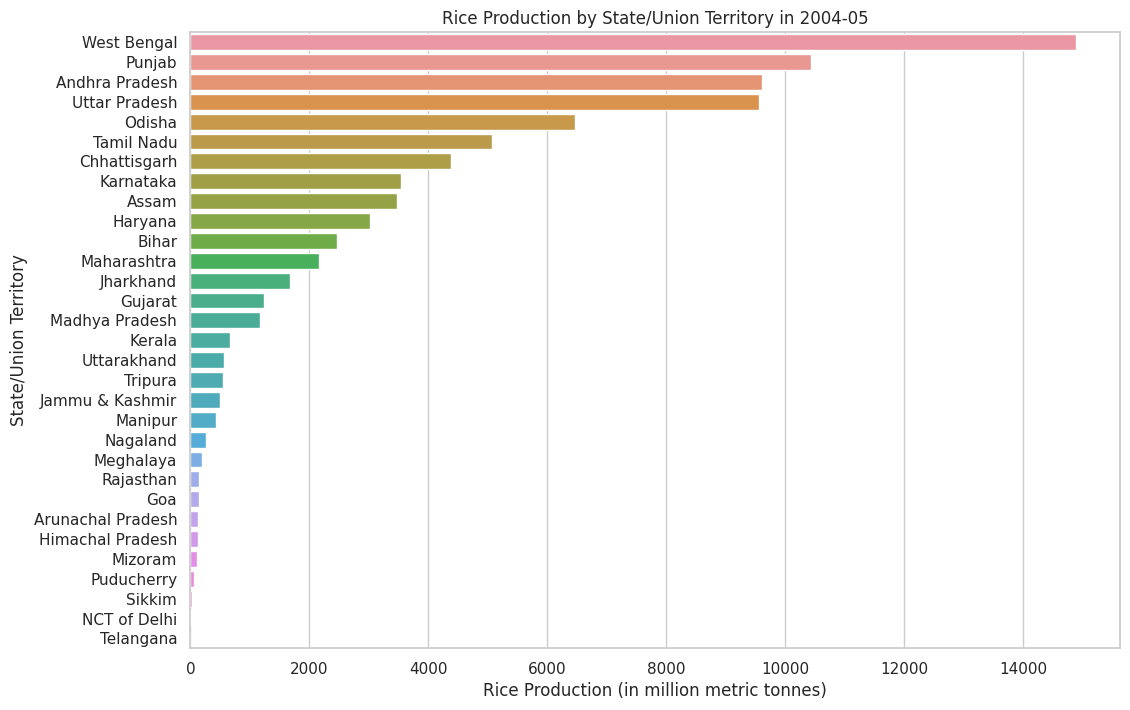

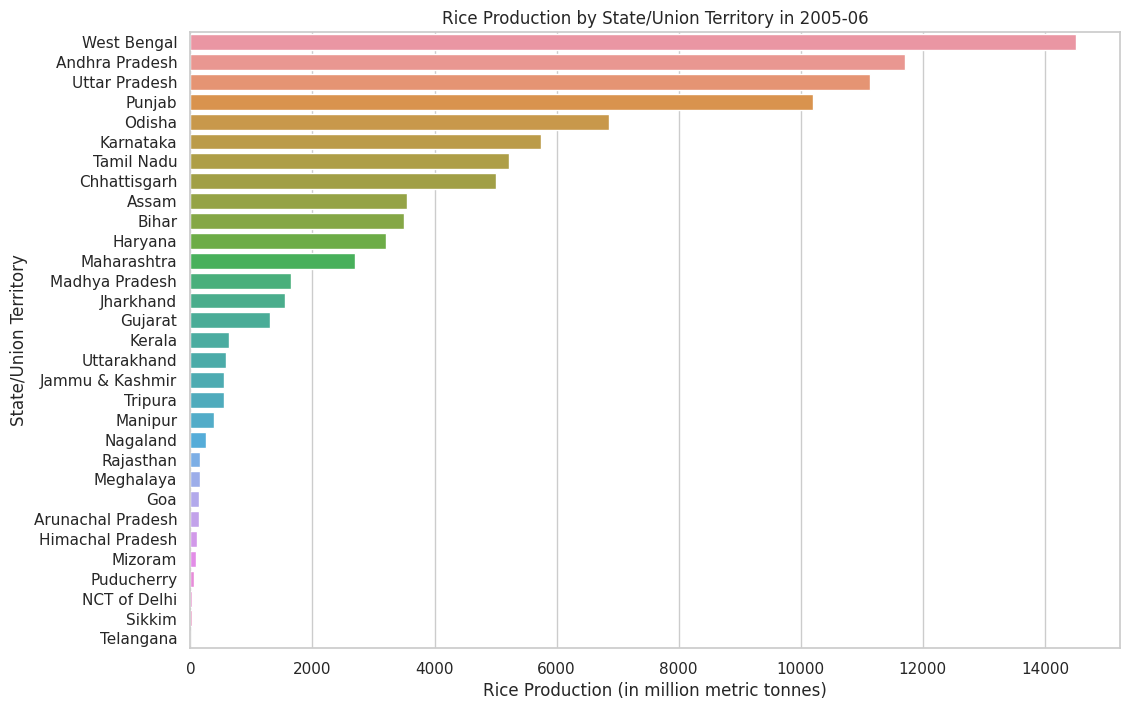

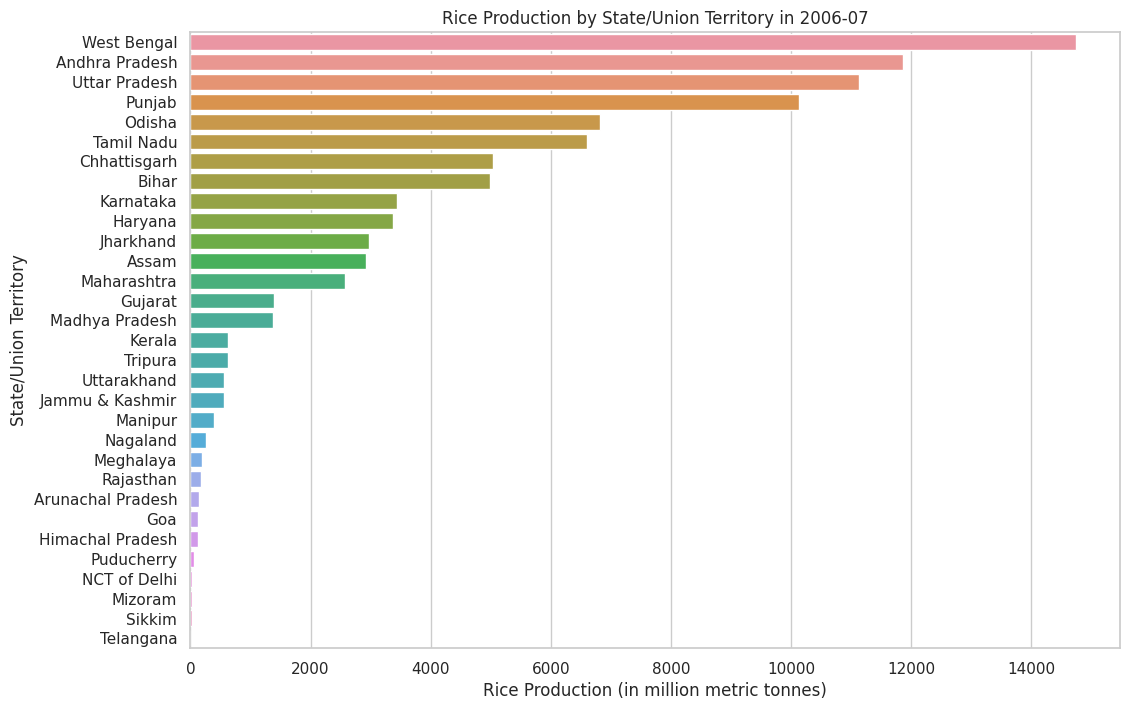

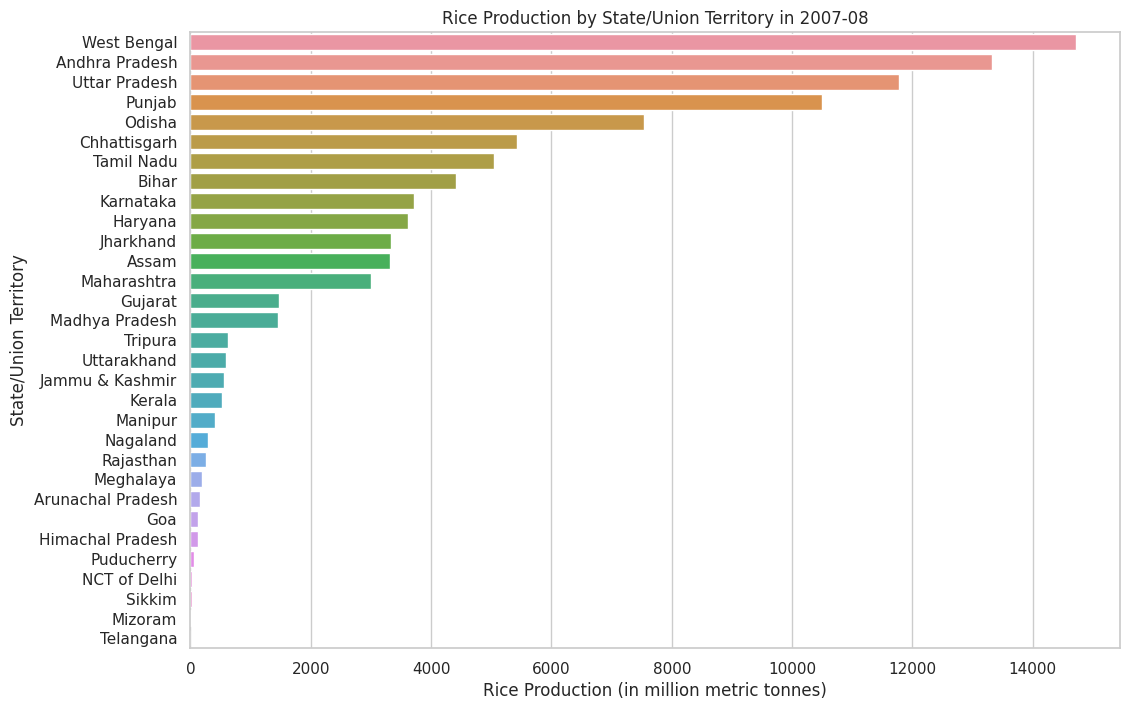

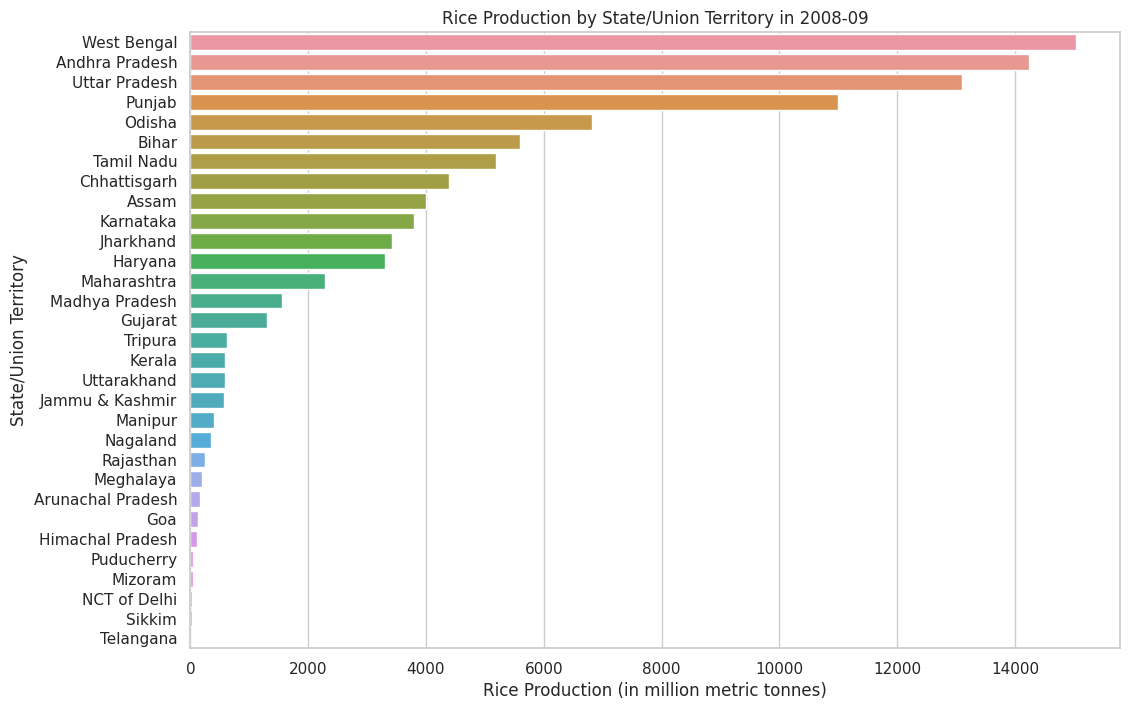

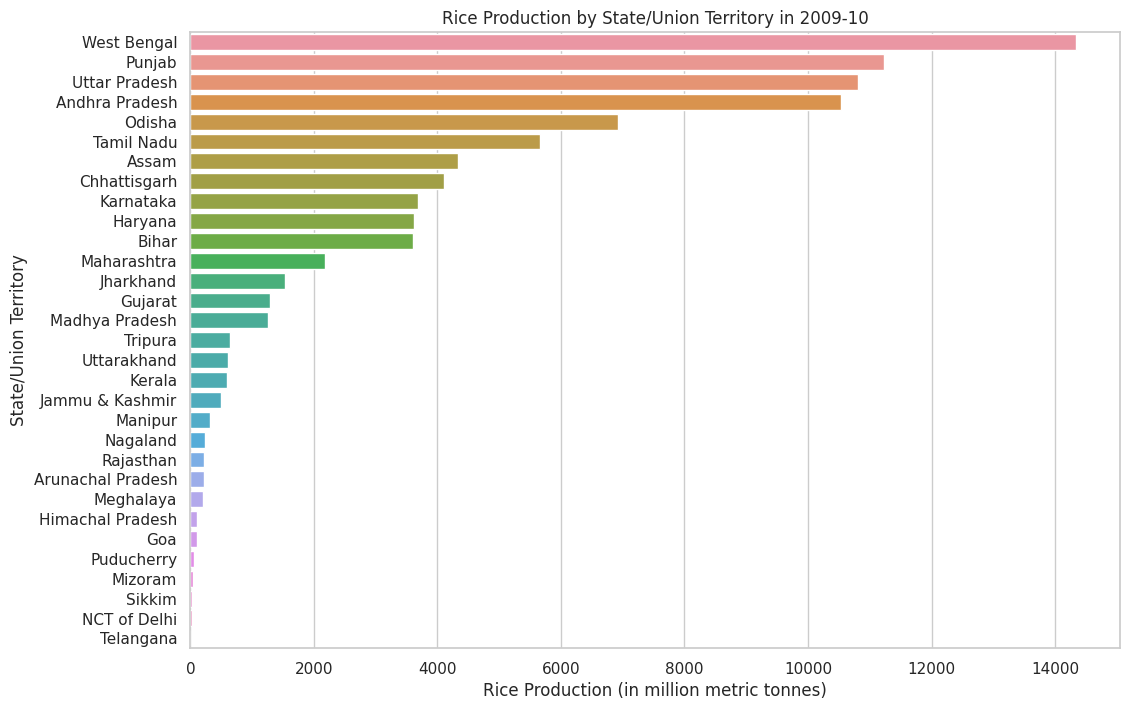

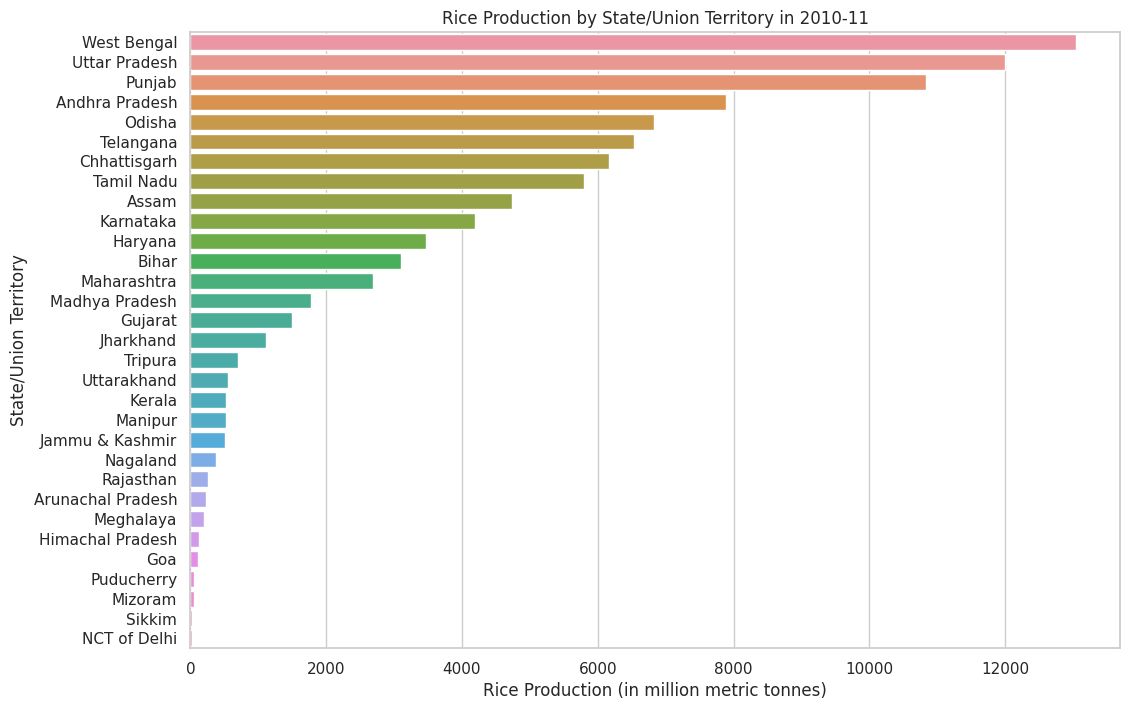

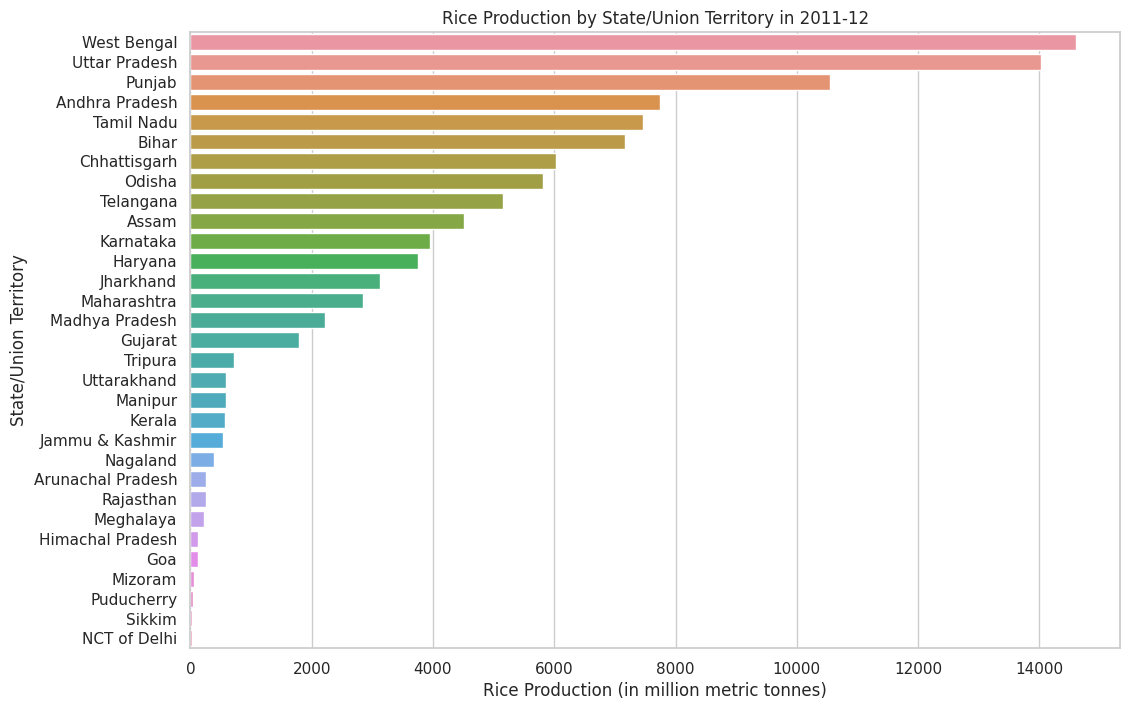

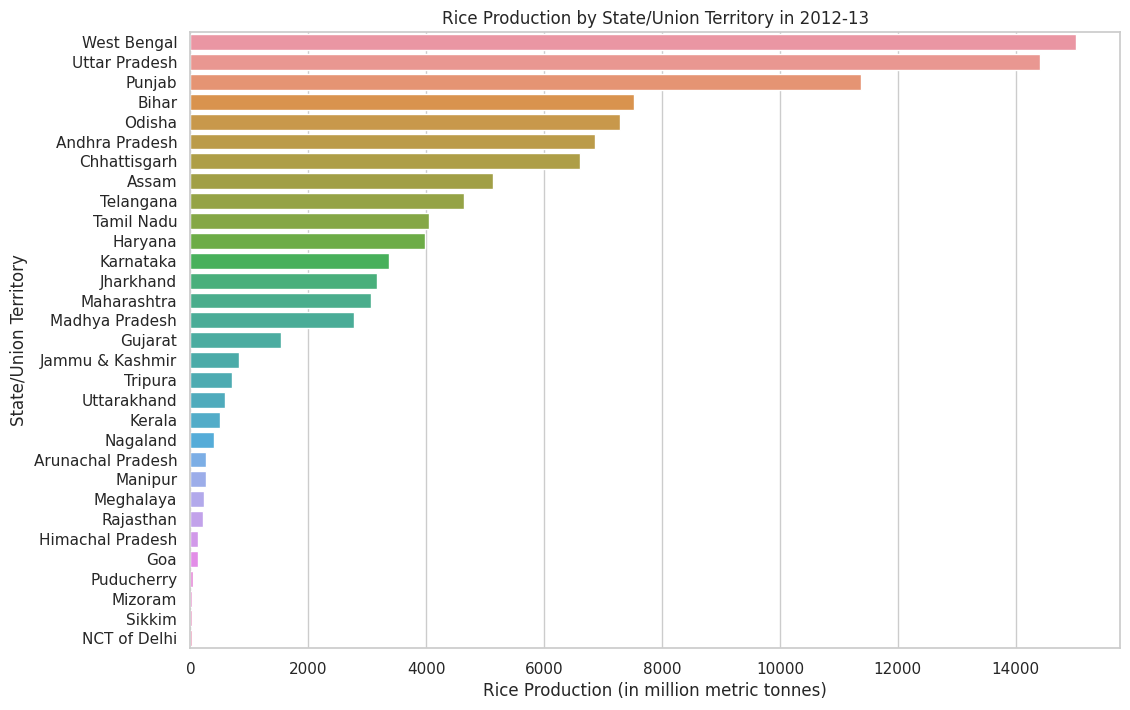

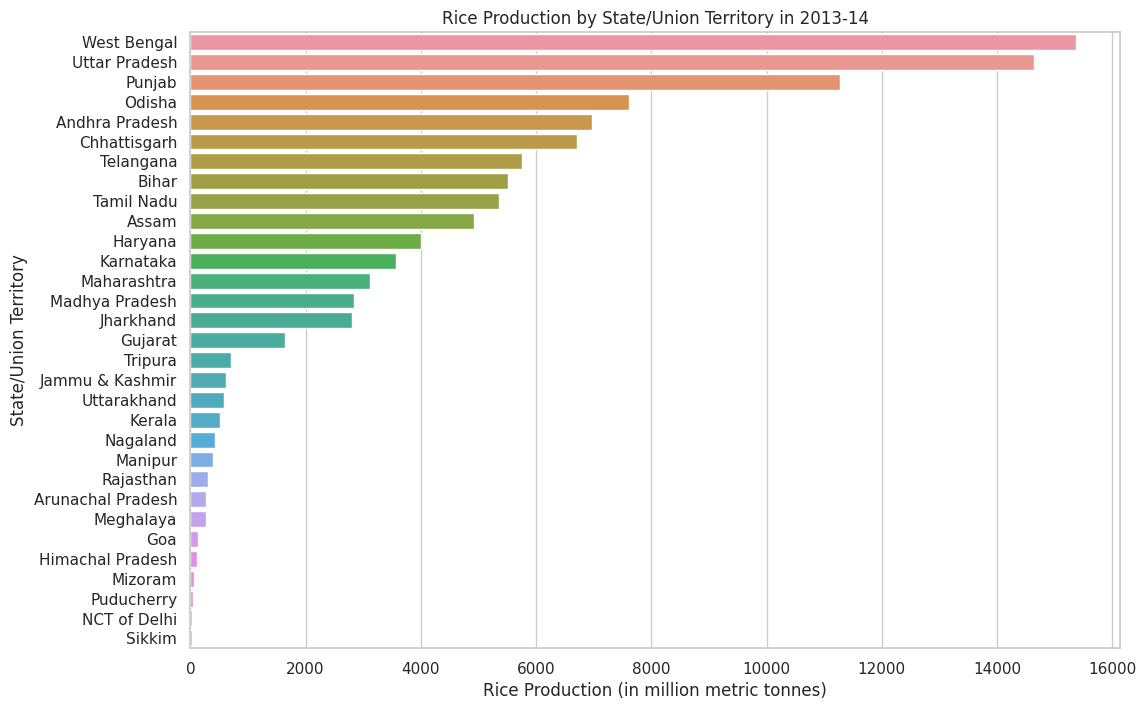

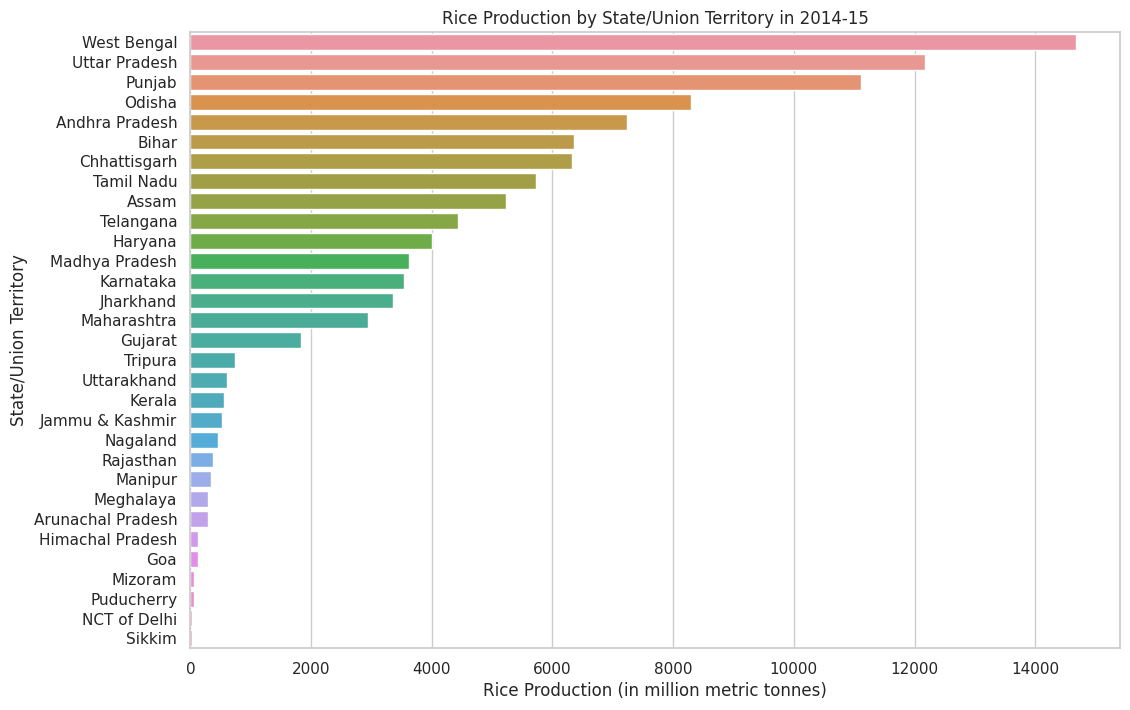

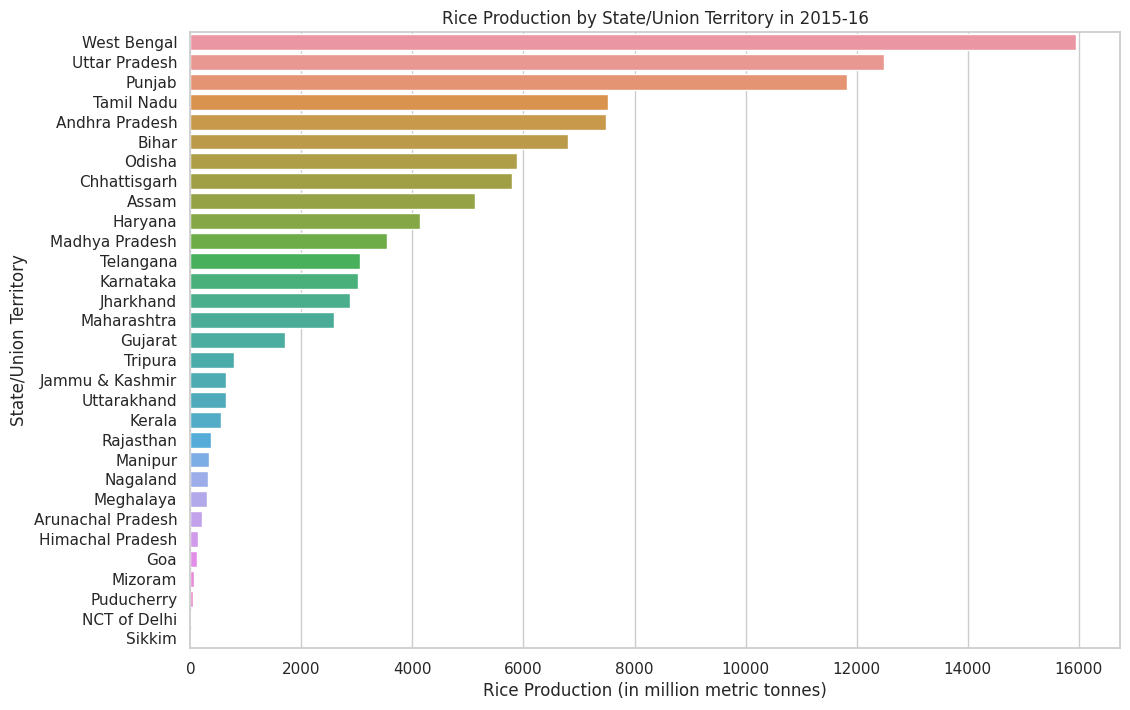

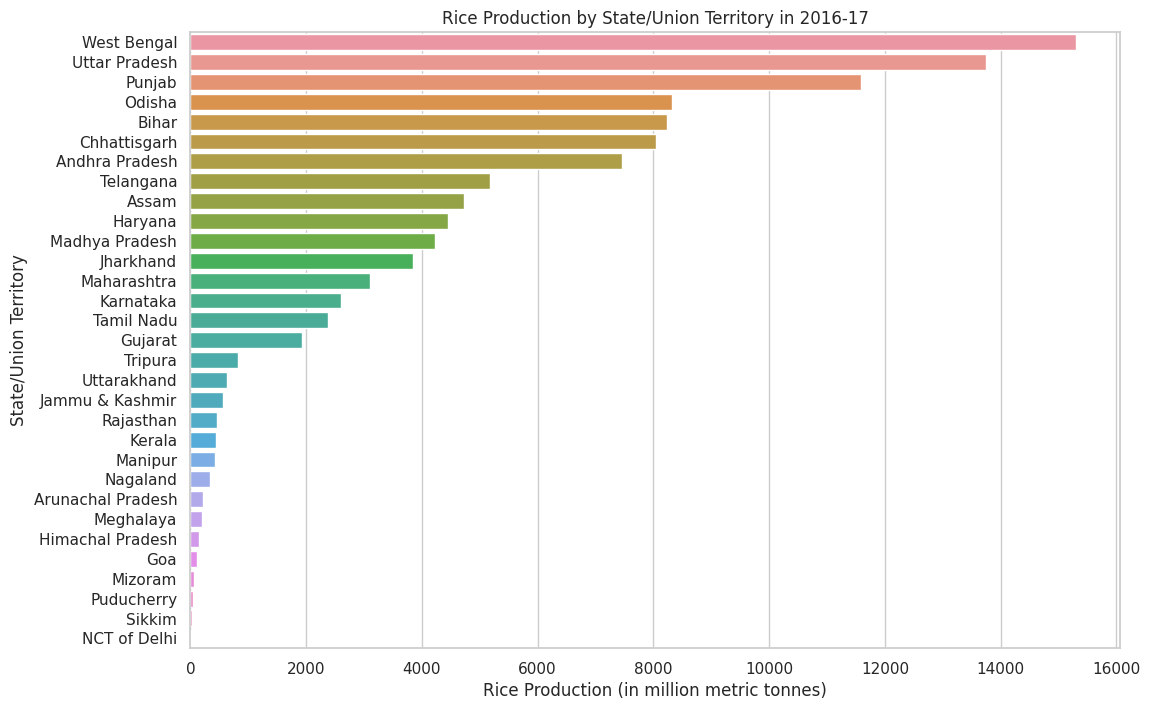

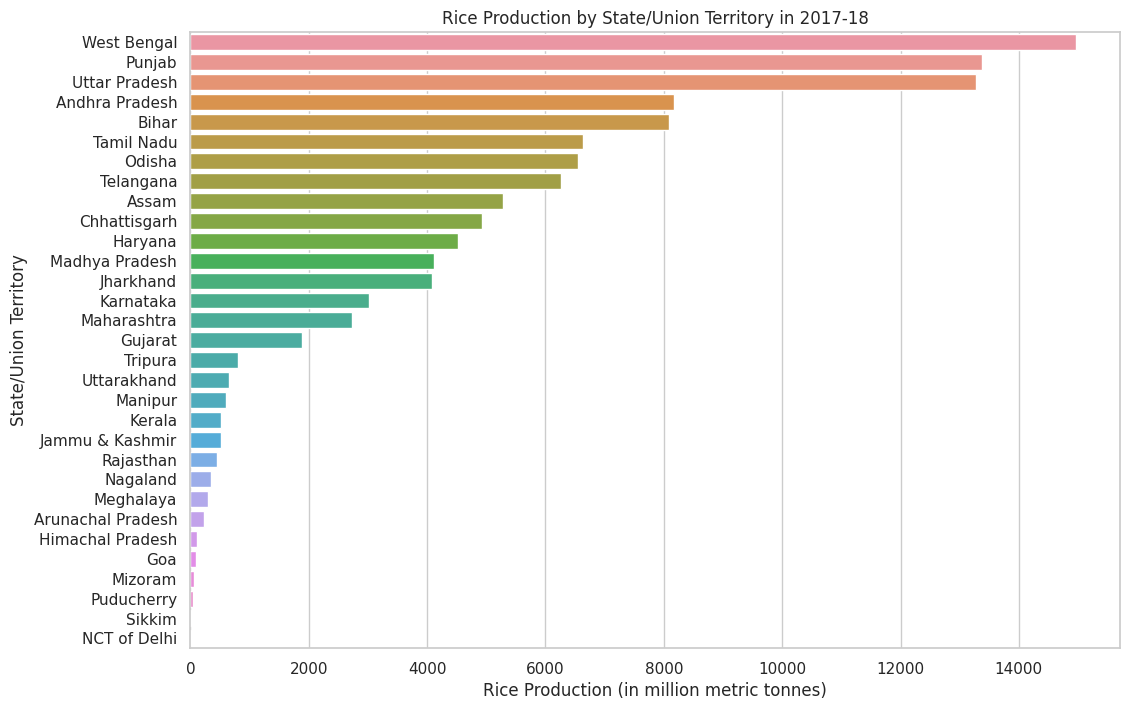

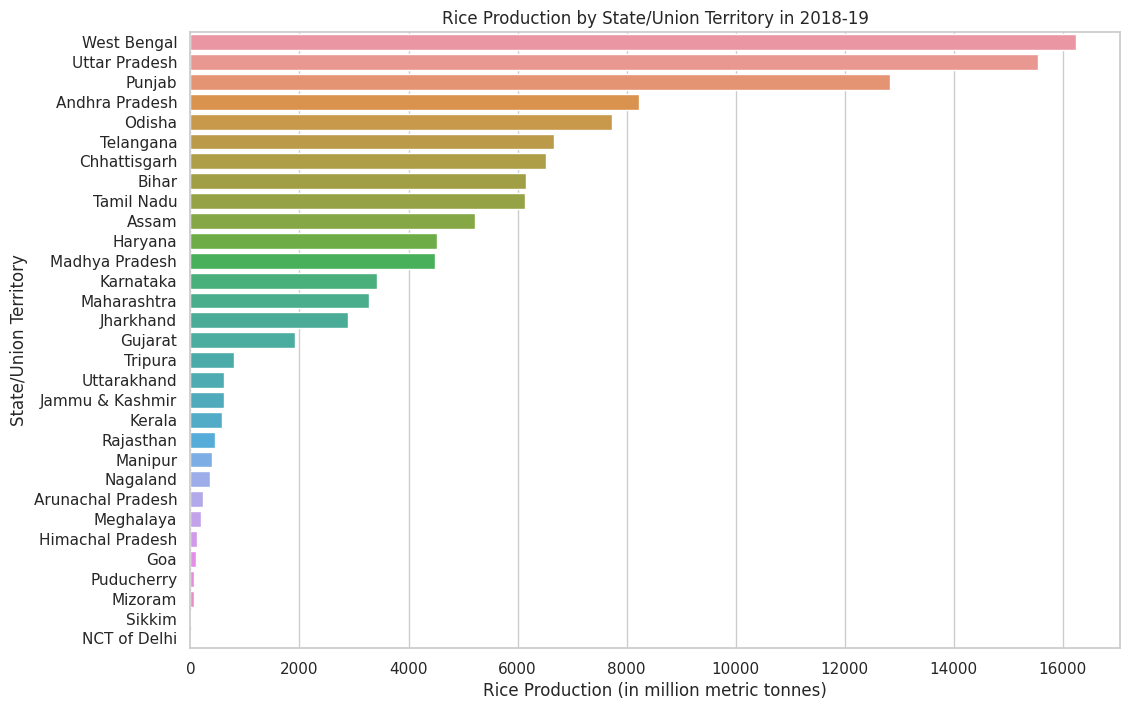

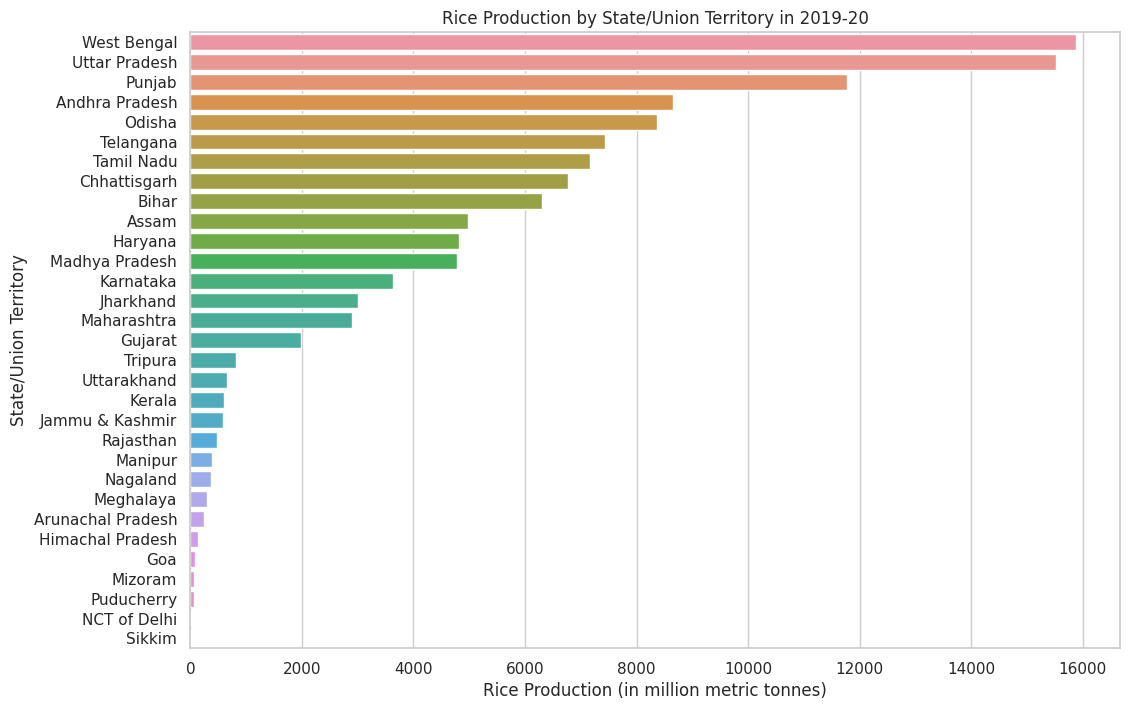

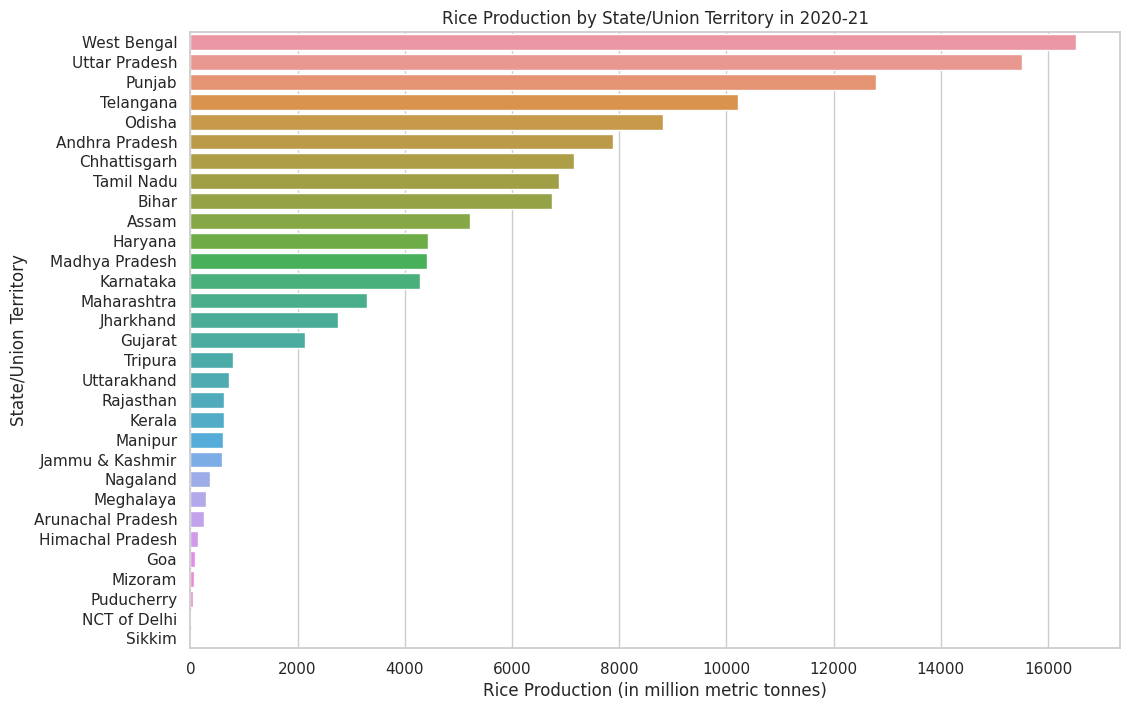

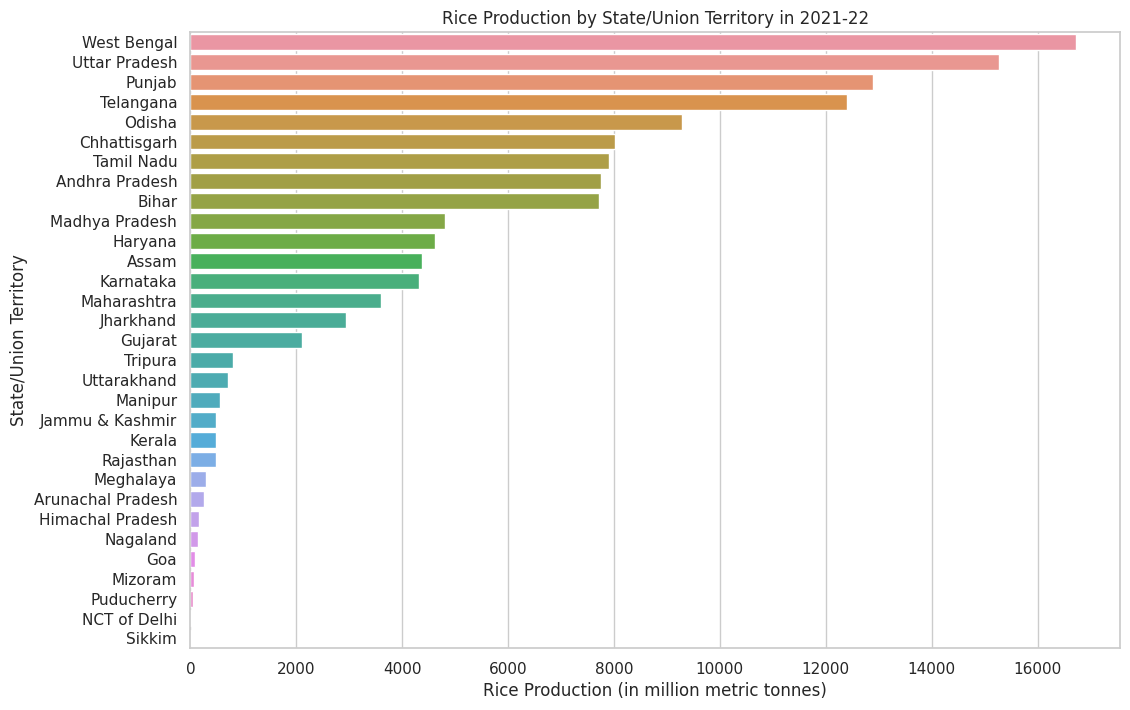

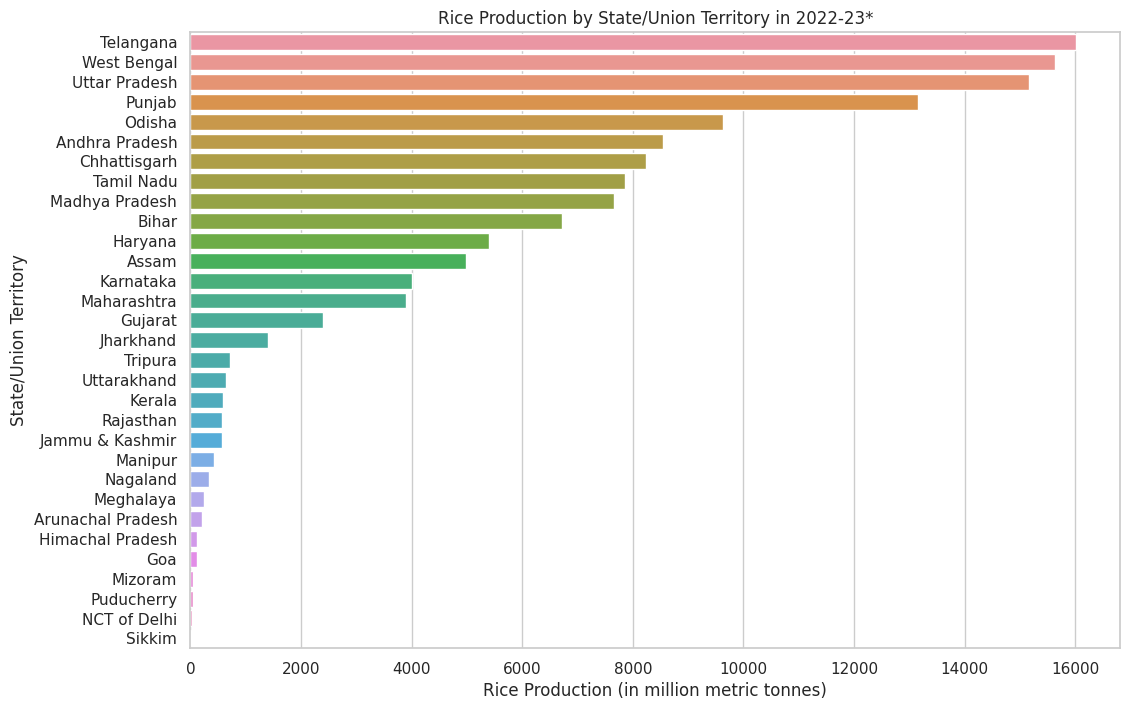

In [403]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove the row for "ALL INDIA"
df_cleaned = df_cleaned[df_cleaned['State/Union Territory'] != 'ALL INDIA']

sns.set(style="whitegrid")

years = ['2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10',
         '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16',
         '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22',
         '2022-23*']

for year in years:
    plt.figure(figsize=(12, 8))
    sns.barplot(x=year, y='State/Union Territory', data=df_cleaned.sort_values(by=year, ascending=False))
    plt.title(f'Rice Production by State/Union Territory in {year}')
    plt.xlabel('Rice Production (in million metric tonnes)')
    plt.ylabel('State/Union Territory')
    plt.show()


In [404]:
df_cleaned_copy = df_cleaned
df_cleaned_copy.head()

State/Union Territory  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  \
0        Andhra Pradesh  9601.00 11704.00 11872.00 13324.00 14241.00 10538.00   
1     Arunachal Pradesh   135.00   146.20   146.20   158.10   163.90   215.80   
2                 Assam  3470.70  3552.50  2916.00  3319.00  4008.50  4335.90   
3                 Bihar  2472.20  3495.50  4989.30  4418.10  5590.30  3599.30   
4          Chhattisgarh  4383.30  5011.60  5041.40  5426.60  4391.80  4110.40   

   2010-11  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  2017-18  \
0  7882.40  7746.20  6862.40  6969.70  7233.90  7488.70  7452.40  8166.20   
1   234.00   255.00   263.00   276.20   285.00   204.00   220.00   233.30   
2  4736.60  4516.30  5128.50  4927.10  5222.70  5125.10  4727.40  5283.70   
3  3102.10  7162.60  7529.30  5505.80  6356.70  6802.20  8239.30  8093.10   
4  6159.00  6028.40  6608.80  6716.40  6322.10  5789.40  8048.40  4930.80   

   2018-19  2019-20  2020-21  2021-22  2022-23*  
0  8234.70  8658.90  7882.90  7763.60   8542.30  
1   240.00   244.70   247.10   252.40    217.77  
2  5220.60  4984.60  5214.80  4382.10   4979.80  
3  6155.50  6298.00  6747.00  7717.00   6725.20  
4  6526.90  6774.80  7161.20  8021.70   8238.30

**Total Rice Production by Region**

/tmp/ipykernel_33/2908759531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_copy['Region'] = df_cleaned_copy['State/Union Territory'].apply(lambda x: x.split()[0])


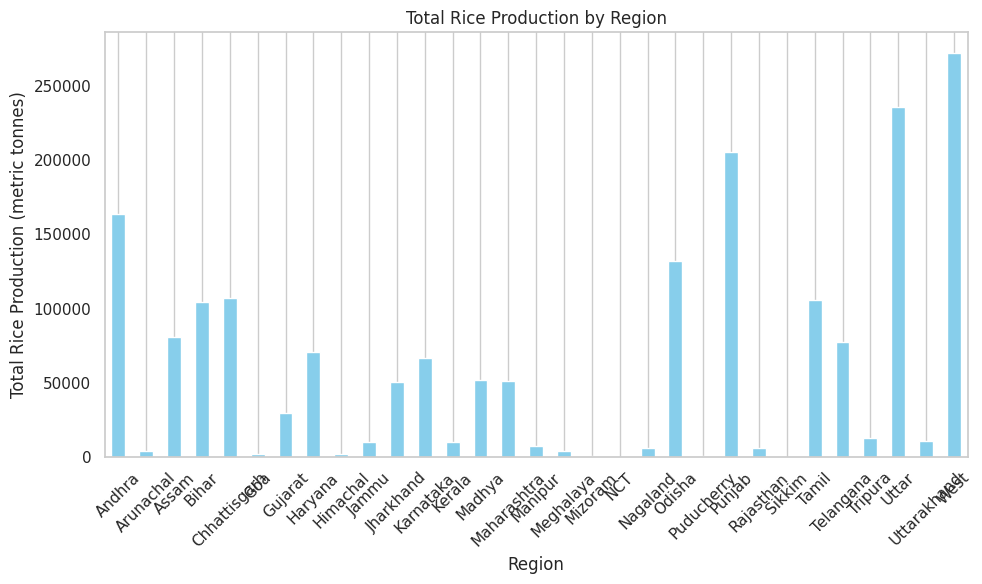

In [405]:
# Extract the regions from the State/Union Territory column
df_cleaned_copy['Region'] = df_cleaned_copy['State/Union Territory'].apply(lambda x: x.split()[0])

# Calculate the total rice production for each region
region_production = df_cleaned_copy.groupby('Region').sum().iloc[:, 1:19].sum(axis=1)

plt.figure(figsize=(10, 6))
region_production.plot(kind='bar', color='skyblue')
plt.title('Total Rice Production by Region')
plt.xlabel('Region')
plt.ylabel('Total Rice Production (metric tonnes)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Rice Production Trend by State/Union Territory**

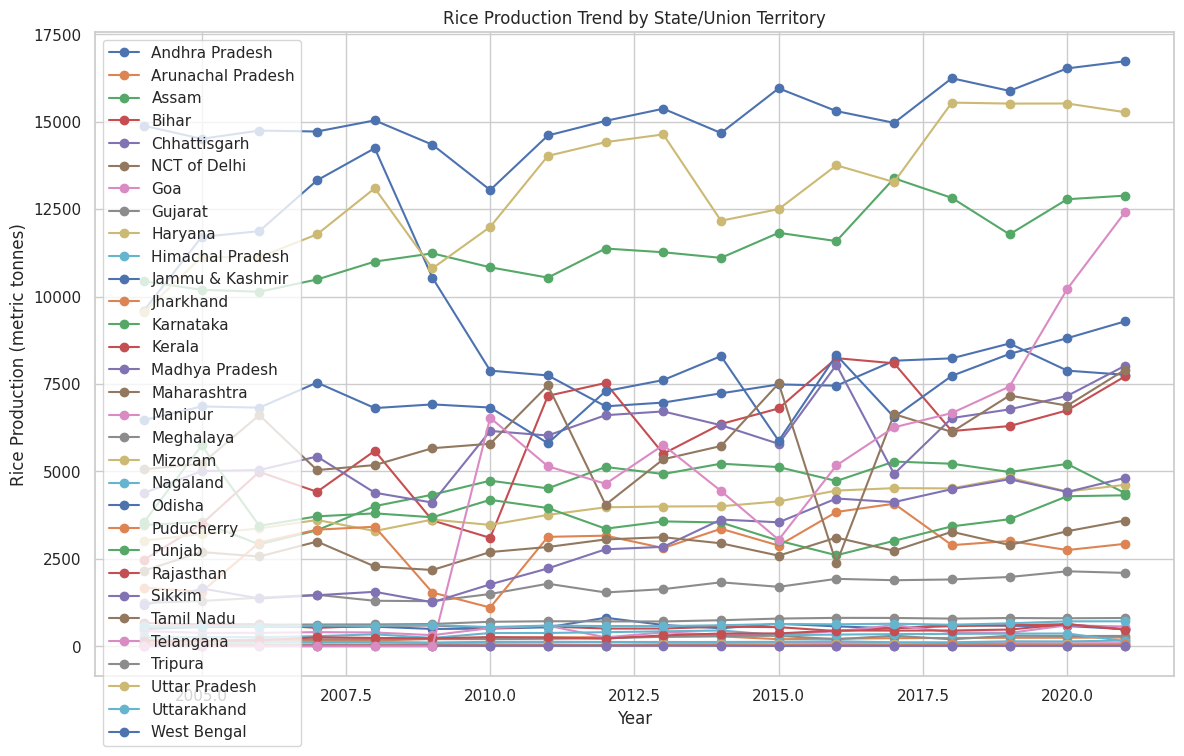

In [406]:
# Plot line graphs for rice production trend in each state/union territory
plt.figure(figsize=(12, 8))
for state in merged_df['State/Union Territory'].unique():
    state_data = merged_df[merged_df['State/Union Territory'] == state].iloc[:, 1:19].values.flatten()
    plt.plot(range(2004, 2022), state_data, marker='o', label=state)

plt.title('Rice Production Trend by State/Union Territory')
plt.xlabel('Year')
plt.ylabel('Rice Production (metric tonnes)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [407]:
df_cleaned= df_cleaned.reset_index()

In [408]:
df_cleaned.head()

index State/Union Territory  2004-05  2005-06  2006-07  2007-08  2008-09  \
0      0        Andhra Pradesh  9601.00 11704.00 11872.00 13324.00 14241.00   
1      1     Arunachal Pradesh   135.00   146.20   146.20   158.10   163.90   
2      2                 Assam  3470.70  3552.50  2916.00  3319.00  4008.50   
3      3                 Bihar  2472.20  3495.50  4989.30  4418.10  5590.30   
4      4          Chhattisgarh  4383.30  5011.60  5041.40  5426.60  4391.80   

   2009-10  2010-11  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  \
0 10538.00  7882.40  7746.20  6862.40  6969.70  7233.90  7488.70  7452.40   
1   215.80   234.00   255.00   263.00   276.20   285.00   204.00   220.00   
2  4335.90  4736.60  4516.30  5128.50  4927.10  5222.70  5125.10  4727.40   
3  3599.30  3102.10  7162.60  7529.30  5505.80  6356.70  6802.20  8239.30   
4  4110.40  6159.00  6028.40  6608.80  6716.40  6322.10  5789.40  8048.40   

   2017-18  2018-19  2019-20  2020-21  2021-22  2022-23*        Region  
0  8166.20  8234.70  8658.90  7882.90  7763.60   8542.30        Andhra  
1   233.30   240.00   244.70   247.10   252.40    217.77     Arunachal  
2  5283.70  5220.60  4984.60  5214.80  4382.10   4979.80         Assam  
3  8093.10  6155.50  6298.00  6747.00  7717.00   6725.20         Bihar  
4  4930.80  6526.90  6774.80  7161.20  8021.70   8238.30  Chhattisgarh

In [411]:
df_cleaned = df_cleaned.drop("index",axis=1)

In [413]:
df_cleaned = df_cleaned.drop("Region",axis=1)

**Average Rice Production rate by State/Union Territory**

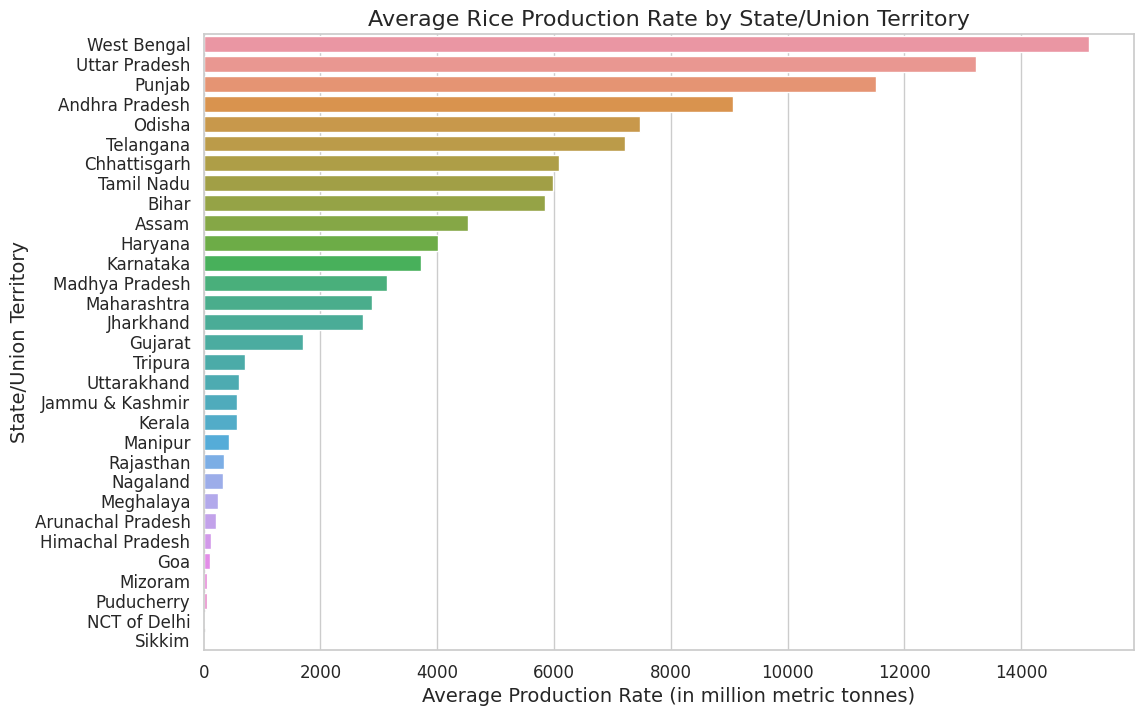

In [414]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove the row for "ALL INDIA"
df_cleaned = df_cleaned[df_cleaned['State/Union Territory'] != 'ALL INDIA']

# Calculate the average production rate for each state/union territory
df_avg_production = df_cleaned.drop(columns=['State/Union Territory']).mean(axis=1)

# Create a DataFrame to hold the average production rate for each state/union territory
df_avg_production = pd.DataFrame({'State/Union Territory': df_cleaned['State/Union Territory'], 
                                  'Average Production Rate': df_avg_production})

# Adjust the average production rate for Telangana
telangana_index = df_avg_production[df_avg_production['State/Union Territory'] == 'Telangana'].index[0]
df_avg_production.at[telangana_index, 'Average Production Rate'] /= (13/19)

# Create a bar plot for average production rate by state/union territory
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Production Rate', y='State/Union Territory', data=df_avg_production.sort_values(by='Average Production Rate', ascending=False))
plt.title('Average Rice Production Rate by State/Union Territory', fontsize=16)
plt.xlabel('Average Production Rate (in million metric tonnes)', fontsize=14)
plt.ylabel('State/Union Territory', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



**Calculating variation of rice production in each state and union territory throughout the years**

In [ ]:
# df_cleaned.reset_index()
df_cleaned.head()

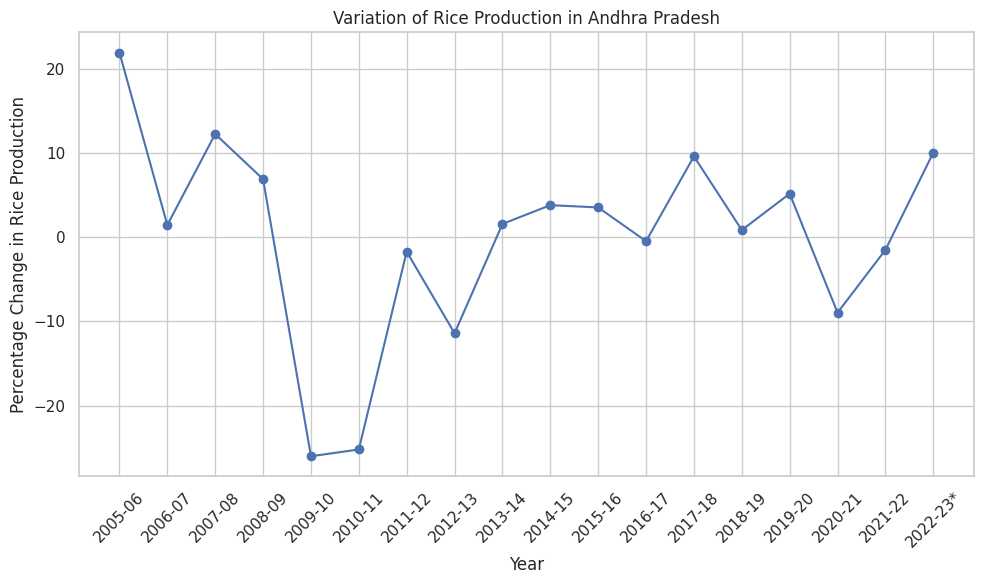

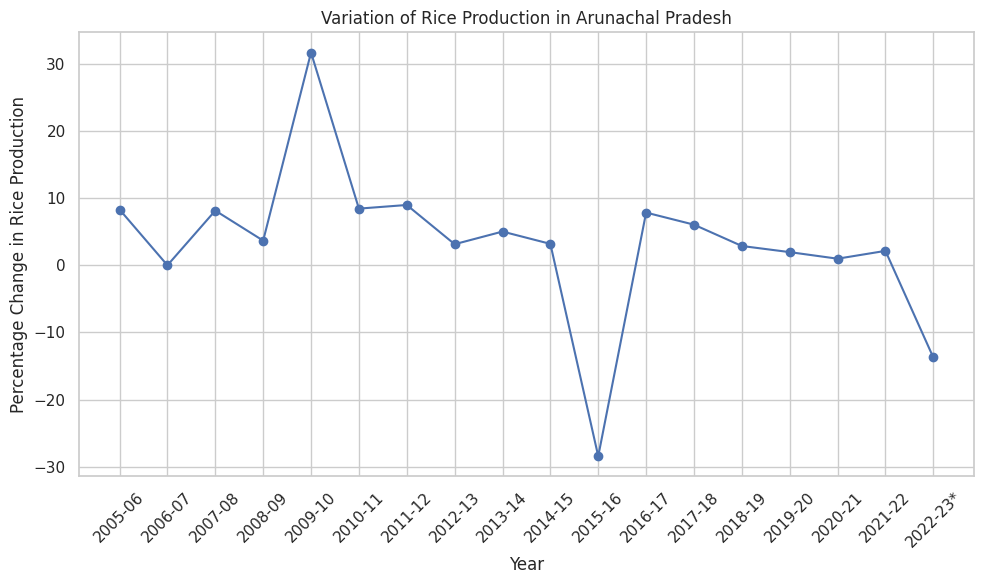

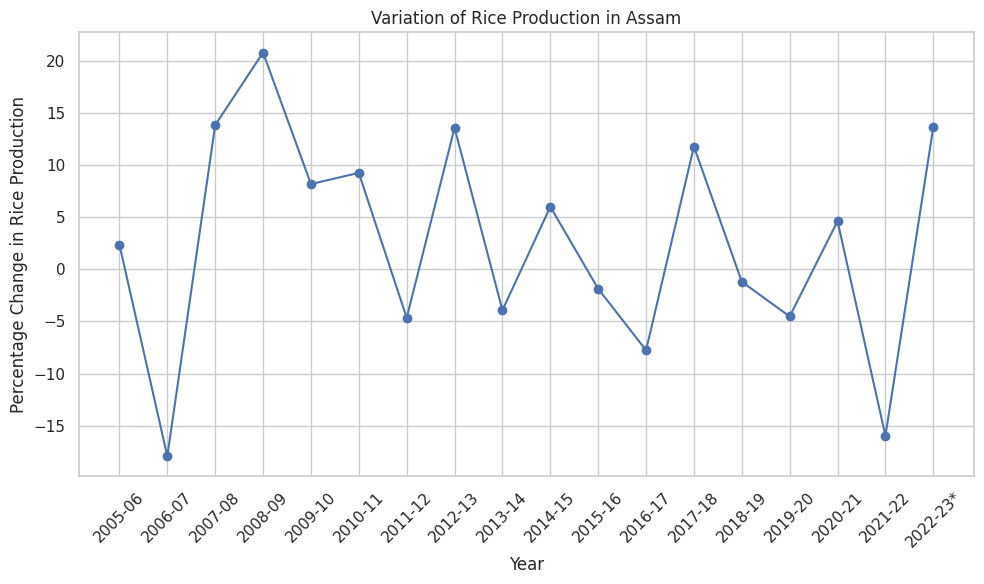

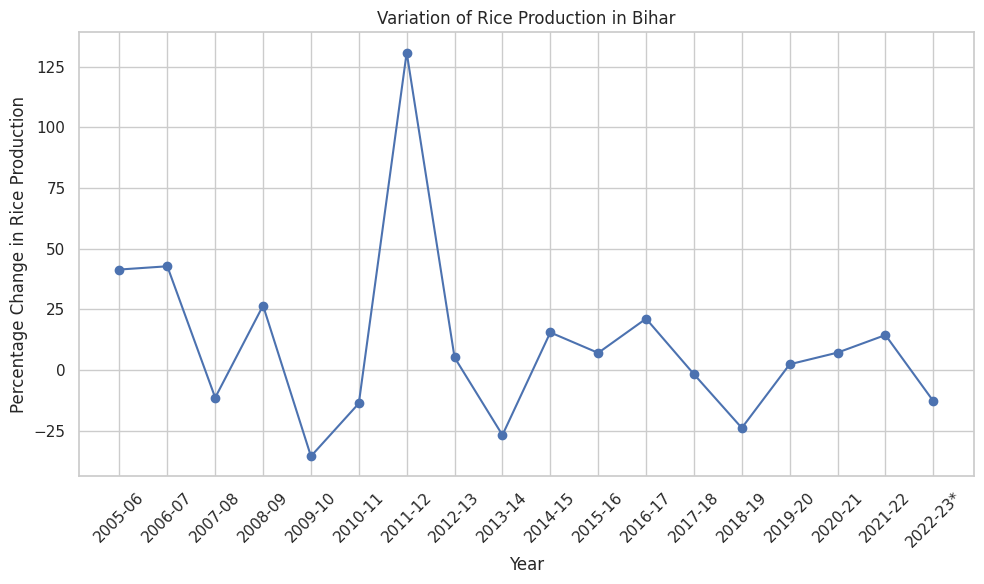

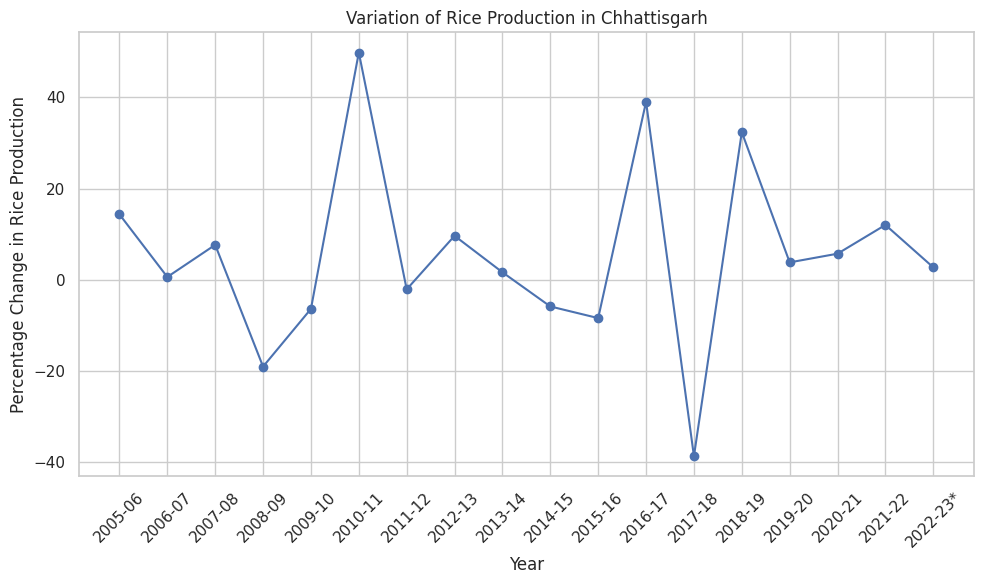

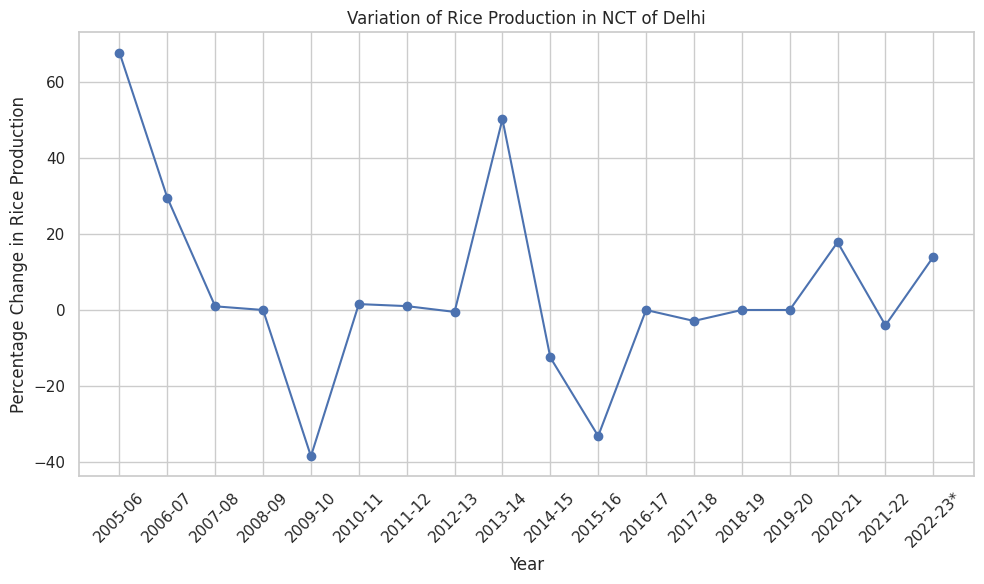

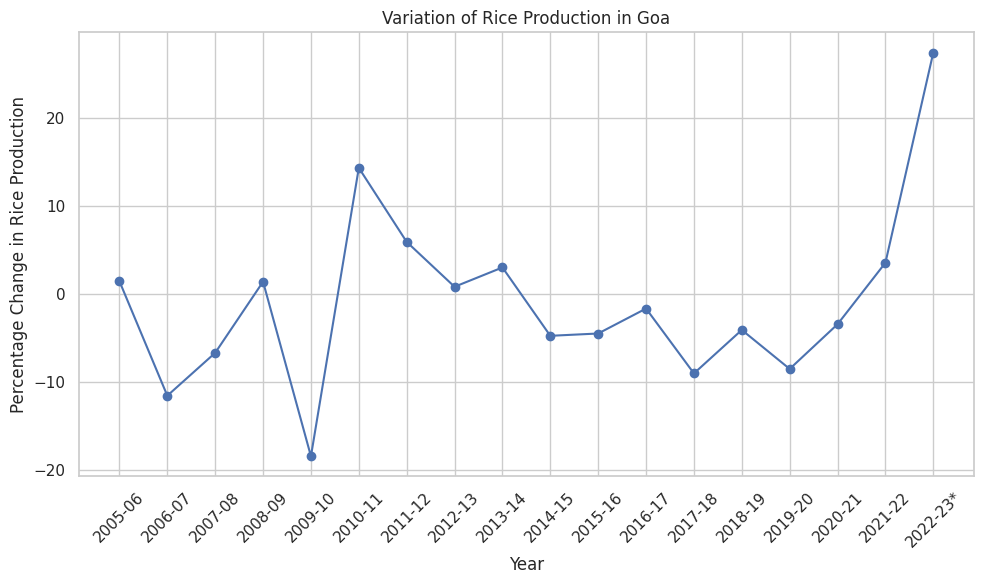

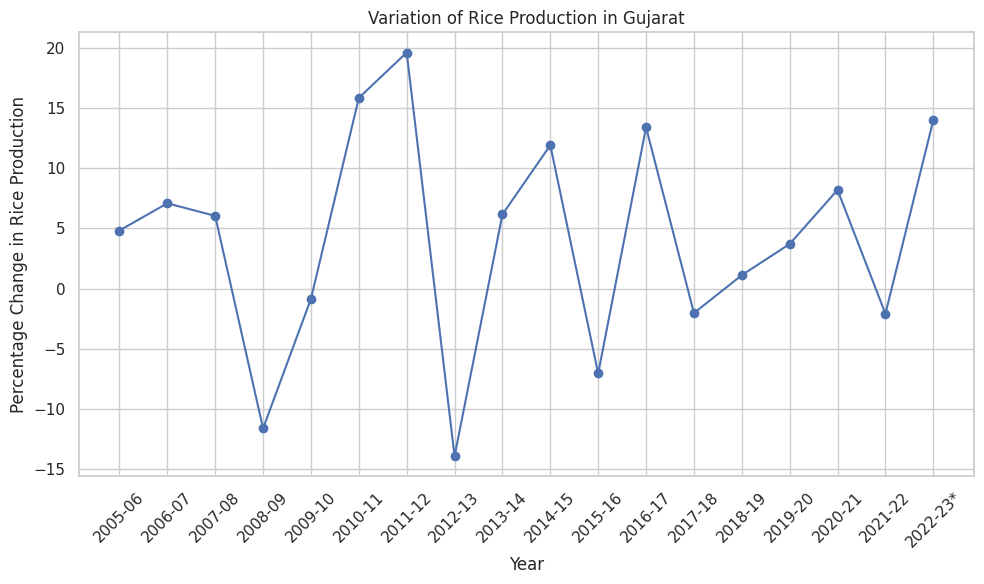

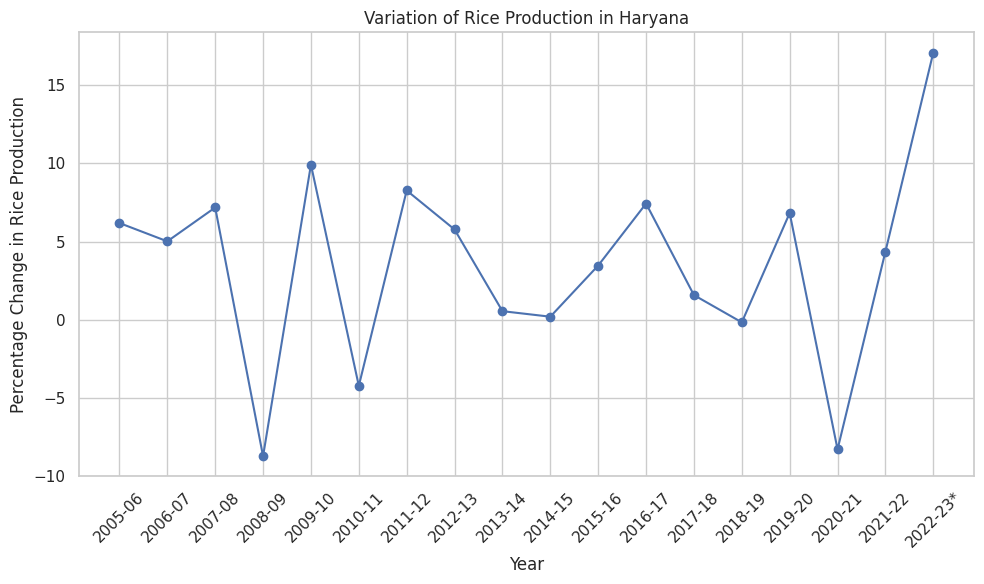

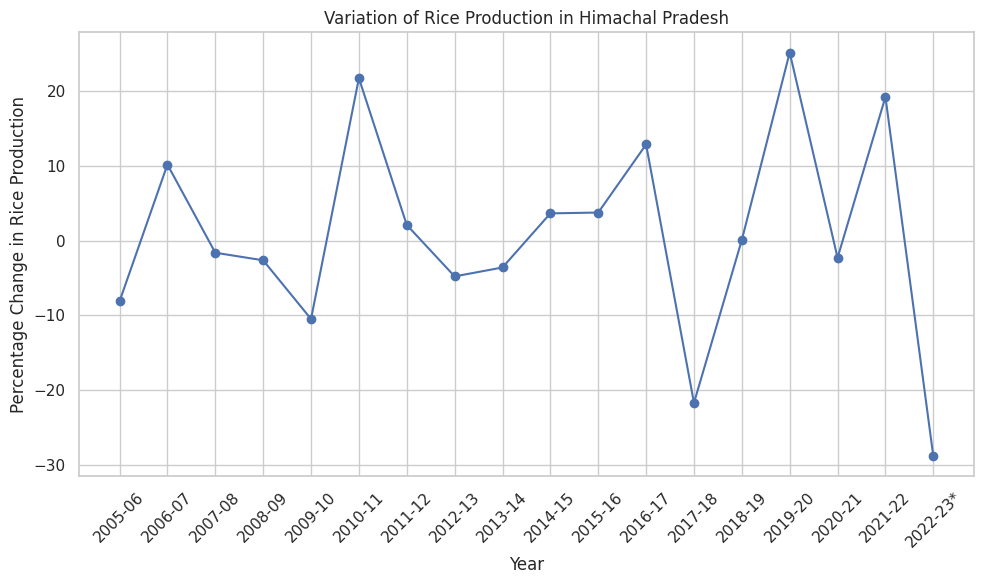

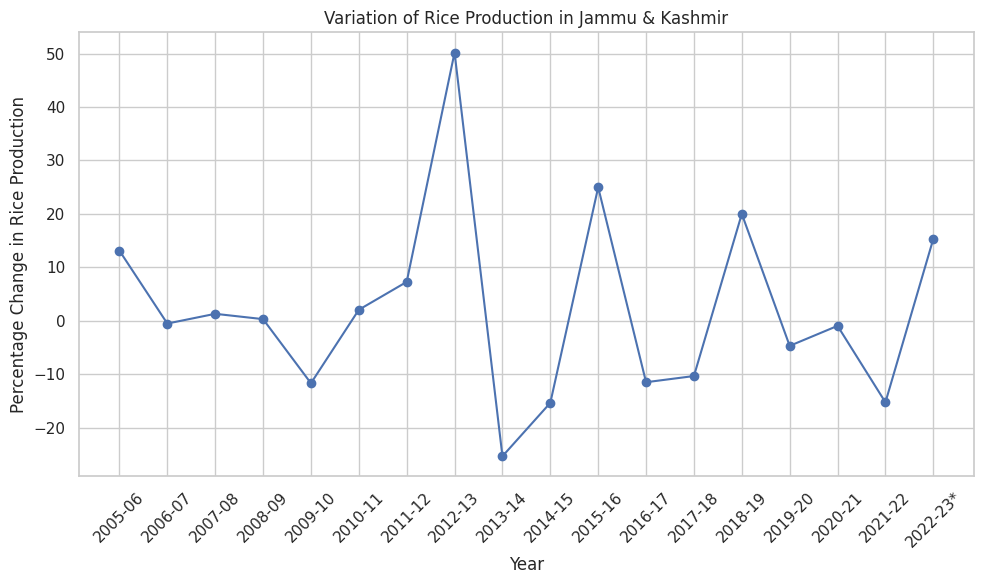

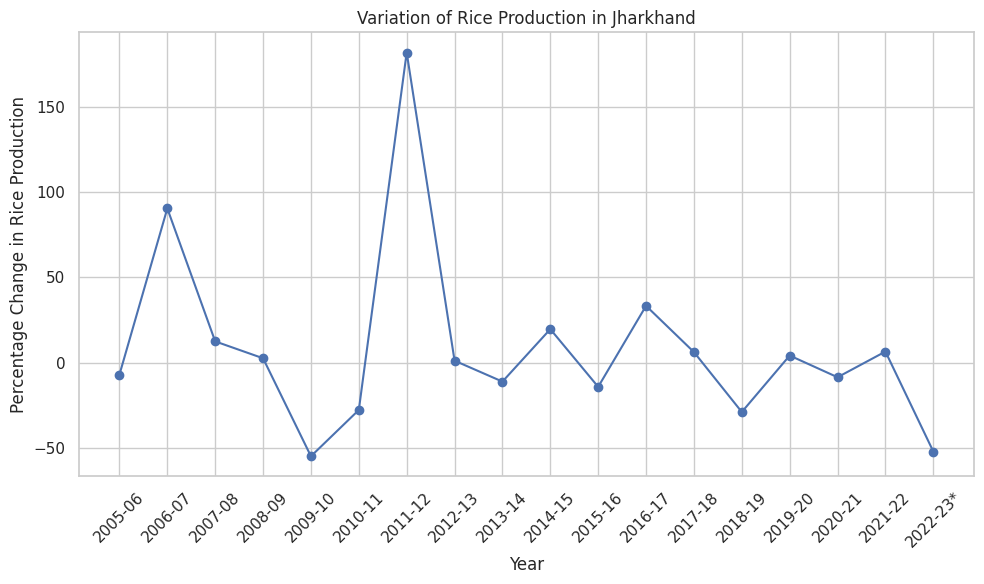

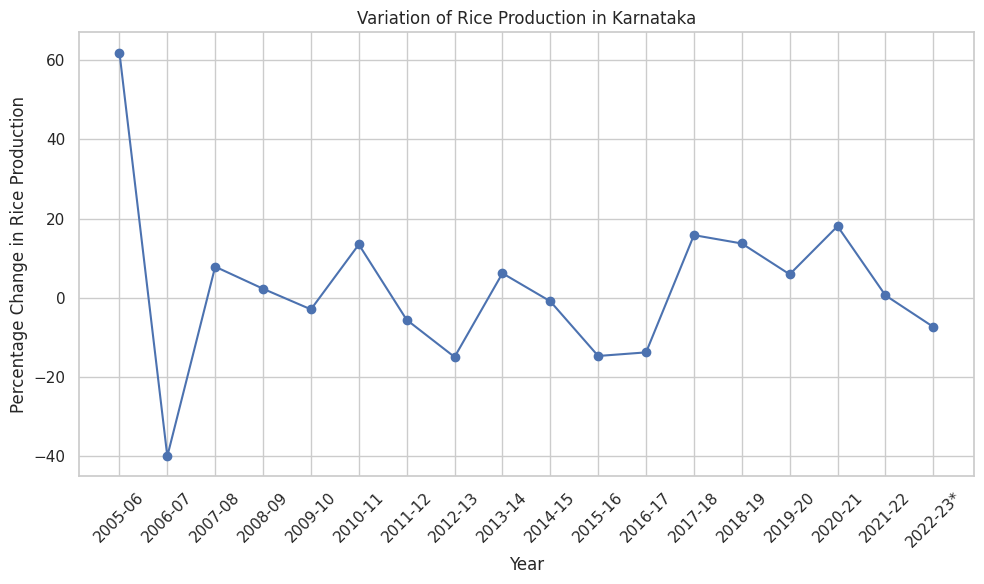

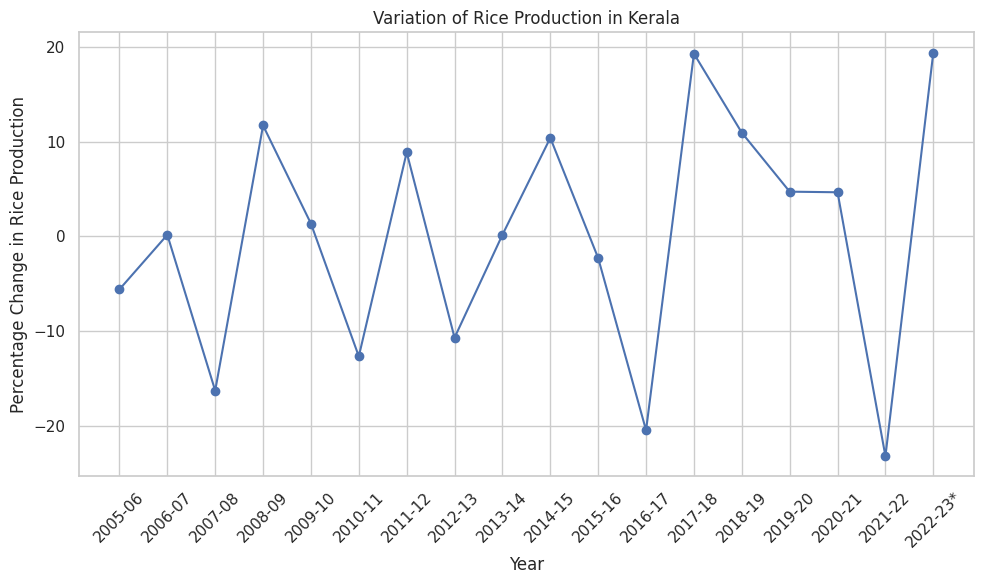

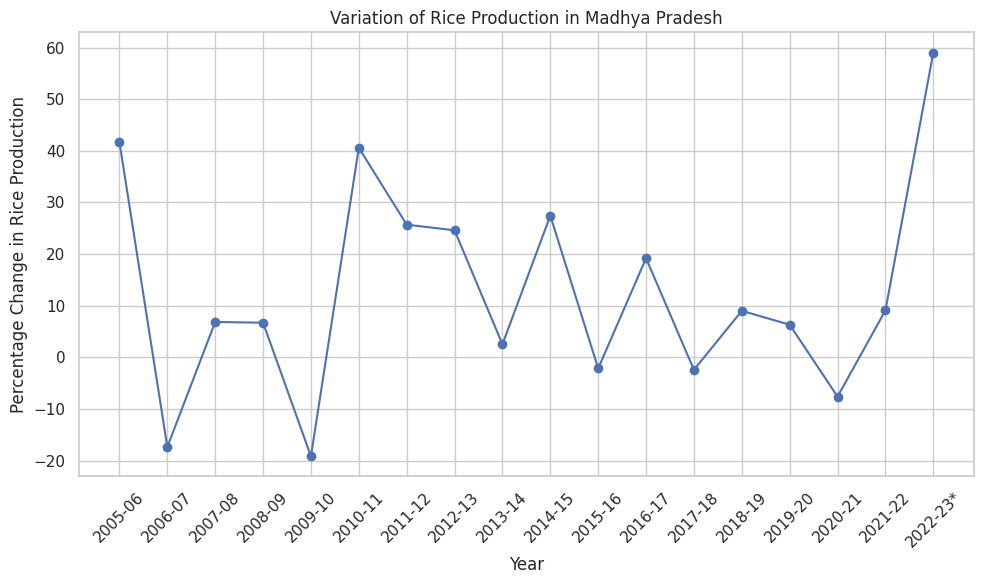

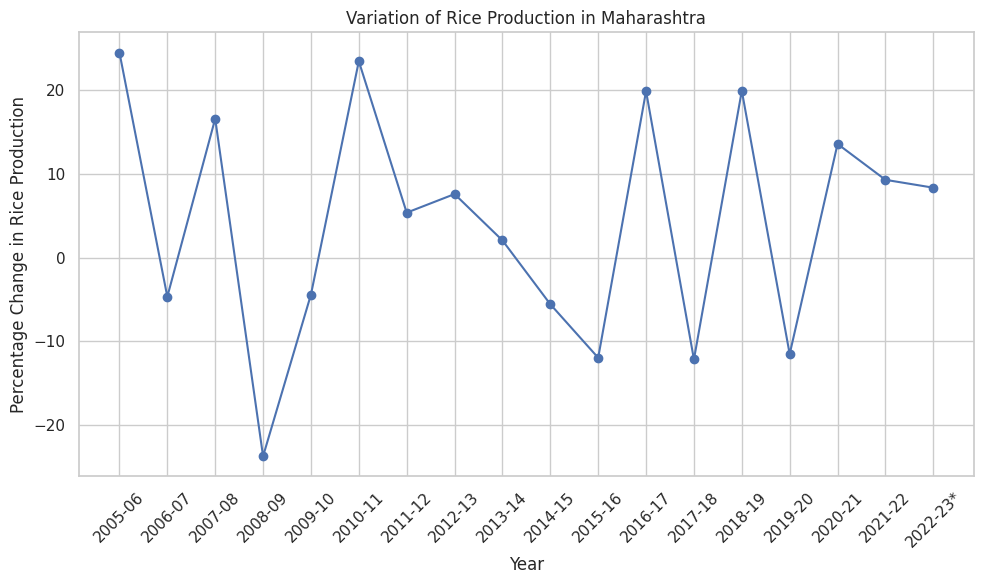

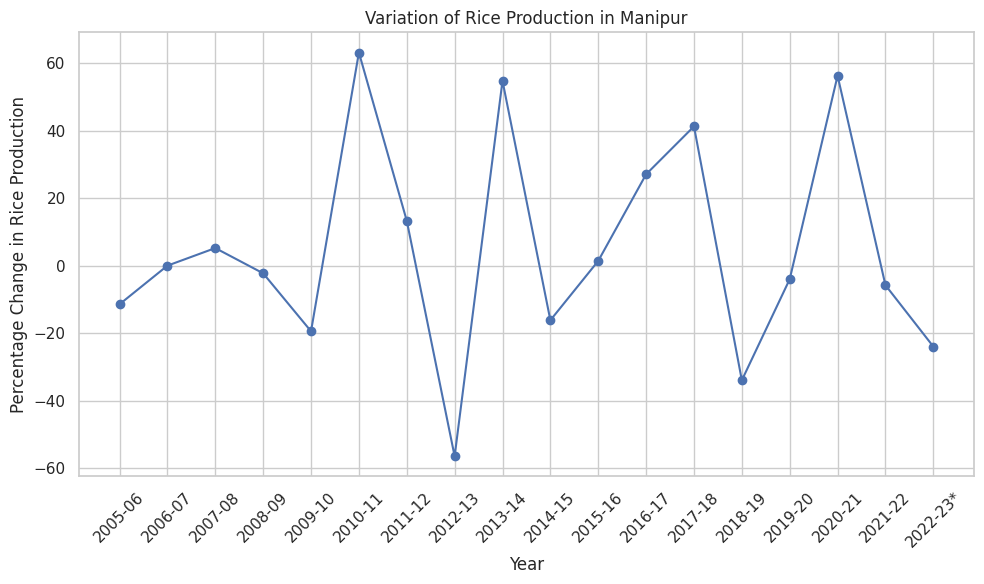

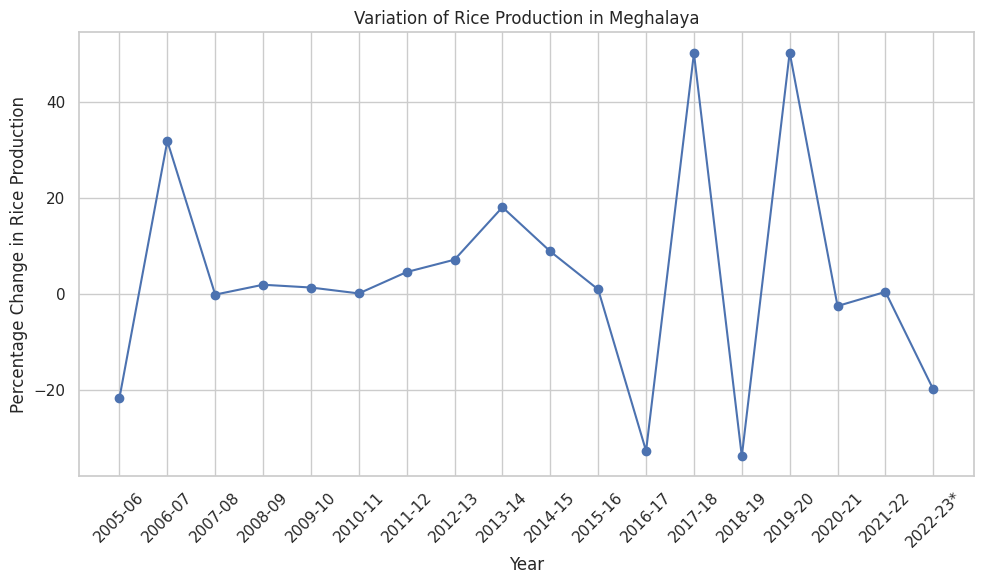

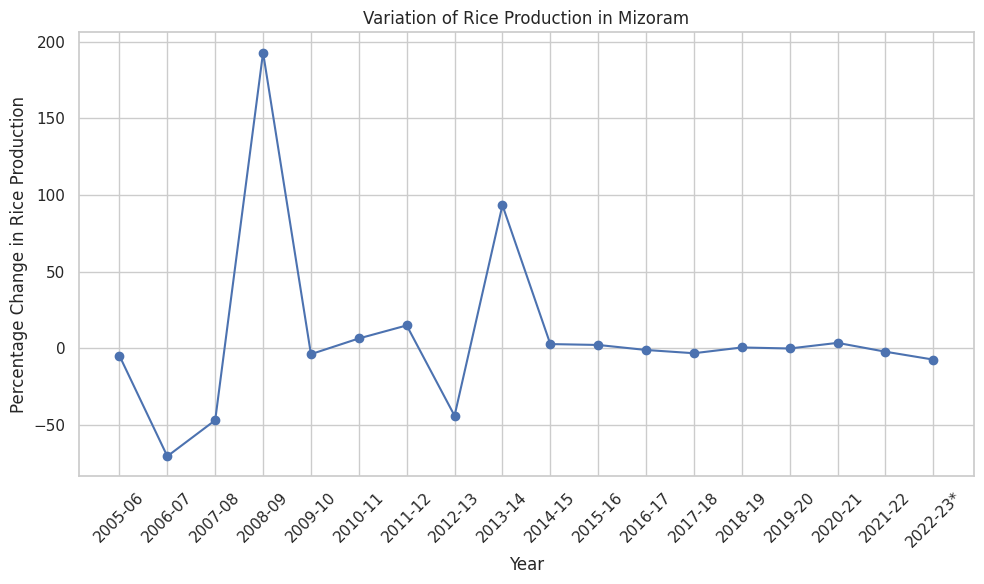

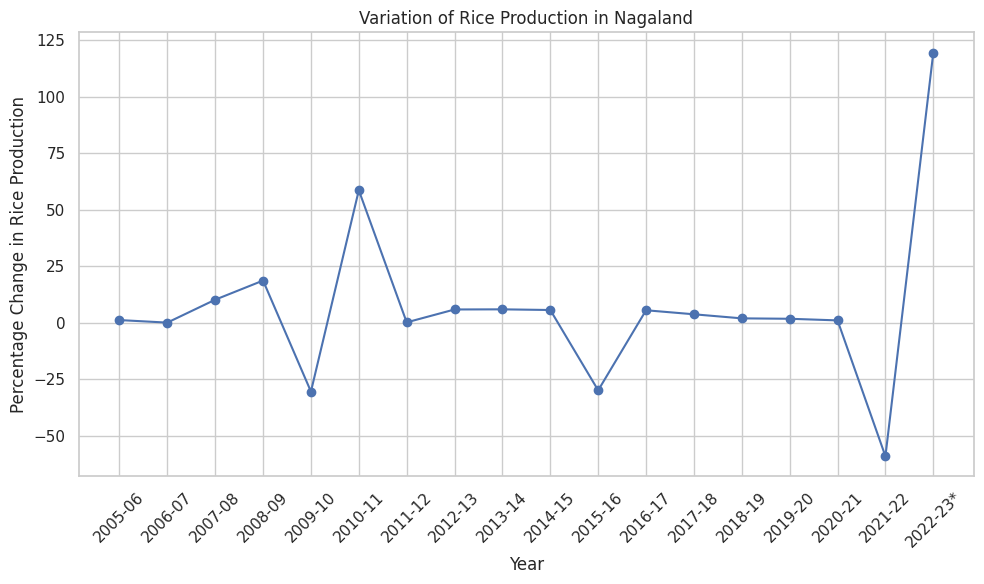

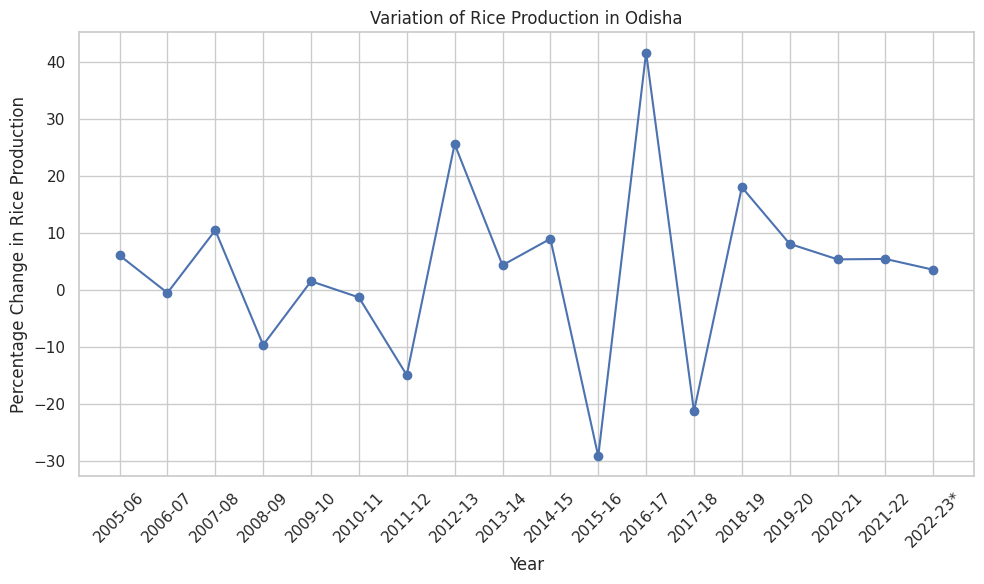

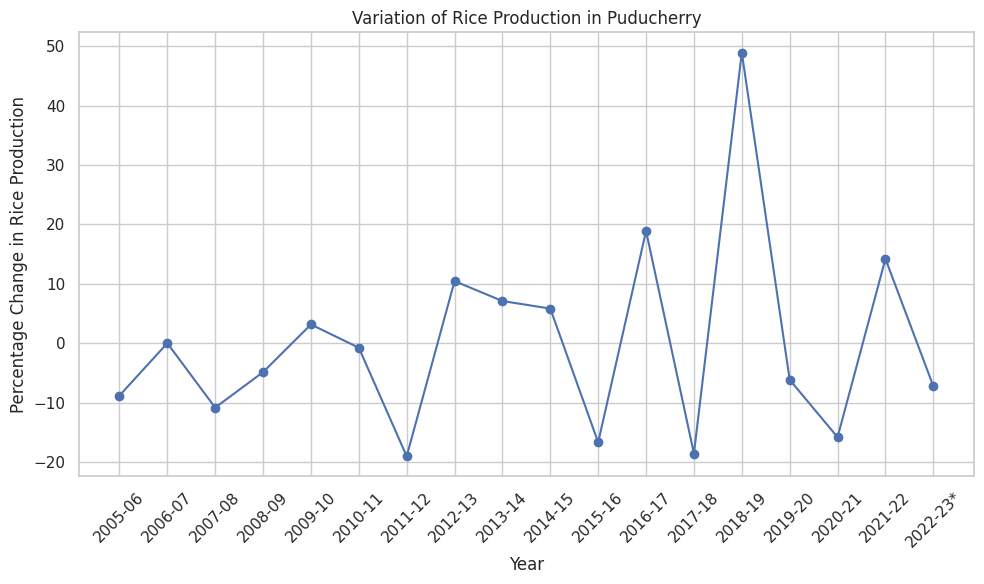

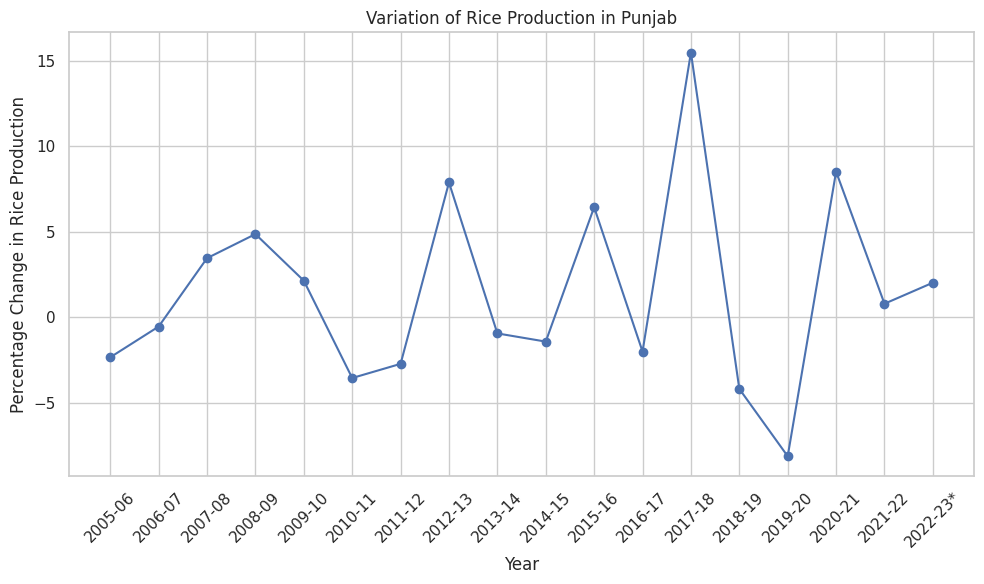

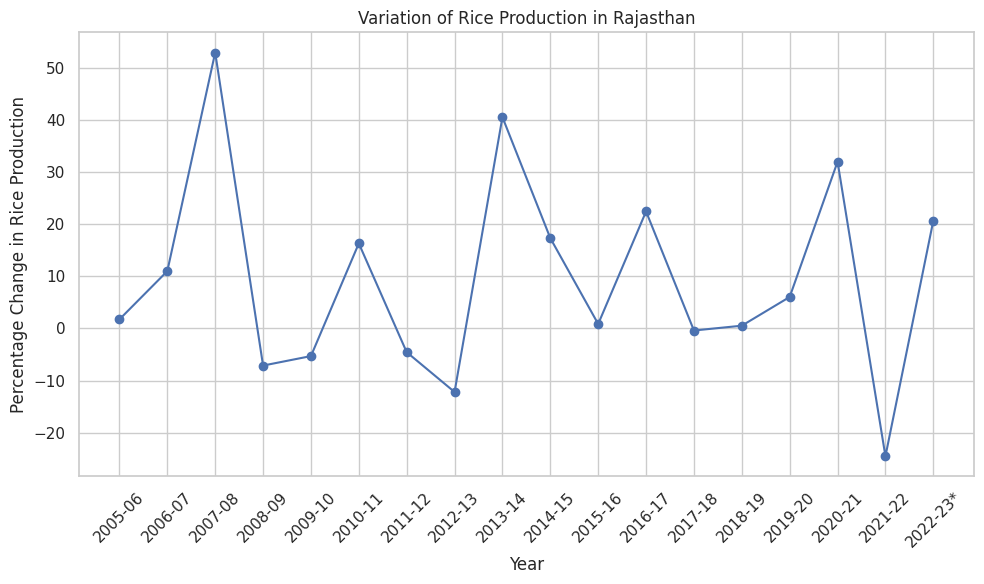

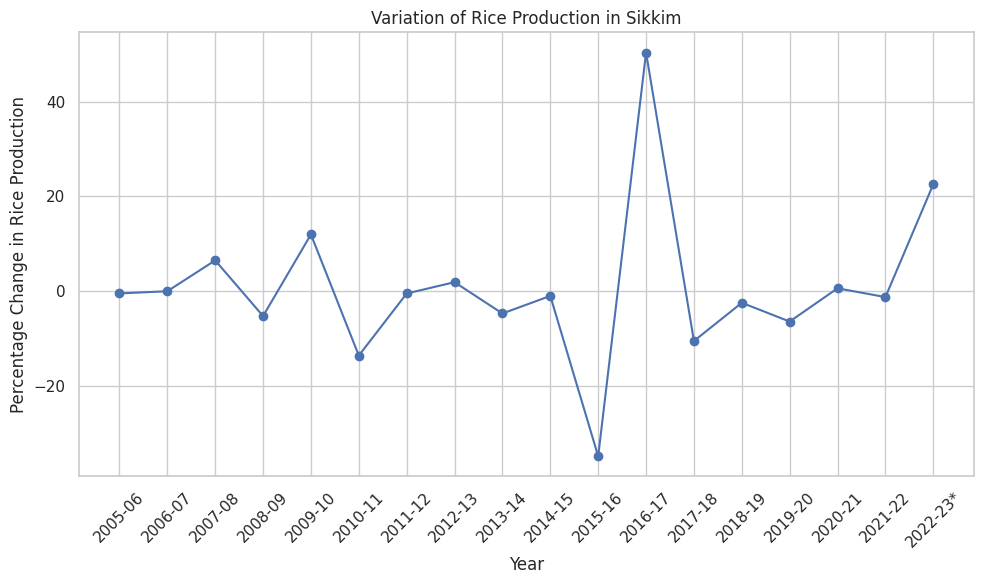

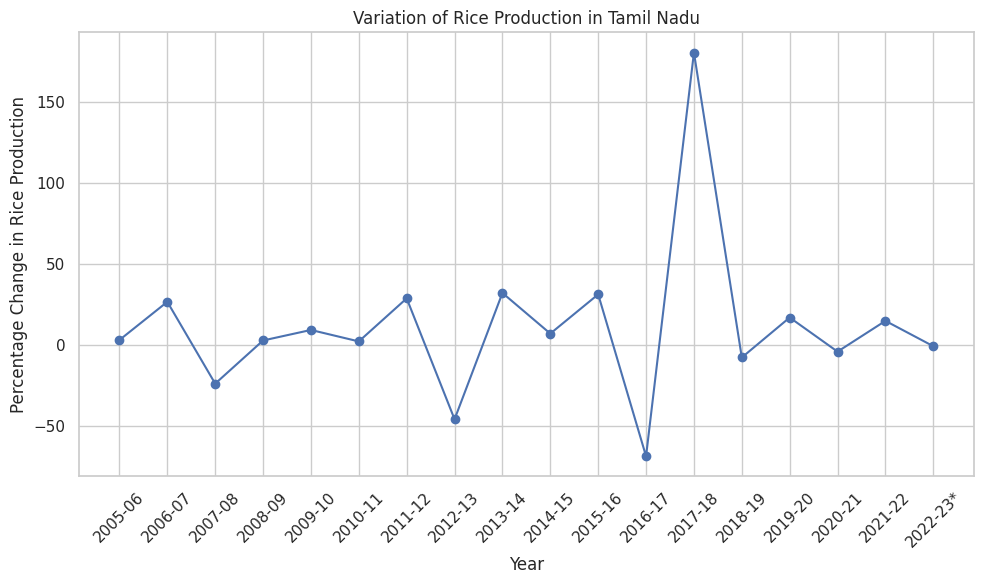

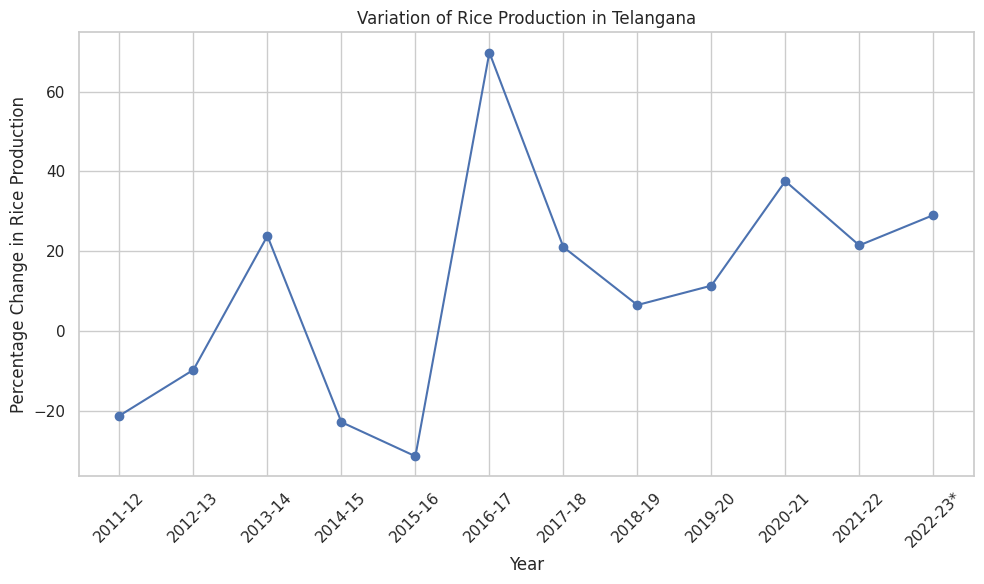

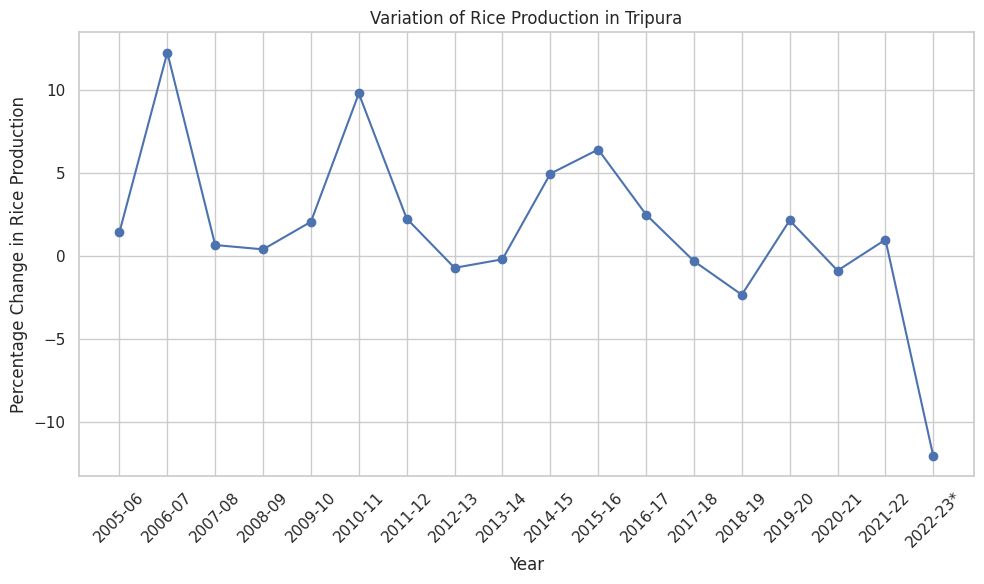

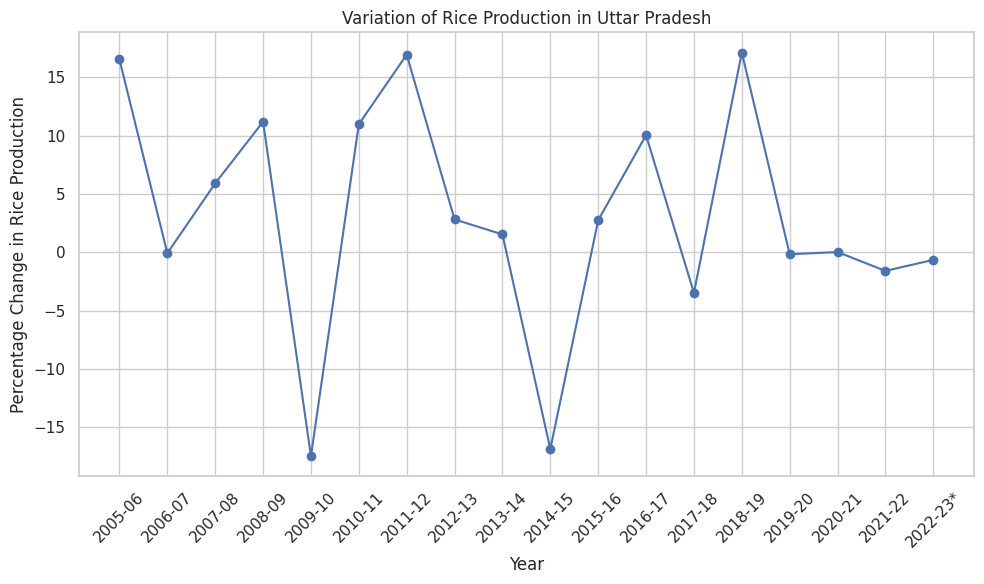

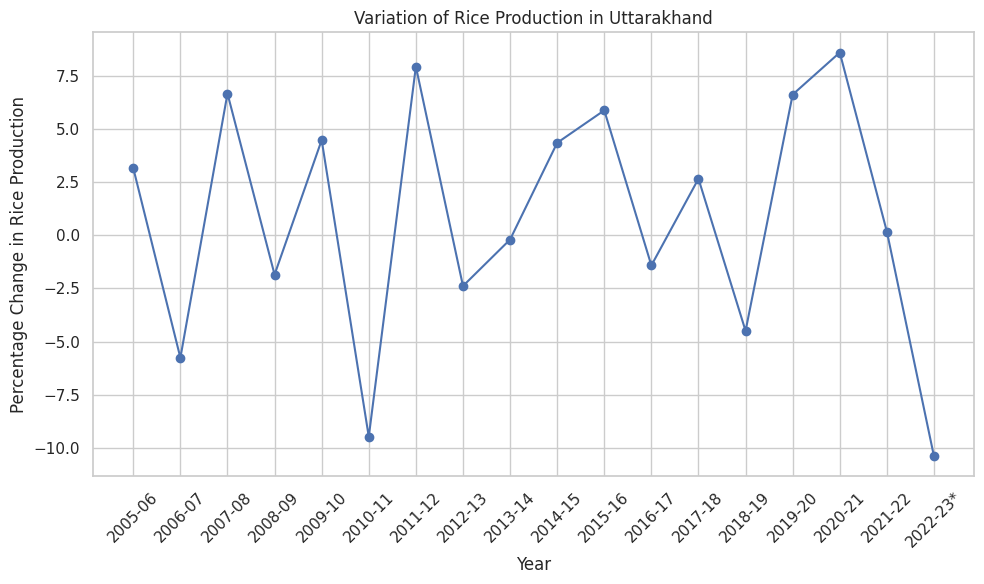

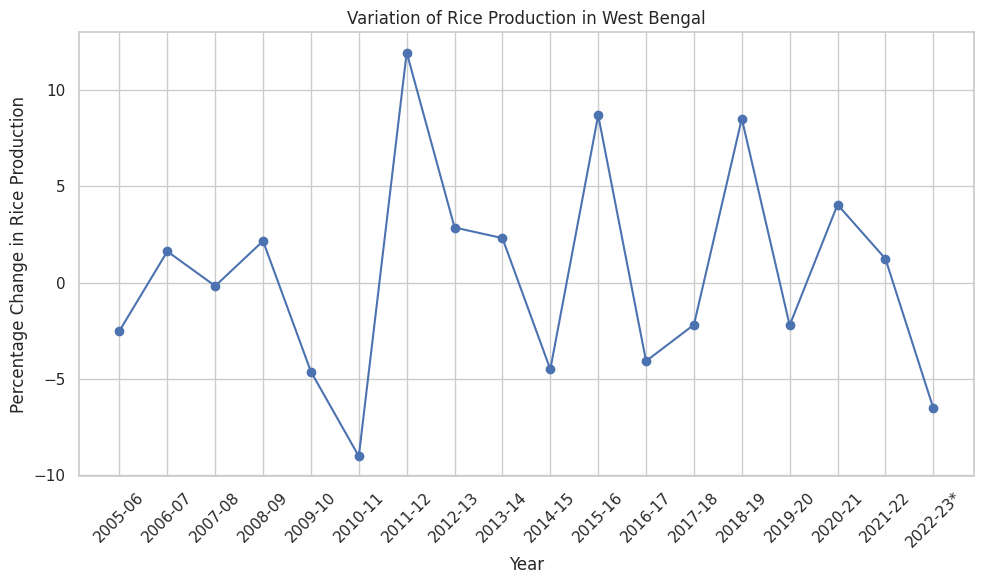

In [415]:
import pandas as pd
import matplotlib.pyplot as plt


# Set the index of the DataFrame to 'State/Union Territory'
df_cleaned.set_index('State/Union Territory', inplace=True)

# Calculate the percentage change in rice production for each year
percentage_change_df = df_cleaned.pct_change(axis=1) * 100

# Plot line graphs for each state
for state in df_cleaned.index:
    plt.figure(figsize=(10, 6))
    plt.plot(df_cleaned.columns, percentage_change_df.loc[state], marker='o', linestyle='-')
    plt.title(f'Variation of Rice Production in {state}')
    plt.xlabel('Year')
    plt.ylabel('Percentage Change in Rice Production')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [417]:
df_cleaned = df_cleaned.reset_index()
df_cleaned.head()

State/Union Territory  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  \
0        Andhra Pradesh  9601.00 11704.00 11872.00 13324.00 14241.00 10538.00   
1     Arunachal Pradesh   135.00   146.20   146.20   158.10   163.90   215.80   
2                 Assam  3470.70  3552.50  2916.00  3319.00  4008.50  4335.90   
3                 Bihar  2472.20  3495.50  4989.30  4418.10  5590.30  3599.30   
4          Chhattisgarh  4383.30  5011.60  5041.40  5426.60  4391.80  4110.40   

   2010-11  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  2017-18  \
0  7882.40  7746.20  6862.40  6969.70  7233.90  7488.70  7452.40  8166.20   
1   234.00   255.00   263.00   276.20   285.00   204.00   220.00   233.30   
2  4736.60  4516.30  5128.50  4927.10  5222.70  5125.10  4727.40  5283.70   
3  3102.10  7162.60  7529.30  5505.80  6356.70  6802.20  8239.30  8093.10   
4  6159.00  6028.40  6608.80  6716.40  6322.10  5789.40  8048.40  4930.80   

   2018-19  2019-20  2020-21  2021-22  2022-23*  
0  8234.70  8658.90  7882.90  7763.60   8542.30  
1   240.00   244.70   247.10   252.40    217.77  
2  5220.60  4984.60  5214.80  4382.10   4979.80  
3  6155.50  6298.00  6747.00  7717.00   6725.20  
4  6526.90  6774.80  7161.20  8021.70   8238.30

**Finding out which provinces need to improve rice production**

In [418]:
# # Calculate the average production rate for all provinces
avg_production_rate_all = df_cleaned.drop(columns=['State/Union Territory']).mean().mean()

# Calculate the average production rate for each province
avg_production_rate_per_province = df_cleaned.drop(columns=['State/Union Territory']).mean(axis=1)

# Identify provinces with below-average production rate
below_avg_provinces = df_cleaned[df_cleaned.drop(columns=['State/Union Territory']).mean(axis=1) < avg_production_rate_all]

# Output provinces needing improvement along with their average production rate
print("Provinces needing improvement in rice production:")
for index, row in below_avg_provinces.iterrows():
    print(f"{row['State/Union Territory']}: Average Production Rate = {avg_production_rate_per_province[index]:.2f} million metric tonnes")


Provinces needing improvement in rice production:
Arunachal Pradesh: Average Production Rate = 217.77 million metric tonnes
NCT of Delhi: Average Production Rate = 21.66 million metric tonnes
Goa: Average Production Rate = 115.17 million metric tonnes
Gujarat: Average Production Rate = 1702.62 million metric tonnes
Himachal Pradesh: Average Production Rate = 126.96 million metric tonnes
Jammu & Kashmir: Average Production Rate = 568.46 million metric tonnes
Jharkhand: Average Production Rate = 2729.88 million metric tonnes
Kerala: Average Production Rate = 563.69 million metric tonnes
Madhya Pradesh: Average Production Rate = 3146.14 million metric tonnes
Maharashtra: Average Production Rate = 2891.92 million metric tonnes
Manipur: Average Production Rate = 431.54 million metric tonnes
Meghalaya: Average Production Rate = 238.41 million metric tonnes
Mizoram: Average Production Rate = 56.49 million metric tonnes
Nagaland: Average Production Rate = 331.02 million metric tonnes
Puducherr

In [419]:
df_cleaned_new = df_cleaned.drop("2022-23*",axis=1)

**Obtaining rainfall dataset and variation of rainfall and rice production for each state and union territory**

In [420]:
rainfall_df = pd.read_csv("/kaggle/input/updated-india-rainfall/rain-india-updated.csv")

In [421]:
rainfall_df.columns

Index(['State/Union Territory', '2004-05', '2005-06', '2006-07', '2007-08',
       '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14',
       '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20',
       '2020-21', '2021-22'],
      dtype='object')

In [422]:
import pandas as pd

# Merge the datasets using common keys such as state/union territory and year
merged_df = pd.merge(df_cleaned_new, rainfall_df, on='State/Union Territory', how='inner')

merged_df.head()

merged_df.columns

Index(['State/Union Territory', '2004-05_x', '2005-06_x', '2006-07_x',
       '2007-08_x', '2008-09_x', '2009-10_x', '2010-11_x', '2011-12_x',
       '2012-13_x', '2013-14_x', '2014-15_x', '2015-16_x', '2016-17_x',
       '2017-18_x', '2018-19_x', '2019-20_x', '2020-21_x', '2021-22_x',
       '2004-05_y', '2005-06_y', '2006-07_y', '2007-08_y', '2008-09_y',
       '2009-10_y', '2010-11_y', '2011-12_y', '2012-13_y', '2013-14_y',
       '2014-15_y', '2015-16_y', '2016-17_y', '2017-18_y', '2018-19_y',
       '2019-20_y', '2020-21_y', '2021-22_y'],
      dtype='object')

In [424]:
merged_df.head()

State/Union Territory  2004-05_x  2005-06_x  2006-07_x  2007-08_x  \
0        Andhra Pradesh    9601.00   11704.00   11872.00   13324.00   
1     Arunachal Pradesh     135.00     146.20     146.20     158.10   
2                 Assam    3470.70    3552.50    2916.00    3319.00   
3                 Bihar    2472.20    3495.50    4989.30    4418.10   
4          Chhattisgarh    4383.30    5011.60    5041.40    5426.60   

   2008-09_x  2009-10_x  2010-11_x  2011-12_x  2012-13_x  2013-14_x  \
0   14241.00   10538.00    7882.40    7746.20    6862.40    6969.70   
1     163.90     215.80     234.00     255.00     263.00     276.20   
2    4008.50    4335.90    4736.60    4516.30    5128.50    4927.10   
3    5590.30    3599.30    3102.10    7162.60    7529.30    5505.80   
4    4391.80    4110.40    6159.00    6028.40    6608.80    6716.40   

   2014-15_x  2015-16_x  2016-17_x  2017-18_x  2018-19_x  2019-20_x  \
0    7233.90    7488.70    7452.40    8166.20    8234.70    8658.90   
1     285.00     204.00     220.00     233.30     240.00     244.70   
2    5222.70    5125.10    4727.40    5283.70    5220.60    4984.60   
3    6356.70    6802.20    8239.30    8093.10    6155.50    6298.00   
4    6322.10    5789.40    8048.40    4930.80    6526.90    6774.80   

   2020-21_x  2021-22_x  2004-05_y  2005-06_y  2006-07_y  2007-08_y  \
0    7882.90    7763.60     873.80    1221.60    1159.60    1099.40   
1     247.10     252.40    2545.80    2335.50    2259.40    3020.60   
2    5214.80    4382.10    2994.20    2468.20    1898.70    2752.70   
3    6747.00    7717.00    1147.60     907.80    1052.80    1600.10   
4    7161.20    8021.70    1144.70    1287.30    1317.80    1281.20   

   2008-09_y  2009-10_y  2010-11_y  2011-12_y  2012-13_y  2013-14_y  \
0    1107.50     790.50    1712.50     861.80    1318.30    1120.40   
1    2244.50    1750.00    2855.60    2193.60    3440.50    2042.90   
2    2339.60    2068.20    2711.40    1743.50    2609.40    1816.50   
3    1197.60     889.50     629.20    1097.30    1032.40    1069.80   
4    1108.60     956.70    1306.60    1302.60    1377.40    1420.00   

   2014-15_y  2015-16_y  2016-17_y  2017-18_y  2018-19_y  2019-20_y  \
0     875.10    1011.00     909.00     892.70     663.80     899.20   
1    2403.10    2767.50    2706.80    2745.50    2032.50    2433.30   
2    2206.20    2471.00    2266.70    2711.60    1807.10    2084.70   
3    1061.00     872.70    1158.00    1112.00     860.60    1194.70   
4    1278.60    1117.70    1315.90    1124.50    1211.90    1420.30   

   2020-21_y  2021-22_y  
0     738.20    1148.90  
1    1943.70    2083.80  
2    1651.10    2083.80  
3    1272.50    1512.70  
4    1234.30    1309.60

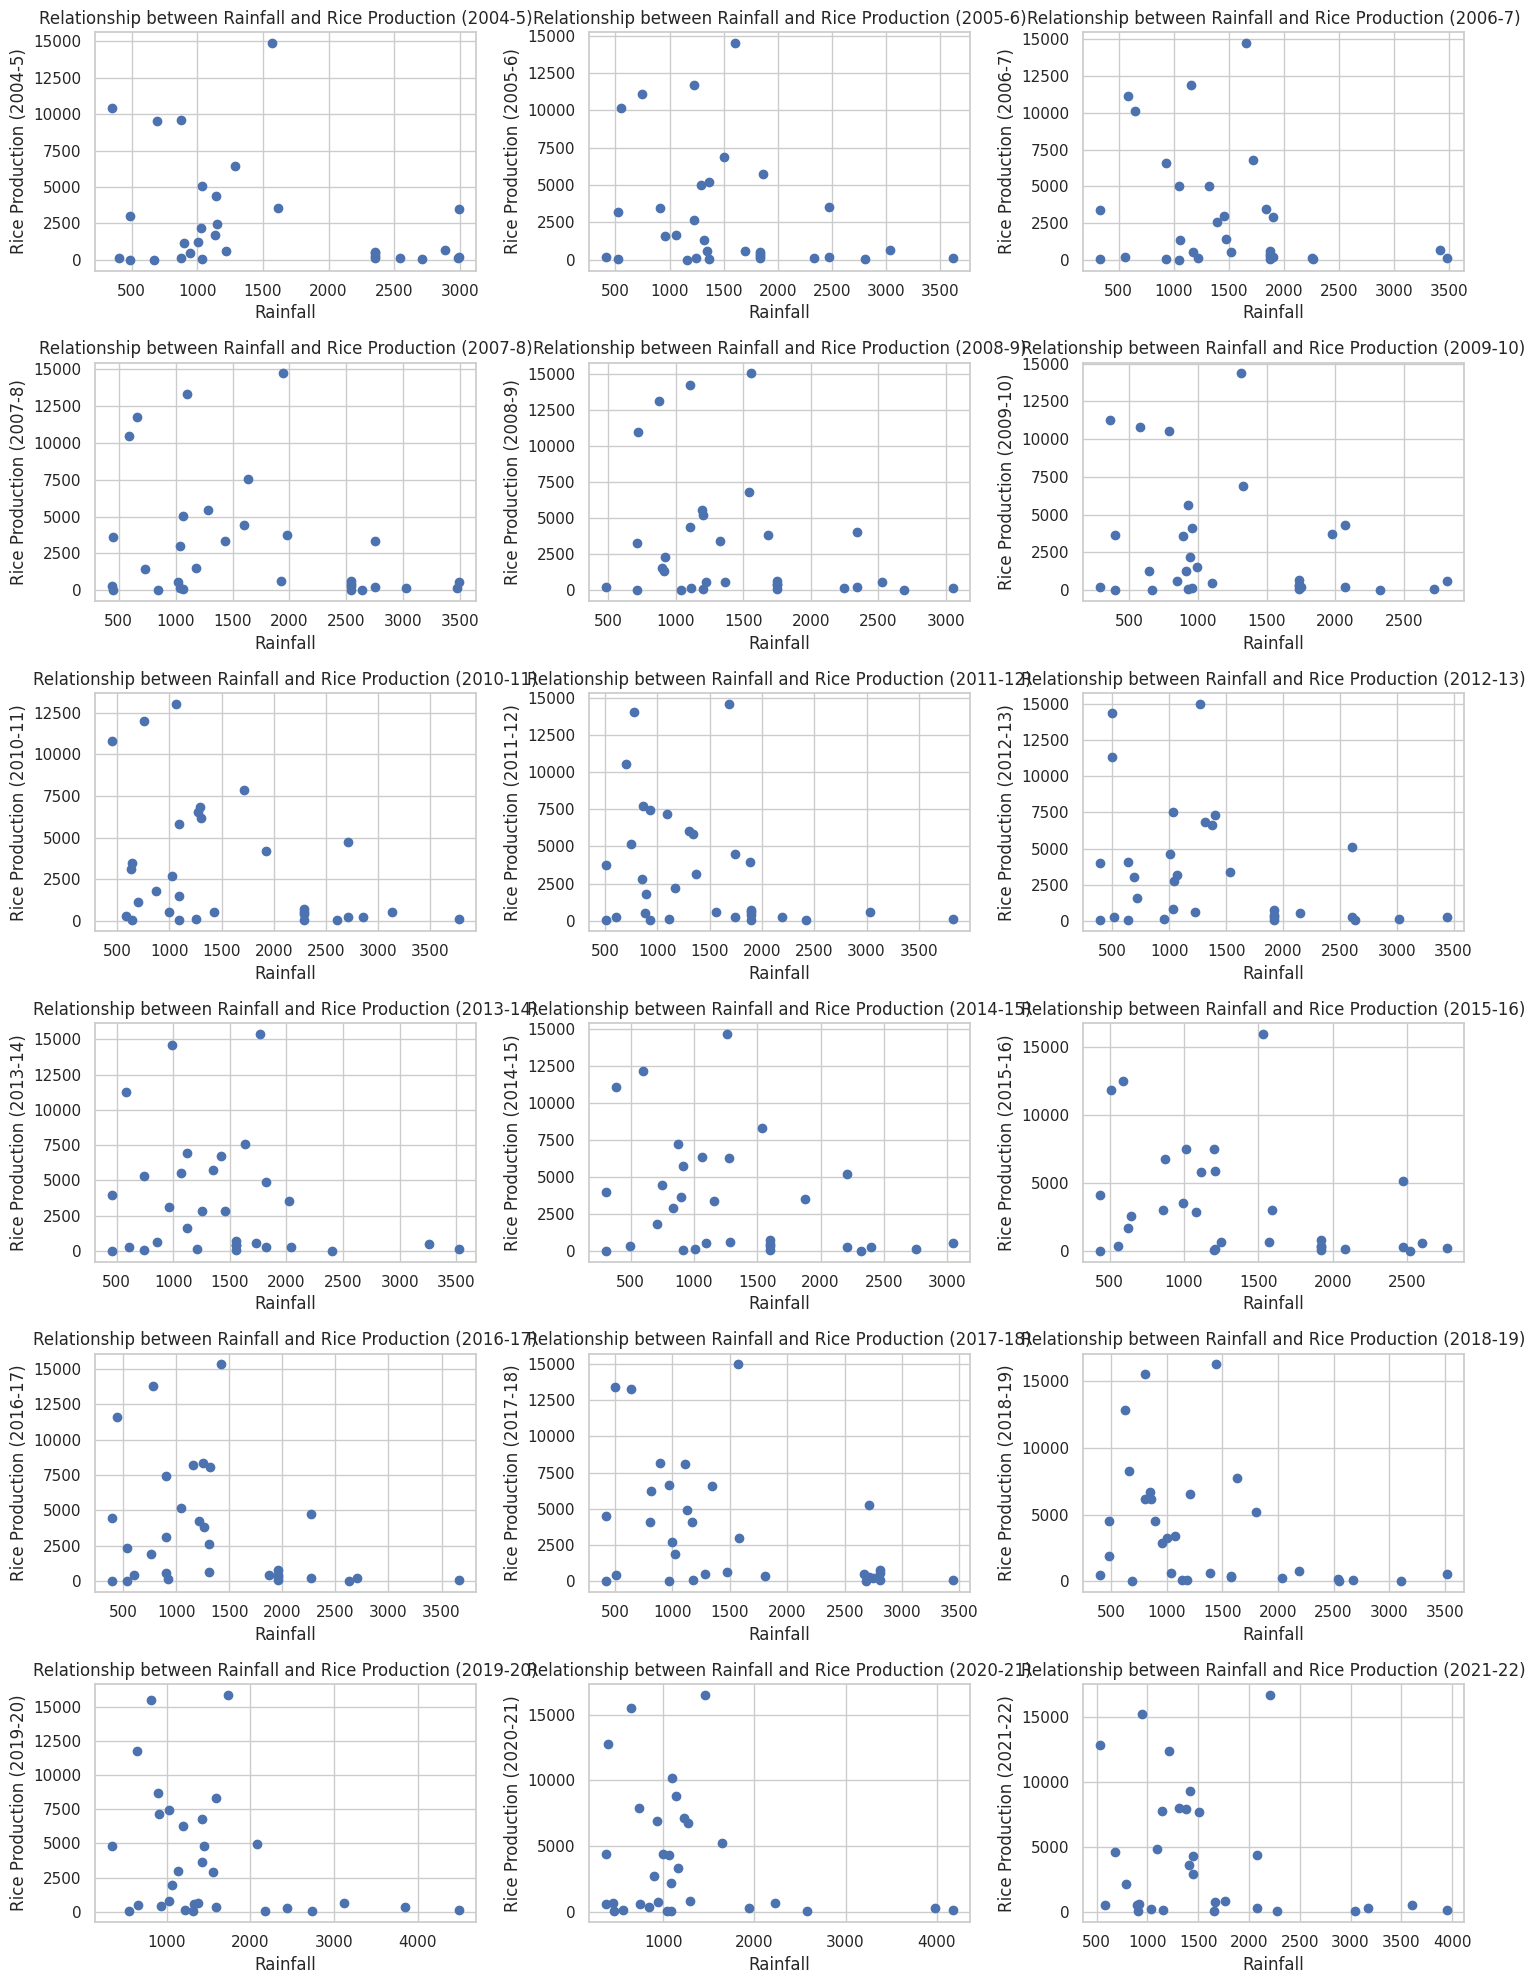

In [428]:
for year in range(2004, 2022):  
    year_col_rice = f'{year}-{"{:02d}".format((year+1)%100)}_x'  # Rice production column
    year_col_rainfall = f'{year}-{"{:02d}".format((year+1)%100)}_y'  # Rainfall column
    

# Plot scatter plots to visualize the relationship for each year
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

axes = axes.flatten()

for i, year in enumerate(range(2004, 2022)):
    year_col_rice = f'{year}-{"{:02d}".format((year+1)%100)}_x'  # Rice production column
    year_col_rainfall = f'{year}-{"{:02d}".format((year+1)%100)}_y'  # Rainfall column
    ax = axes[i]
    ax.scatter(merged_df[year_col_rainfall], merged_df[year_col_rice])
    ax.set_xlabel('Rainfall')
    ax.set_ylabel(f'Rice Production ({year}-{(year+1)%100})')
    ax.set_title(f'Relationship between Rainfall and Rice Production ({year}-{(year+1)%100})')

plt.tight_layout()
plt.show()


# **Prediction of Rice Production for next 5 years**

In [445]:
production_data = df_cleaned

In [446]:
production_data.head()

2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  \
State/Union Territory                                                         
Andhra Pradesh         9601.00 11704.00 11872.00 13324.00 14241.00 10538.00   
Arunachal Pradesh       135.00   146.20   146.20   158.10   163.90   215.80   
Assam                  3470.70  3552.50  2916.00  3319.00  4008.50  4335.90   
Bihar                  2472.20  3495.50  4989.30  4418.10  5590.30  3599.30   
Chhattisgarh           4383.30  5011.60  5041.40  5426.60  4391.80  4110.40   

                       2010-11  2011-12  2012-13  2013-14  2014-15  2015-16  \
State/Union Territory                                                         
Andhra Pradesh         7882.40  7746.20  6862.40  6969.70  7233.90  7488.70   
Arunachal Pradesh       234.00   255.00   263.00   276.20   285.00   204.00   
Assam                  4736.60  4516.30  5128.50  4927.10  5222.70  5125.10   
Bihar                  3102.10  7162.60  7529.30  5505.80  6356.70  6802.20   
Chhattisgarh           6159.00  6028.40  6608.80  6716.40  6322.10  5789.40   

                       2016-17  2017-18  2018-19  2019-20  2020-21  2021-22  \
State/Union Territory                                                         
Andhra Pradesh         7452.40  8166.20  8234.70  8658.90  7882.90  7763.60   
Arunachal Pradesh       220.00   233.30   240.00   244.70   247.10   252.40   
Assam                  4727.40  5283.70  5220.60  4984.60  5214.80  4382.10   
Bihar                  8239.30  8093.10  6155.50  6298.00  6747.00  7717.00   
Chhattisgarh           8048.40  4930.80  6526.90  6774.80  7161.20  8021.70   

                       2022-23*  
State/Union Territory            
Andhra Pradesh          8542.30  
Arunachal Pradesh        217.77  
Assam                   4979.80  
Bihar                   6725.20  
Chhattisgarh            8238.30

**Analyzing AIC and BIC values for the ARIMA model**

In [437]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Initialize lists to store results
orders = [(1, 1, 0), (2, 1, 0), (3, 1, 0), (4, 1, 0), (5, 1, 0)]
aics = []
bics = []

# Iterate over each column
for column in production_data.columns:
    # Get the data for the current column
    data = production_data[column]

    # Iterate over each order
    for order in orders:
        try:
            # Fit ARIMA model
            model = ARIMA(data, order=order)
            model_fit = model.fit()

            # Append AIC and BIC values to the lists
            aics.append(model_fit.aic)
            bics.append(model_fit.bic)
        except:
            # Skip if there's an error (e.g., insufficient data)
            continue

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    
    'AIC': aics,
    'BIC': bics
})

results_df


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


AIC    BIC
0  581.71 584.51
1  578.45 582.65
2  580.45 586.05
3  582.46 589.46
4  583.30 591.70
5  586.65 589.45
6  582.80 587.00
7  584.80 590.41
8  586.81 593.81
9  588.06 596.47
10 589.04 591.84
11 582.49 586.70
12 584.46 590.06
13 586.44 593.44
14 588.24 596.65
15 589.73 592.53
16 585.58 589.78
17 587.50 593.10
18 589.49 596.50
19 591.04 599.45
20 591.64 594.44
21 586.60 590.81
22 588.61 594.21
23 590.44 597.44
24 591.52 599.93
25 585.29 588.09
26 580.76 584.96
27 582.77 588.37
28 584.81 591.81
29 585.11 593.52
30 581.40 584.21
31 579.17 583.37
32 579.02 584.63
33 581.03 588.03
34 581.87 590.28
35 590.12 592.93
36 585.67 589.87
37 586.53 592.14
38 588.47 595.47
39 589.62 598.03
40 589.71 592.52
41 589.44 593.64
42 590.77 596.37
43 592.69 599.70
44 591.66 600.06
45 588.38 591.18
46 587.00 591.20
47 588.13 593.74
48 590.14 597.15
49 589.81 598.22
50 588.04 590.84
51 586.29 590.50
52 587.73 593.34
53 589.56 596.56
54 589.24 597.65
55 591.66 594.46
56 587.30 591.50
57 589.04 594.65
58 590.91 597.92
59 591.47 599.88
60 592.65 595.45
61 593.46 597.66
62 593.90 599.51
63 595.77 602.78
64 594.89 603.30
65 594.54 597.35
66 591.39 595.60
67 591.92 597.53
68 593.84 600.85
69 593.84 602.24
70 593.93 596.73
71 592.04 596.25
72 592.96 598.56
73 595.00 602.01
74 594.32 602.72
75 594.18 596.98
76 591.54 595.75
77 592.18 597.79
78 594.17 601.17
79 593.79 602.20
80 596.35 599.15
81 595.37 599.58
82 594.87 600.48
83 596.77 603.77
84 596.48 604.88
85 601.15 603.95
86 600.39 604.59
87 598.50 604.11
88 600.18 607.18
89 599.89 608.30
90 604.91 607.71
91 605.07 609.27
92 602.00 607.61
93 603.70 610.71
94 601.36 609.77

**We find that (3,1,0) gives us the lowest AIC and BIC scores for all years across the dataset.**

In [447]:

from statsmodels.tsa.arima.model import ARIMA

# Initialize a dictionary to store forecasts for all states
forecasts = {}

# Iterate over each state
for state_name, state_data in production_data.iterrows():

    # Handle missing values (replace NaNs with mean)
    state_data = state_data.interpolate(method='linear')

    # Convert state data to numeric data type
    state_data = state_data.astype(float)

    # Fit ARIMA models
    model_1 = ARIMA(state_data, order=(3,1,0))  # Model with order (3,1,0)
   
    # Fit models
    model_fit_1 = model_1.fit()

    # Forecast next 5 years for each model
    forecast_1 = model_fit_1.forecast(steps=5)
    final_forecast = forecast_1

    # Store the forecast for the state
    forecasts[state_name] = final_forecast

# Print forecasts for all states
for state_name, forecast in forecasts.items():
    print(f"Forecast for {state_name} for the next 5 years:")
    print(forecast)



/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

Forecast for Andhra Pradesh for the next 5 years:
19   8756.61
20   8610.45
21   8662.91
22   8777.60
23   8782.21
Name: predicted_mean, dtype: float64
Forecast for Arunachal Pradesh for the next 5 years:
19   217.43
20   216.04
21   215.11
22   215.03
23   214.95
Name: predicted_mean, dtype: float64
Forecast for Assam for the next 5 years:
19   4840.99
20   4725.11
21   4874.40
22   4802.33
23   4802.35
Name: predicted_mean, dtype: float64
Forecast for Bihar for the next 5 years:
19   6422.65
20   6780.78
21   6964.17
22   6817.54
23   6722.70
Name: predicted_mean, dtype: float64
Forecast for Chhattisgarh for the next 5 years:
19   8173.97
20   8283.45
21   8264.05
22   8262.67
23   8274.94
Name: predicted_mean, dtype: float64
Forecast for NCT of Delhi for the next 5 years:
19   21.52
20   21.16
21   20.68
22   20.73
23   20.88
Name: predicted_mean, dtype: float64
Forecast for Goa for the next 5 years:
19   115.41
20   117.95
21   121.05
22   121.34
23   121.93
Name: predicted_mean, d

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

In [448]:
import pandas as pd

# Initialize a dictionary to store forecasts for all states
forecasts_dict = {}

for state_name, forecast in forecasts.items():
    state_forecast = {
        "State/Union territory": state_name,
        "2023-24": forecast.iloc[0],
        "2024-25": forecast.iloc[1],
        "2025-26": forecast.iloc[2],
        "2026-27": forecast.iloc[3],
        "2027-28": forecast.iloc[4]
    }
    forecasts_dict[state_name] = state_forecast

# Create a DataFrame from the forecasts dictionary
forecasts_df = pd.DataFrame.from_dict(forecasts_dict, orient='index')

forecasts_df = forecasts_df.drop("State/Union territory",axis=1)
forecasts_df = forecasts_df.reset_index()



In [449]:
forecasts_df

index  2023-24  2024-25  2025-26  2026-27  2027-28
0      Andhra Pradesh  8756.61  8610.45  8662.91  8777.60  8782.21
1   Arunachal Pradesh   217.43   216.04   215.11   215.03   214.95
2               Assam  4840.99  4725.11  4874.40  4802.33  4802.35
3               Bihar  6422.65  6780.78  6964.17  6817.54  6722.70
4        Chhattisgarh  8173.97  8283.45  8264.05  8262.67  8274.94
5        NCT of Delhi    21.52    21.16    20.68    20.73    20.88
6                 Goa   115.41   117.95   121.05   121.34   121.93
7             Gujarat  2378.02  2353.29  2420.76  2406.28  2399.50
8             Haryana  5118.19  5322.70  5607.73  5452.47  5593.84
9    Himachal Pradesh   142.50   135.28   154.07   132.05   142.48
10    Jammu & Kashmir   576.89   544.69   544.67   561.66   557.73
11          Jharkhand  1713.41  2112.68  2240.43  2018.97  1941.49
12          Karnataka  4133.99  4250.60  4124.28  4116.50  4190.19
13             Kerala   583.15   568.30   560.28   570.50   570.47
14     Madhya Pradesh  8173.71  8404.76  9323.07  9683.49  9831.94
15        Maharashtra  3729.62  3716.35  3652.42  3707.78  3693.68
16            Manipur   503.77   555.08   497.03   487.26   523.69
17          Meghalaya   278.71   258.88   276.52   260.77   272.26
18            Mizoram    57.18    59.85    59.98    58.34    57.95
19           Nagaland   263.54   274.65   276.01   275.08   274.98
20             Odisha  9603.50  9686.64  9681.14  9692.05  9693.90
21         Puducherry    54.53    54.01    54.29    54.12    54.19
22             Punjab 13183.82 13156.37 13182.38 13184.37 13178.32
23          Rajasthan   599.72   529.56   599.53   579.86   560.44
24             Sikkim    17.14    17.87    17.53    17.92    17.64
25         Tamil Nadu  7517.78  7385.69  7664.62  7652.34  7580.68
26          Telangana 17464.23 18586.63 19888.07 20567.01 21087.09
27            Tripura   690.59   678.39   685.57   689.34   692.13
28      Uttar Pradesh 15177.96 15162.15 15151.14 15151.73 15151.03
29        Uttarakhand   642.60   661.77   688.34   673.19   662.80
30        West Bengal 15799.51 15819.22 15795.53 15800.48 15800.91

In [451]:
forecasts_df.columns = ["State/Union Territory","2023-24","2024-25","2025-26","2026-27","2027-28"]
forecasts_df.set_index("State/Union Territory",inplace=True)

In [452]:
forecasts_df

2023-24  2024-25  2025-26  2026-27  2027-28
State/Union Territory                                             
Andhra Pradesh         8756.61  8610.45  8662.91  8777.60  8782.21
Arunachal Pradesh       217.43   216.04   215.11   215.03   214.95
Assam                  4840.99  4725.11  4874.40  4802.33  4802.35
Bihar                  6422.65  6780.78  6964.17  6817.54  6722.70
Chhattisgarh           8173.97  8283.45  8264.05  8262.67  8274.94
NCT of Delhi             21.52    21.16    20.68    20.73    20.88
Goa                     115.41   117.95   121.05   121.34   121.93
Gujarat                2378.02  2353.29  2420.76  2406.28  2399.50
Haryana                5118.19  5322.70  5607.73  5452.47  5593.84
Himachal Pradesh        142.50   135.28   154.07   132.05   142.48
Jammu & Kashmir         576.89   544.69   544.67   561.66   557.73
Jharkhand              1713.41  2112.68  2240.43  2018.97  1941.49
Karnataka              4133.99  4250.60  4124.28  4116.50  4190.19
Kerala                  583.15   568.30   560.28   570.50   570.47
Madhya Pradesh         8173.71  8404.76  9323.07  9683.49  9831.94
Maharashtra            3729.62  3716.35  3652.42  3707.78  3693.68
Manipur                 503.77   555.08   497.03   487.26   523.69
Meghalaya               278.71   258.88   276.52   260.77   272.26
Mizoram                  57.18    59.85    59.98    58.34    57.95
Nagaland                263.54   274.65   276.01   275.08   274.98
Odisha                 9603.50  9686.64  9681.14  9692.05  9693.90
Puducherry               54.53    54.01    54.29    54.12    54.19
Punjab                13183.82 13156.37 13182.38 13184.37 13178.32
Rajasthan               599.72   529.56   599.53   579.86   560.44
Sikkim                   17.14    17.87    17.53    17.92    17.64
Tamil Nadu             7517.78  7385.69  7664.62  7652.34  7580.68
Telangana             17464.23 18586.63 19888.07 20567.01 21087.09
Tripura                 690.59   678.39   685.57   689.34   692.13
Uttar Pradesh         15177.96 15162.15 15151.14 15151.73 15151.03
Uttarakhand             642.60   661.77   688.34   673.19   662.80
West Bengal           15799.51 15819.22 15795.53 15800.48 15800.91

In [455]:
# Merge df_cleaned and forecasts_df on the 'State/Union territory' column
combined_df = pd.merge(df_cleaned, forecasts_df, on='State/Union Territory', how='left')

combined_df


2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  \
State/Union Territory                                                         
Andhra Pradesh         9601.00 11704.00 11872.00 13324.00 14241.00 10538.00   
Arunachal Pradesh       135.00   146.20   146.20   158.10   163.90   215.80   
Assam                  3470.70  3552.50  2916.00  3319.00  4008.50  4335.90   
Bihar                  2472.20  3495.50  4989.30  4418.10  5590.30  3599.30   
Chhattisgarh           4383.30  5011.60  5041.40  5426.60  4391.80  4110.40   
NCT of Delhi             14.30    24.00    31.10    31.40    31.40    19.30   
Goa                     145.20   147.30   130.30   121.60   123.30   100.60   
Gujarat                1238.20  1298.00  1390.00  1474.00  1303.00  1292.00   
Haryana                3023.00  3210.00  3371.00  3613.00  3298.00  3625.00   
Himachal Pradesh        122.00   112.10   123.50   121.50   118.30   105.90   
Jammu & Kashmir         492.20   556.80   554.00   561.30   563.10   497.40   
Jharkhand              1677.00  1558.00  2967.80  3336.40  3420.20  1538.40   
Karnataka              3547.00  5744.00  3446.00  3717.00  3802.00  3691.00   
Kerala                  667.10   629.90   631.00   528.50   590.30   598.30   
Madhya Pradesh         1169.00  1656.30  1368.40  1461.90  1559.70  1260.60   
Maharashtra            2164.00  2695.00  2569.00  2996.00  2284.00  2183.00   
Manipur                 435.90   386.10   386.10   406.20   397.00   319.90   
Meghalaya               193.70   151.90   200.20   200.00   203.90   206.70   
Mizoram                 104.10    99.20    29.50    15.70    46.00    44.30   
Nagaland                259.80   263.10   263.50   290.60   345.10   240.30   
Odisha                 6466.00  6859.00  6824.70  7540.70  6812.70  6917.50   
Puducherry               65.70    59.90    59.90    53.40    50.80    52.40   
Punjab                10437.00 10193.00 10138.00 10489.00 11000.00 11236.00   
Rajasthan               150.40   153.00   169.80   259.60   241.10   228.30   
Sikkim                   21.60    21.50    21.50    22.90    21.70    24.30   
Tamil Nadu             5062.20  5220.00  6610.60  5040.20  5182.70  5665.20   
Telangana                 0.00     0.00     0.00     0.00     0.00     0.00   
Tripura                 545.10   552.90   620.50   624.60   627.10   640.00   
Uttar Pradesh          9555.60 11133.70 11124.00 11780.00 13097.00 10807.10   
Uttarakhand             572.00   590.00   556.00   593.00   582.00   608.00   
West Bengal           14884.80 14510.80 14745.90 14719.50 15037.30 14340.70   

                       2010-11  2011-12  2012-13  2013-14  2014-15  2015-16  \
State/Union Territory                                                         
Andhra Pradesh         7882.40  7746.20  6862.40  6969.70  7233.90  7488.70   
Arunachal Pradesh       234.00   255.00   263.00   276.20   285.00   204.00   
Assam                  4736.60  4516.30  5128.50  4927.10  5222.70  5125.10   
Bihar                  3102.10  7162.60  7529.30  5505.80  6356.70  6802.20   
Chhattisgarh           6159.00  6028.40  6608.80  6716.40  6322.10  5789.40   
NCT of Delhi             19.60    19.80    19.70    29.60    25.90    17.30   
Goa                     115.00   121.80   122.80   126.50   120.50   115.10   
Gujarat                1496.60  1790.00  1541.00  1636.00  1830.90  1702.00   
Haryana                3472.00  3759.00  3976.00  3998.00  4006.00  4145.00   
Himachal Pradesh        128.90   131.60   125.30   120.80   125.20   129.90   
Jammu & Kashmir         507.70   544.70   818.10   610.90   517.20   646.40   
Jharkhand              1110.00  3130.60  3164.90  2810.60  3361.90  2882.20   
Karnataka              4188.00  3955.00  3364.00  3572.60  3541.00  3021.00   
Kerala                  522.70   569.00   508.30   509.20   562.10   549.30   
Madhya Pradesh         1772.10  2227.30  2775.00  2844.80  3625.30  3546.70   
Maharashtra            2696.00  2841.00  3057.00  3120.00  2946.00  2593

**Plotting our predictions with given data in the dataset**

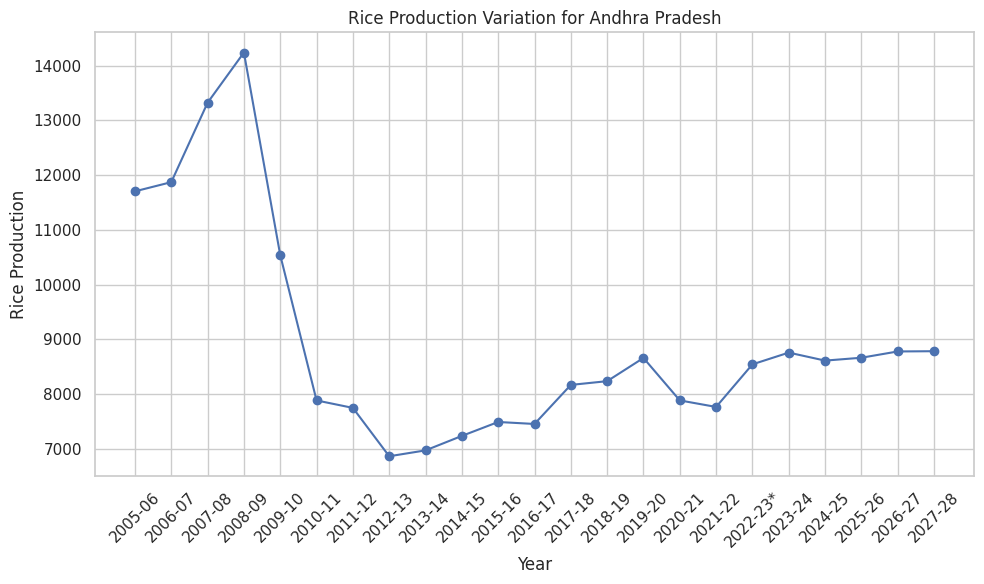

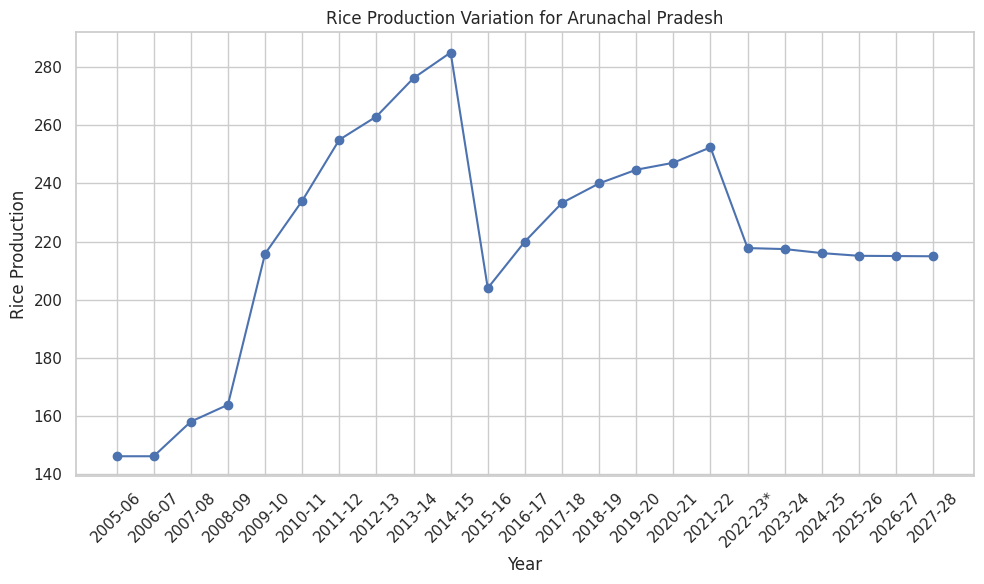

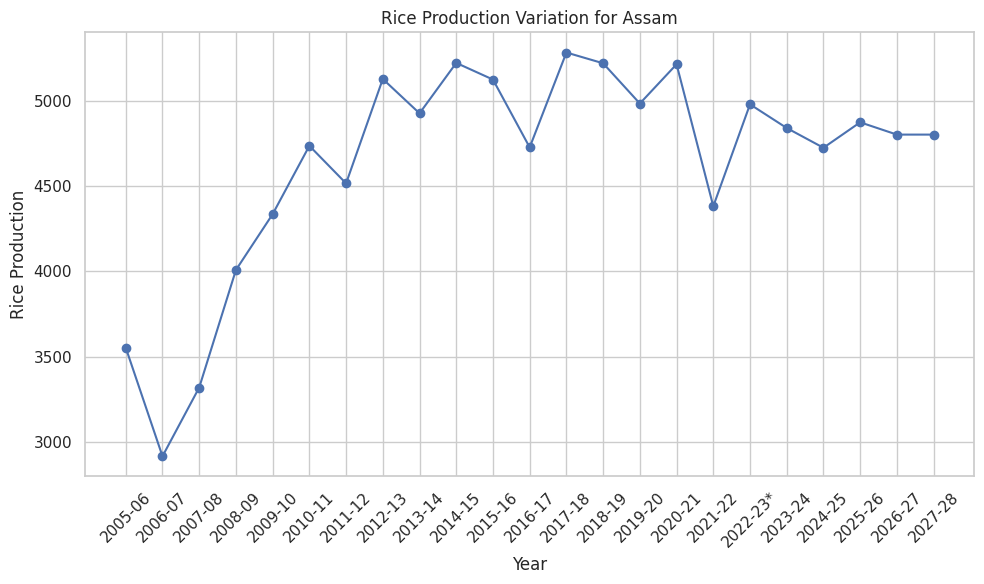

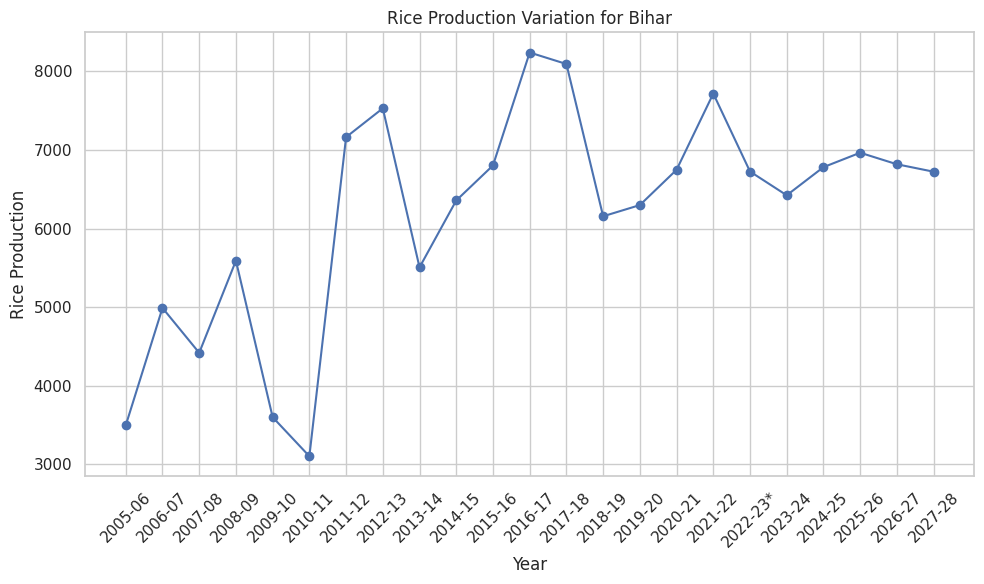

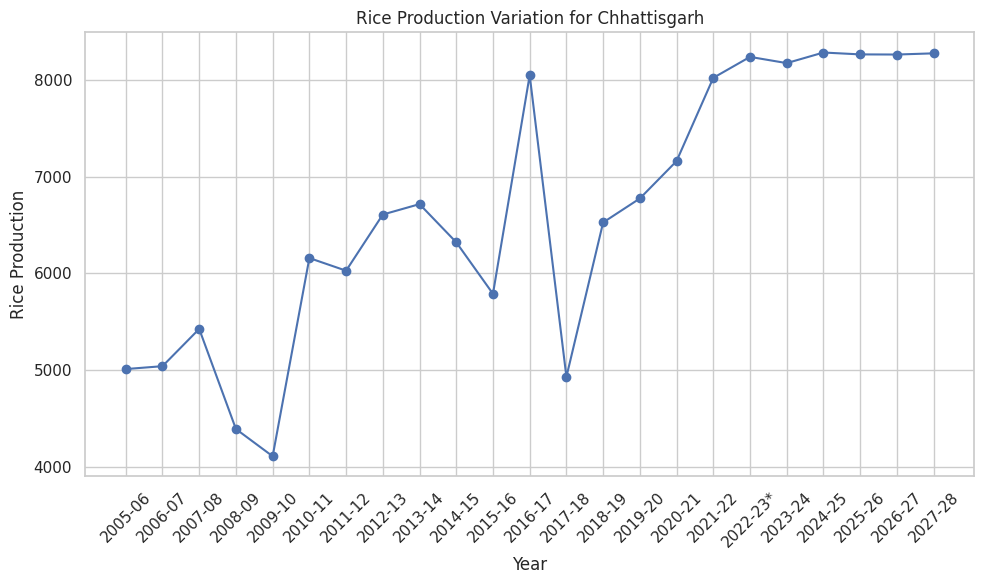

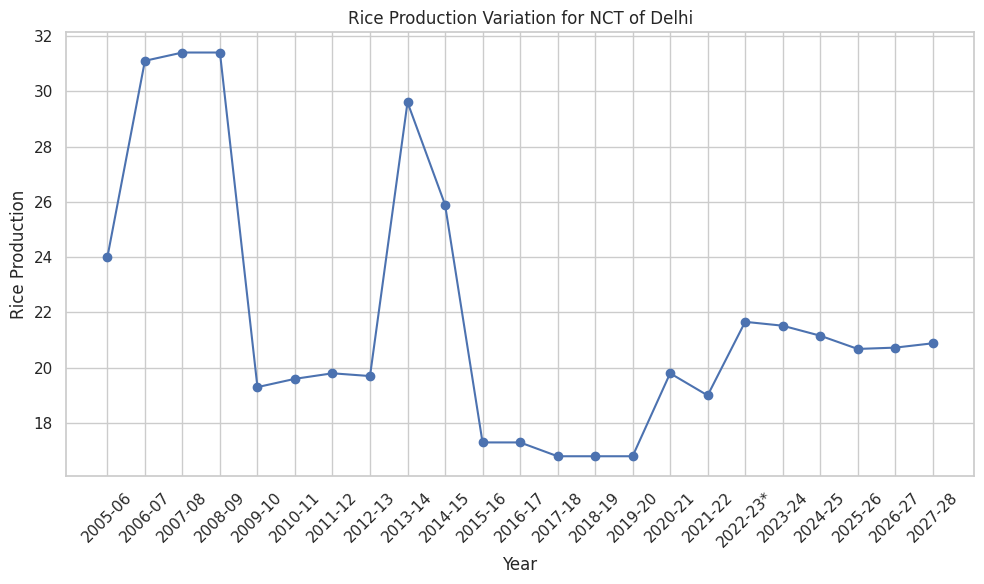

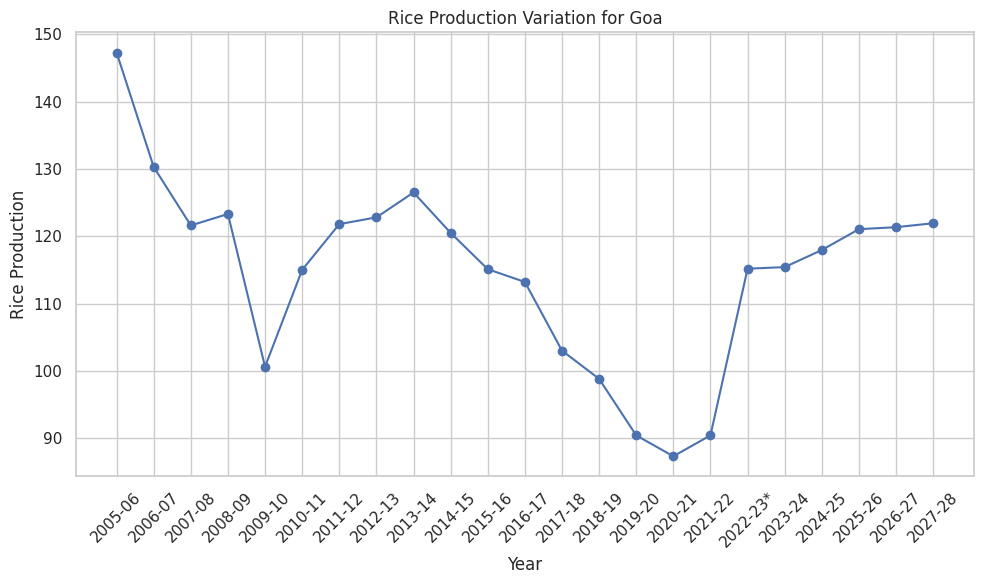

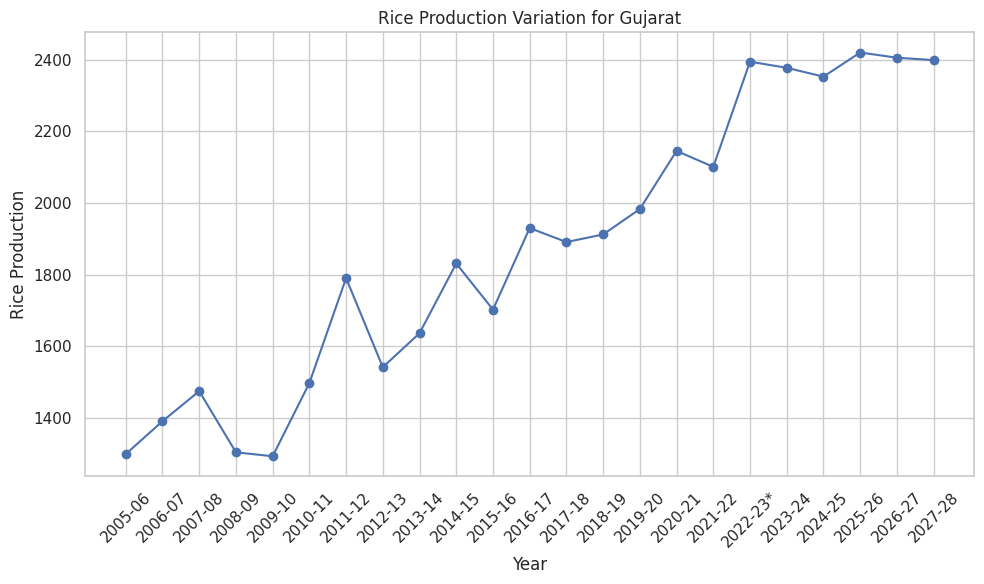

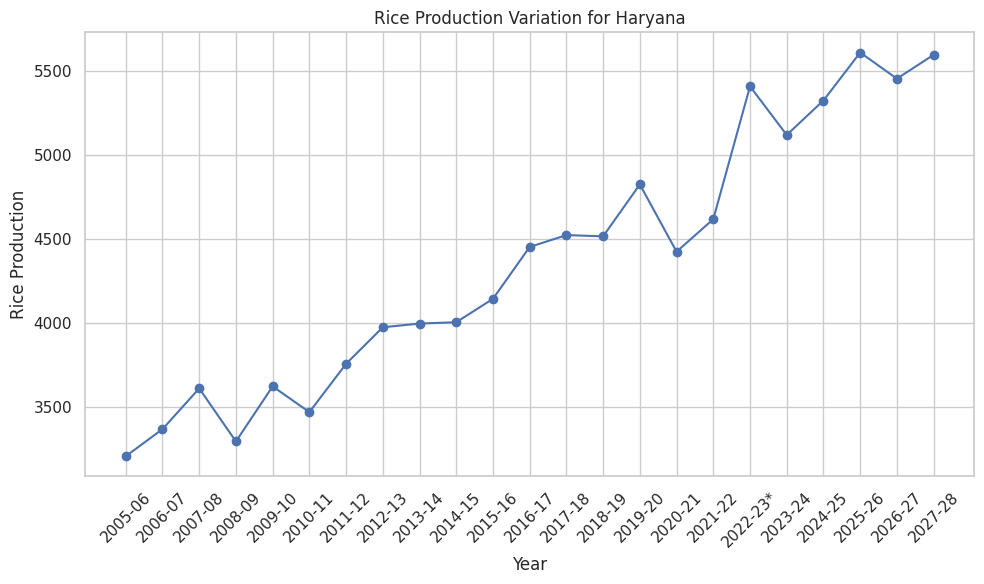

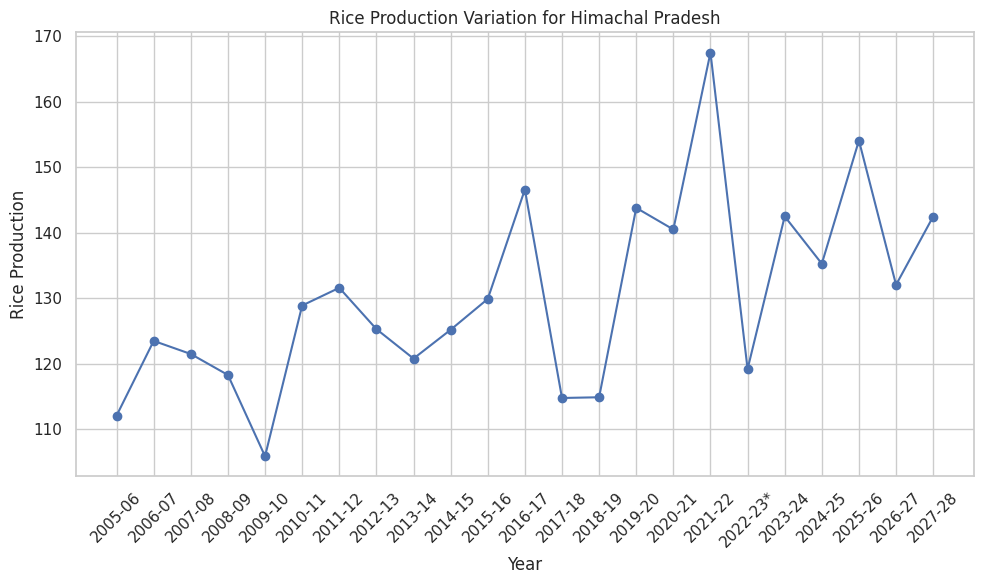

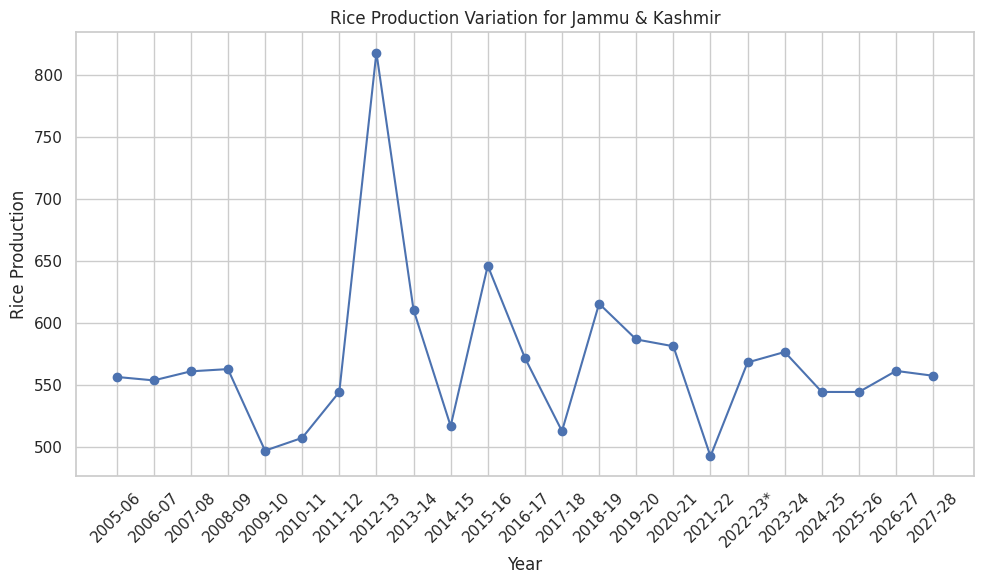

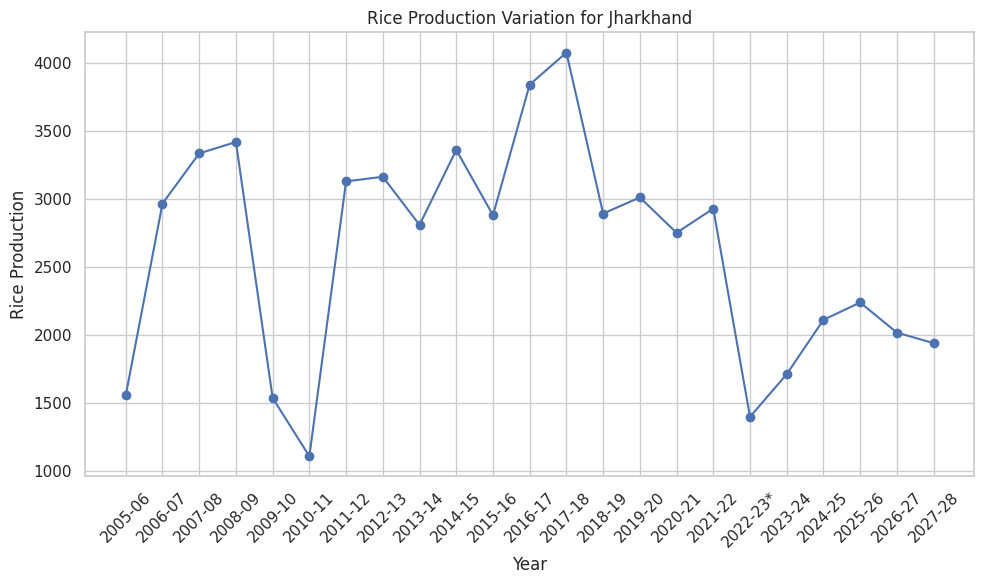

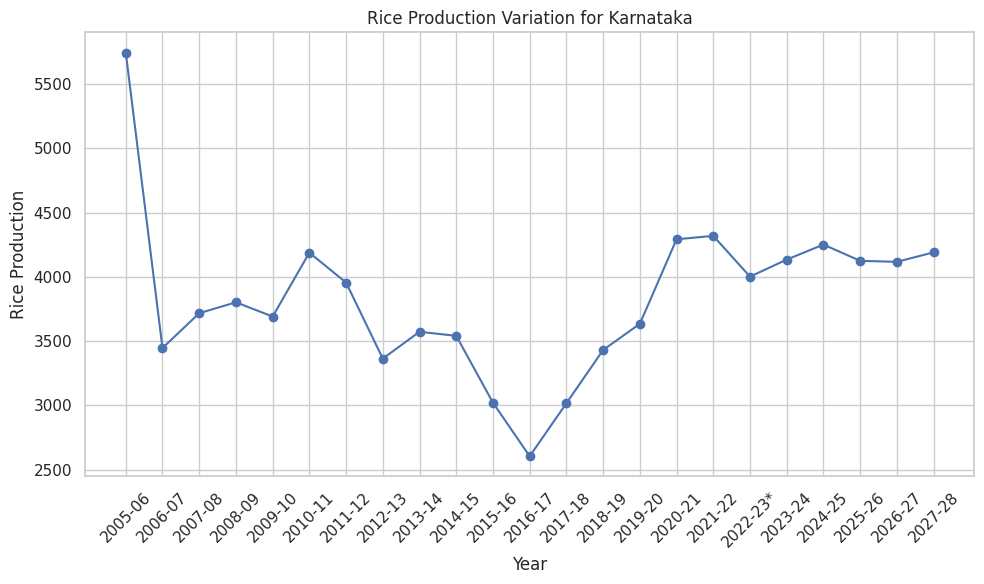

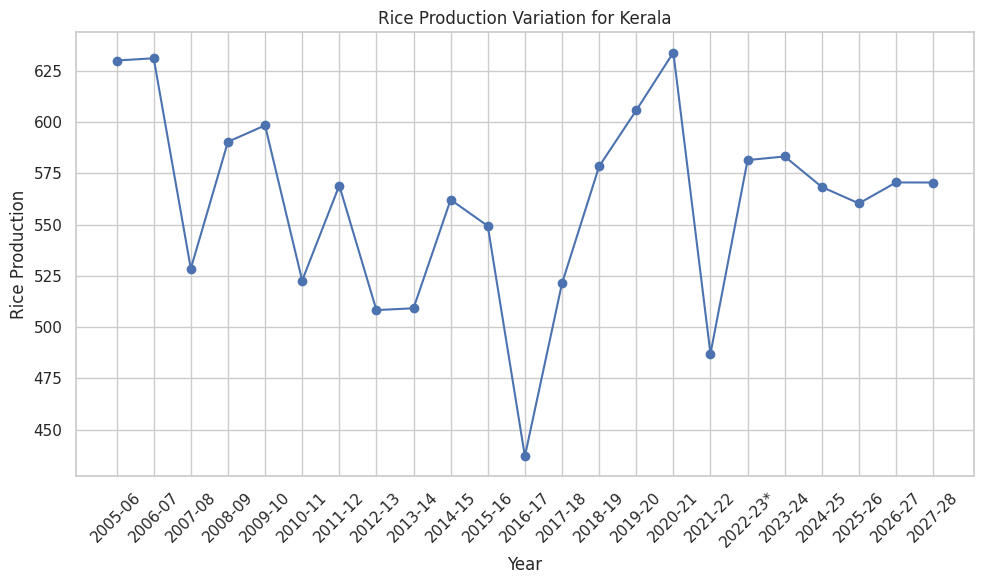

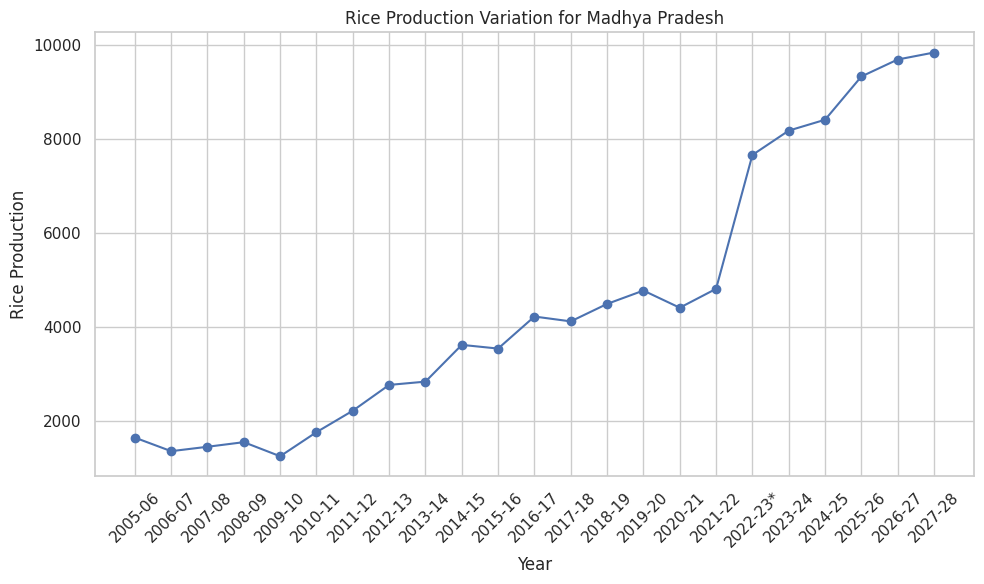

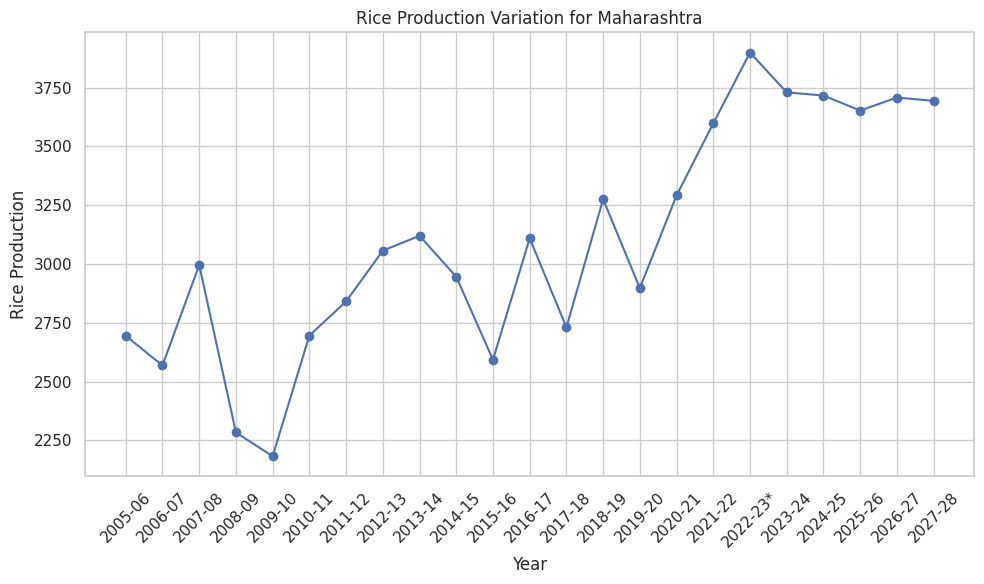

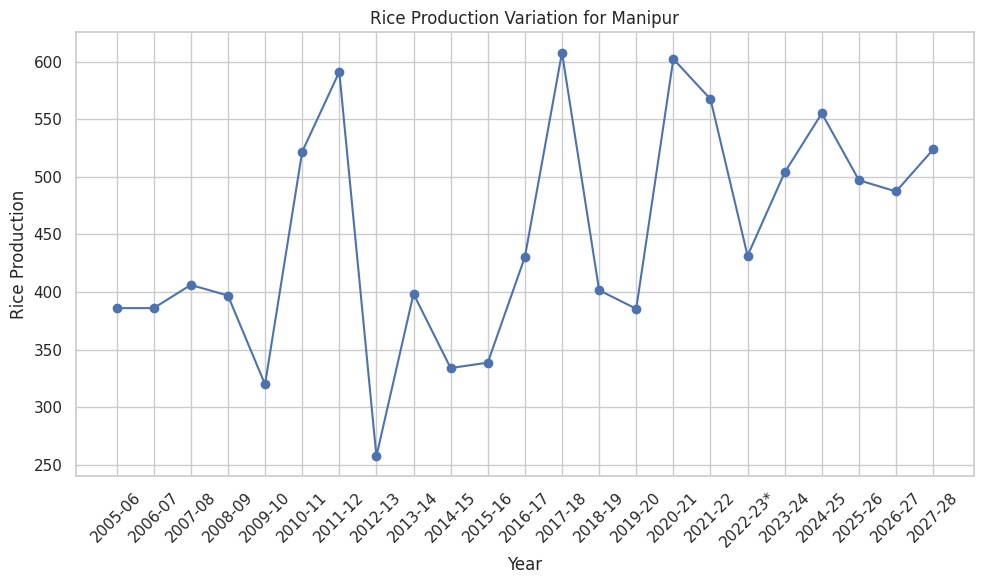

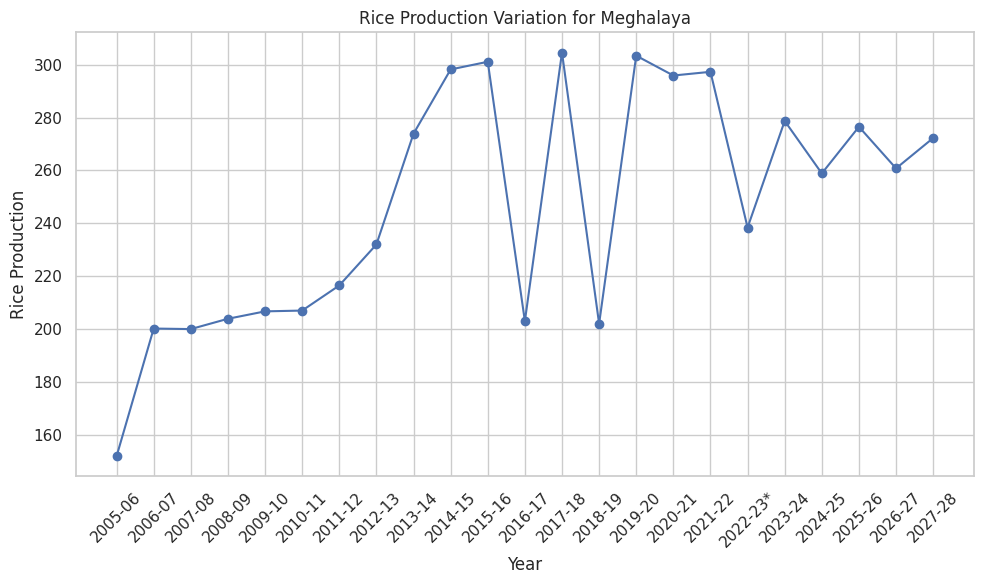

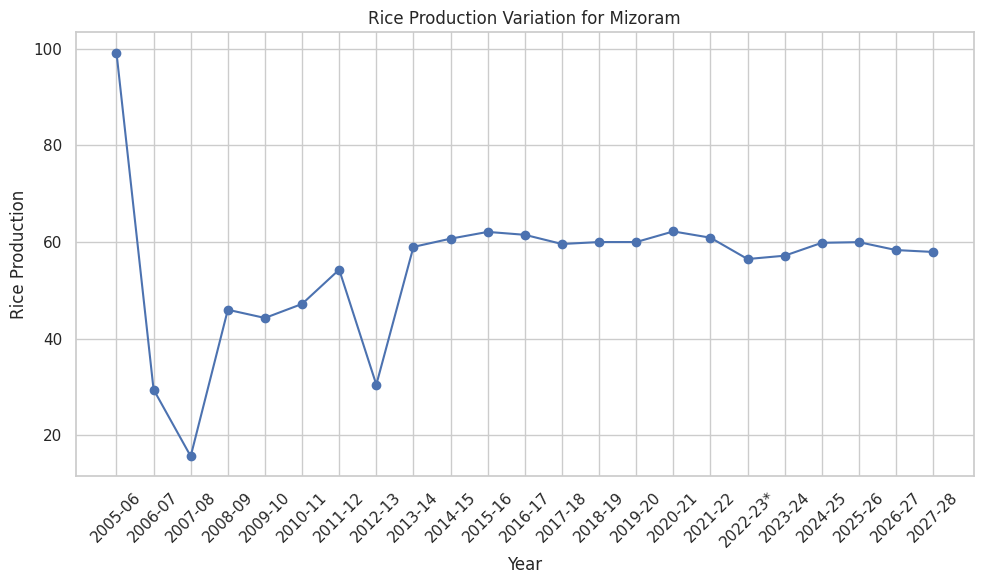

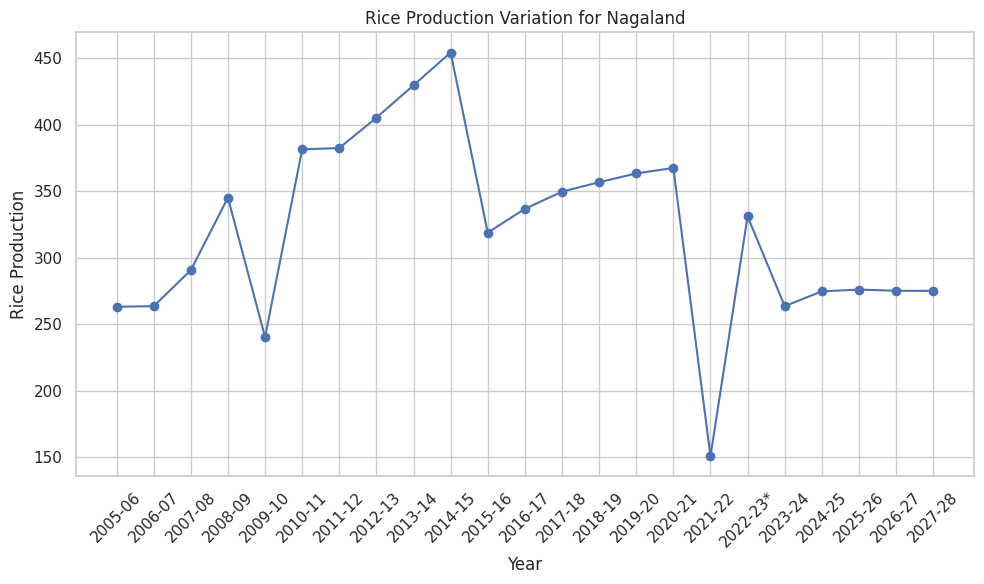

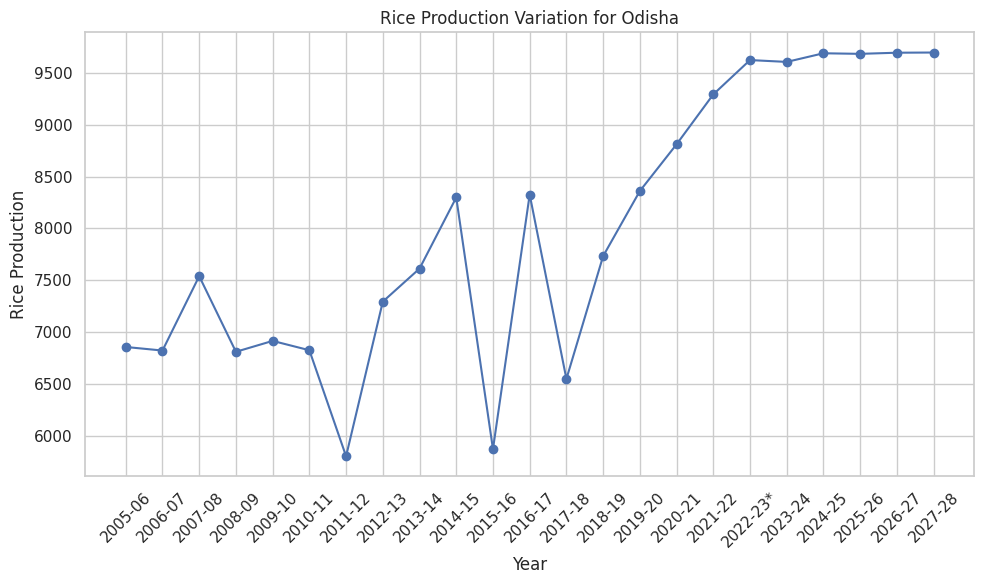

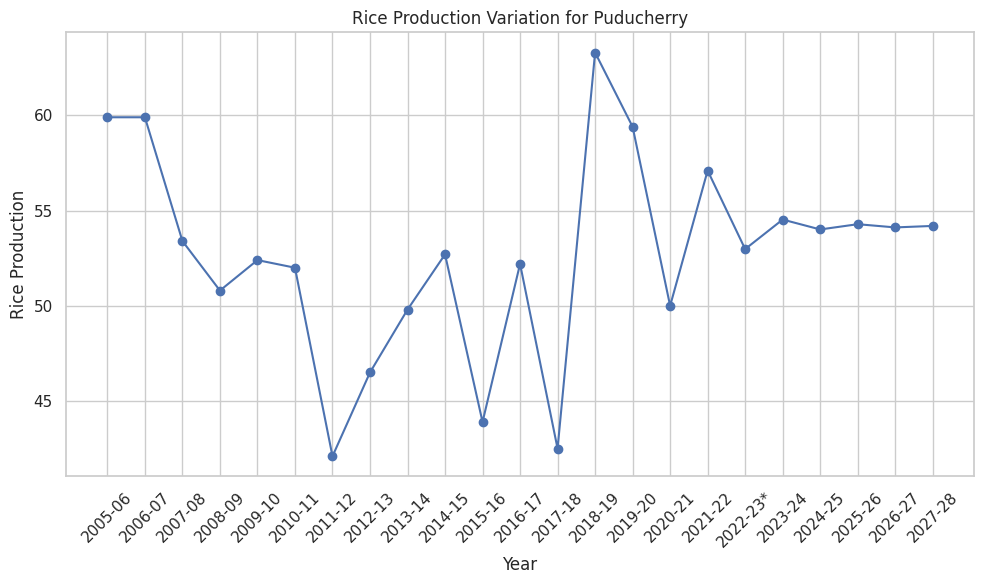

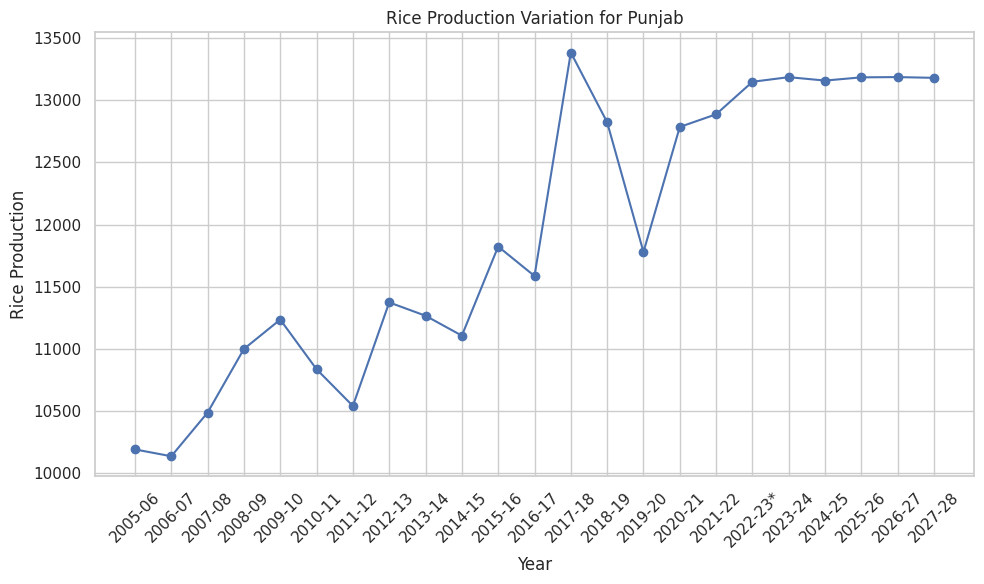

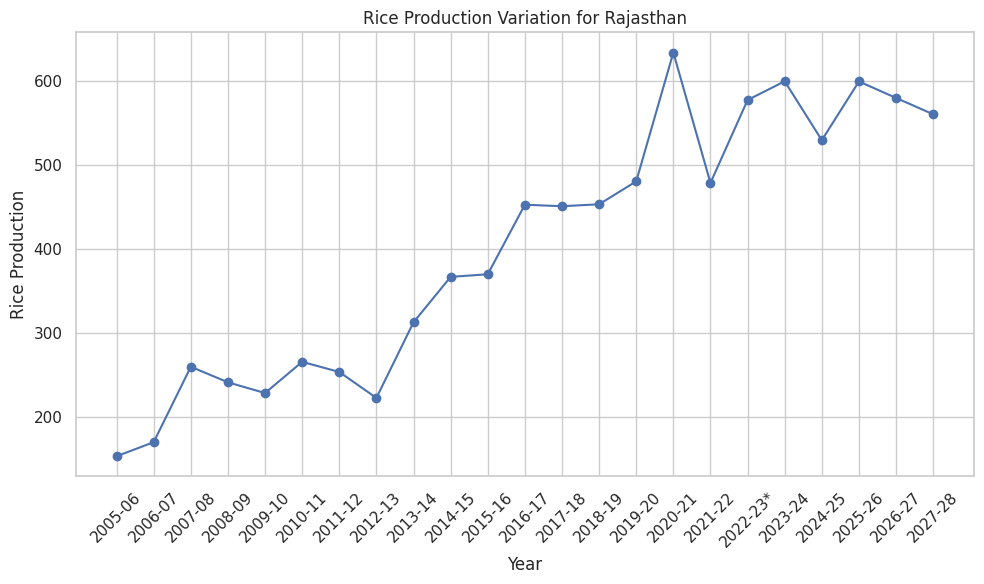

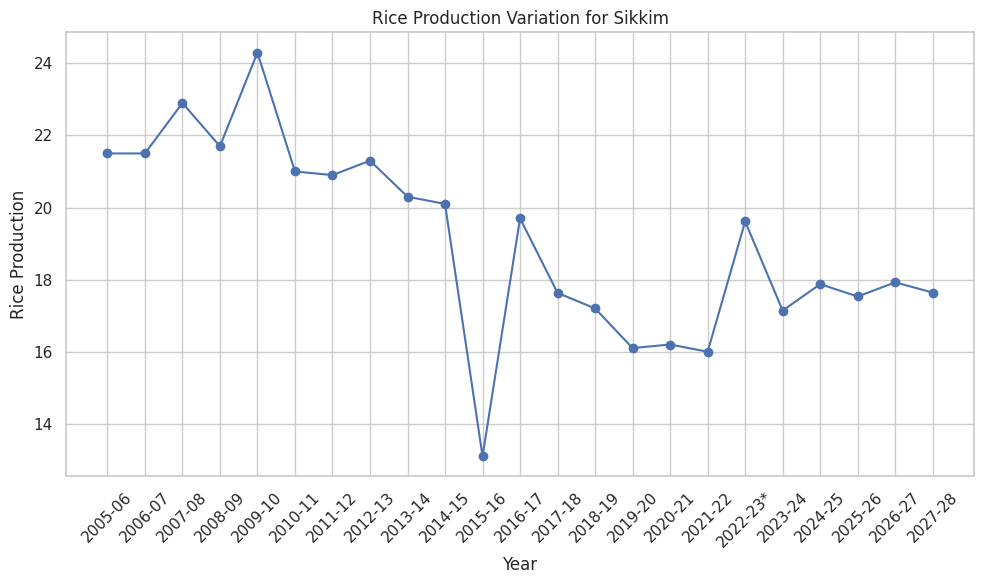

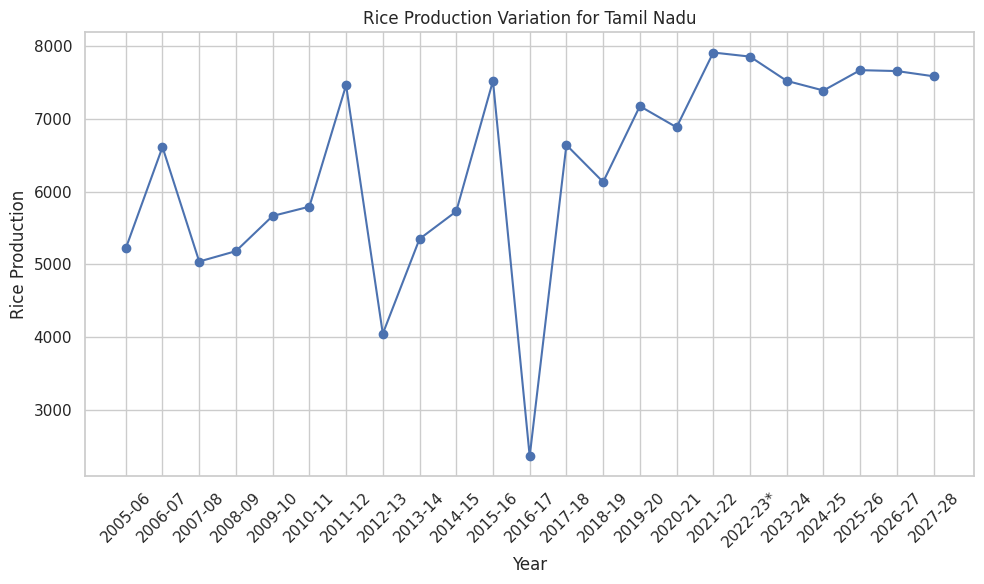

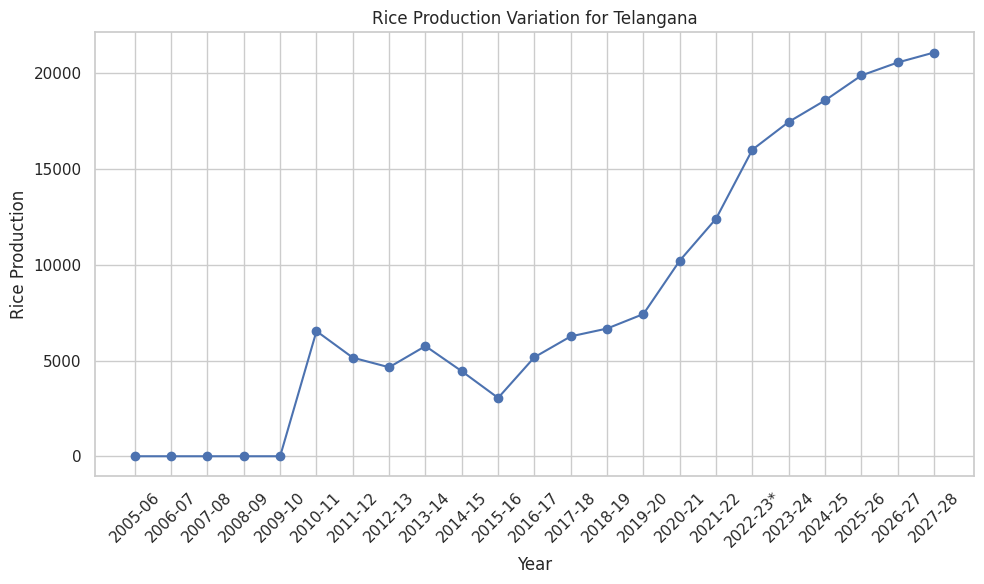

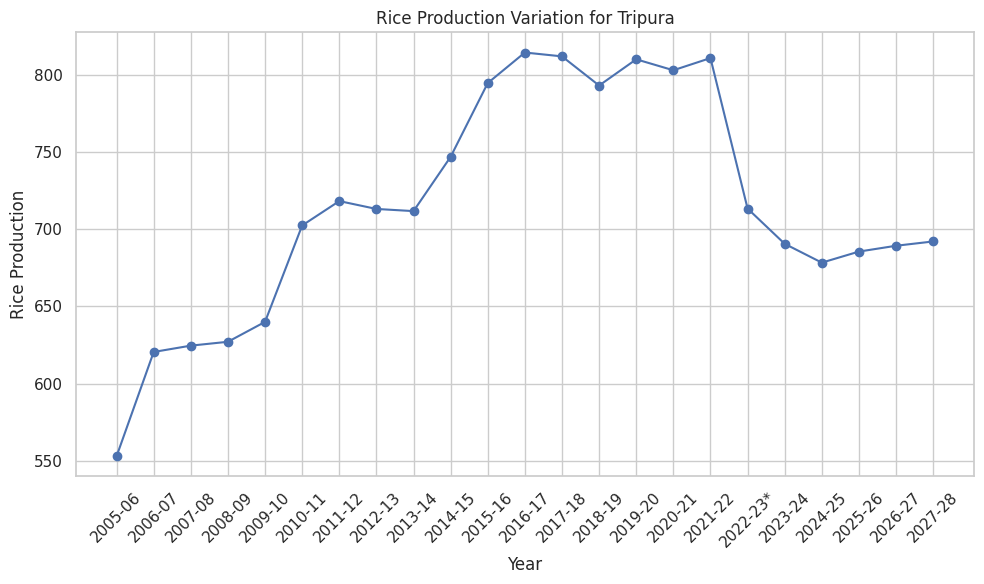

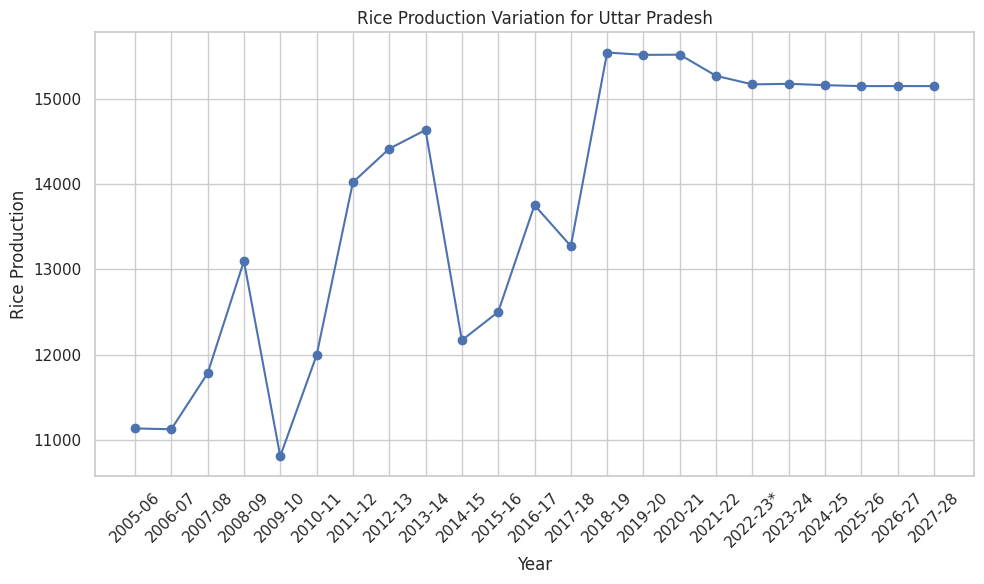

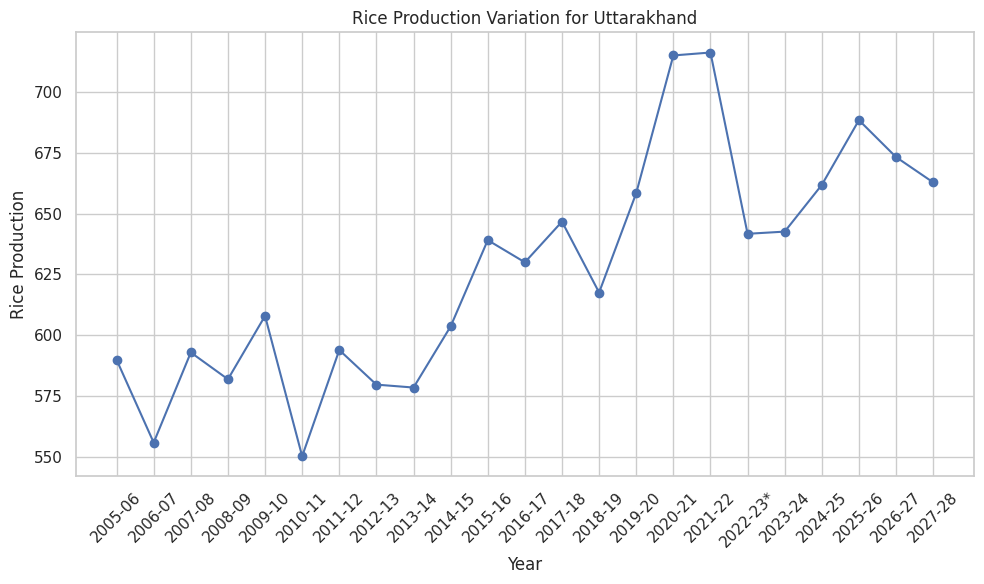

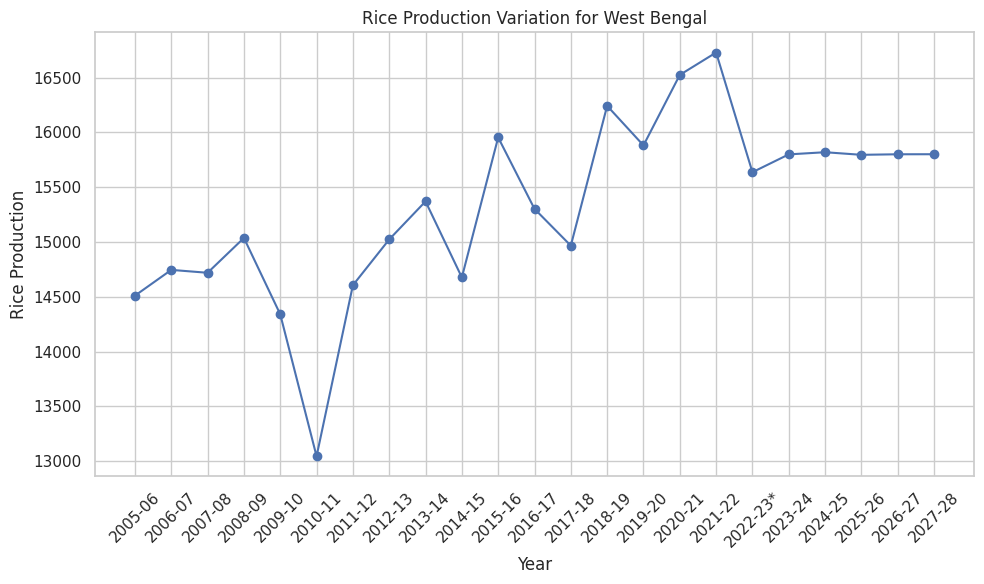

In [456]:
for state, rice_production in combined_df.iterrows():
    rice_production_values = rice_production.iloc[1:]
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(rice_production_values.index, rice_production_values.values, marker='o', linestyle='-')
    
    plt.xlabel('Year')
    plt.ylabel('Rice Production')
    plt.title(f'Rice Production Variation for {state}')
    plt.xticks(rotation=45) 
    plt.grid(True) 
    
    plt.tight_layout()
    plt.show()

